# Business Objective: 

## A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. **We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.**

## Data Set Details: This is a project where the variable to be predicted is energy production

### The data file contains 9568 observations with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load. 

- The variables, or features, are the following:
1. temperature, in degrees Celsius.
2. exhaust_vacuum, in cm Hg.
3. amb_pressure, in millibar. (Ambient pressure)
4. r_humidity, in percentage. (Relative humidity)
5. energy_production, in MW, net hourly electrical energy output.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
data=pd.read_csv('energy_production.csv',delimiter=';')
data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [3]:
data.head(10)

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58
5        23.63           60.93       1006.41       83.06             439.90
6        22.99           61.02       1009.88       81.56             440.85
7        12.85           40.00       1015.89       68.85             463.74
8        29.88           68.08       1011.14       55.78             429.33
9        23.22           66.56       1002.47       85.39             437.11

In [4]:
data[data['energy_production']<=0]

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
data.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

## We can observe that 
- The dataset has 9568 Rows and 5 Coloumns
- All The 5 Columns are of type 'Float'
- No categorical Columns

- The average energy_production across the dataset is 454.365 MegaWatt with Standard Deviation of 17.067
- The Median is 451.55

## Check for Null Values

In [7]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

- There are no Null Values in the Dataset , missing value imputation is not required

In [8]:
# Dropping Duplicates using drop_duplicates
df1=data.drop_duplicates().reset_index(drop=True)
df1

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9522        17.10           49.69       1005.53       81.82             457.32
9523        24.73           65.34       1015.42       52.80             446.92
9524        30.44           56.24       1005.19       56.24             429.34
9525        23.00           66.05       1020.61       80.29             421.57
9526        17.75           49.25       1020.86       63.67             454.41

[9527 rows x 5 columns]

In [9]:
data[data.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

- There 41 rows which are duplicated , we have created a new dataframe without duplicates 

# Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

- Numerical Visualization
    - Histogram
    - pairplot / scatterplot - x->input variable ,y->target variable
    - boxplot - to detect outliers 

## Univariate Analysis

Skewness-> -0.1361069178515444
Kurtosis-> -1.0326938303572764


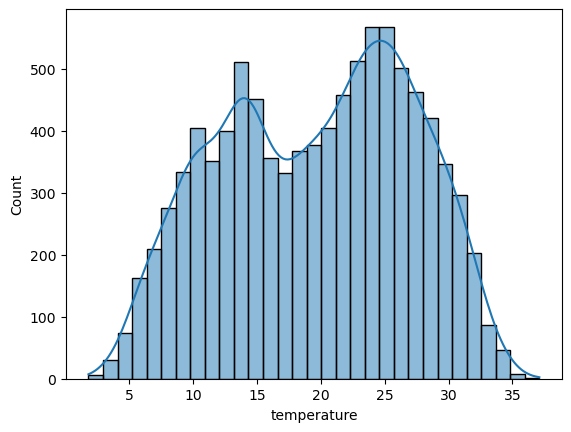

Skewness-> 0.1968187812768364
Kurtosis-> -1.4437579540468992


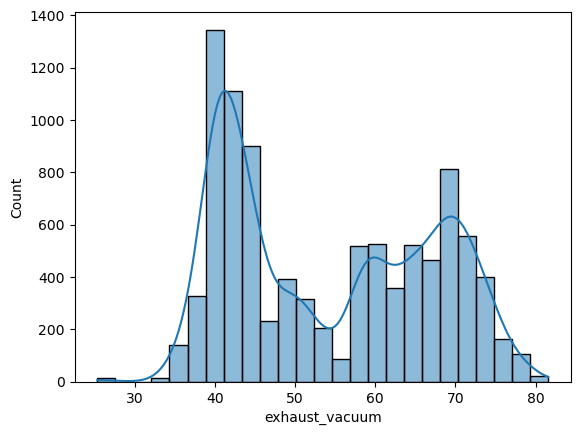

Skewness-> 0.273845628693525
Kurtosis-> 0.10417043779474389


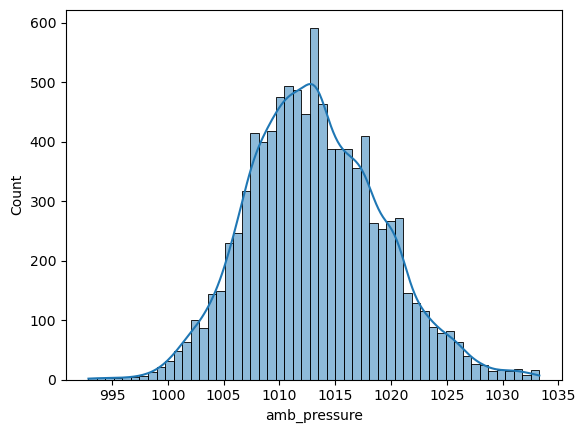

Skewness-> -0.43513848893895307
Kurtosis-> -0.44051452963302085


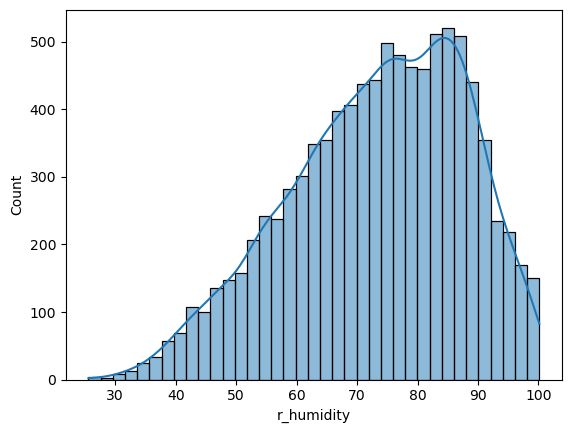

Skewness-> 0.3057905126118896
Kurtosis-> -1.0453915144701045


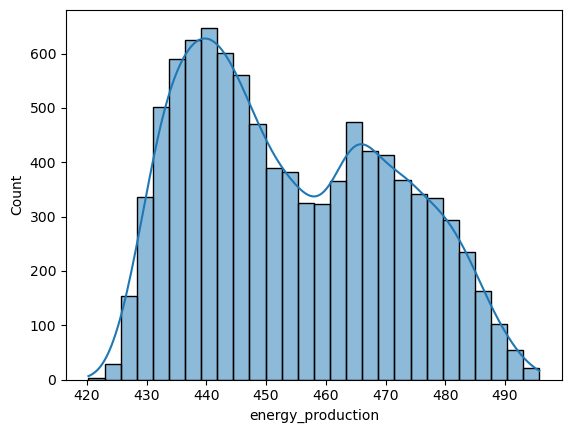

In [11]:
for i in df1.columns:
    sns.histplot(df1[i],kde=True)
    print("Skewness->",df1[i].skew())
    print("Kurtosis->",df1[i].kurt())
    plt.show()

- The Dataset is not normally distributed
- The Ambient Pressure is somewhat Normally Distributed and rest are deviating from Normality with Skewness and improper peaks

In [12]:
import warnings
warnings.filterwarnings('ignore')

The Box-Cox transformation is a statistical technique used to stabilize the variance and make data more normally distributed. It is particularly helpful when dealing with data that violates the assumption of normality, which is often required for various statistical models. The Box-Cox transformation applies a power transformation to the data, which depends on a parameter (lambda) that is estimated from the data itself.

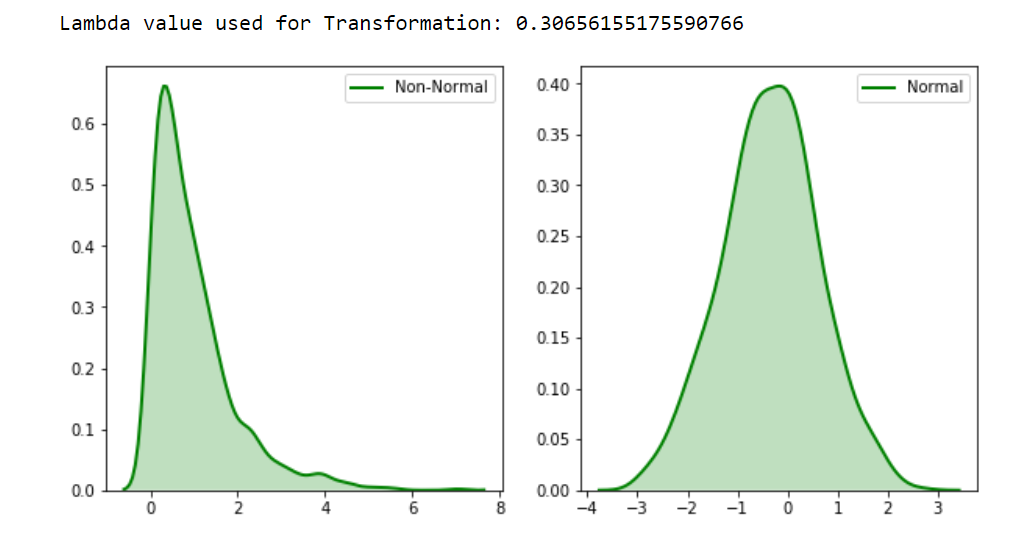

In [13]:
from scipy.stats import shapiro
from scipy.stats import anderson

temperature  does not appear to be normally distributed.
temperature  does not appear to be normally distributed after Transformation.
Lambda value used for Transformation: 0.9611484161584664
----------------------------------------------------------
exhaust_vacuum  does not appear to be normally distributed.
exhaust_vacuum  does not appear to be normally distributed after Transformation.
Lambda value used for Transformation: -0.03312947084754657
----------------------------------------------------------
amb_pressure  does not appear to be normally distributed.
amb_pressure  does not appear to be normally distributed after Transformation.
Lambda value used for Transformation: -14.491558364830873
----------------------------------------------------------
r_humidity  does not appear to be normally distributed.
r_humidity  does not appear to be normally distributed after Transformation.
Lambda value used for Transformation: 1.787623283060142
-----------------------------------------------

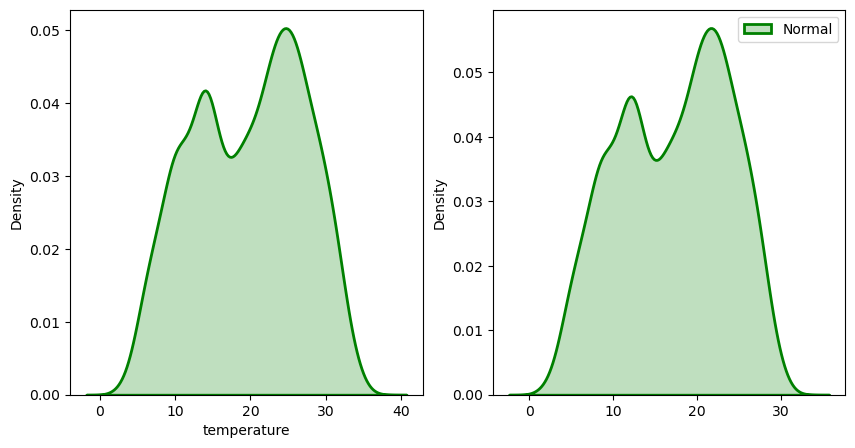

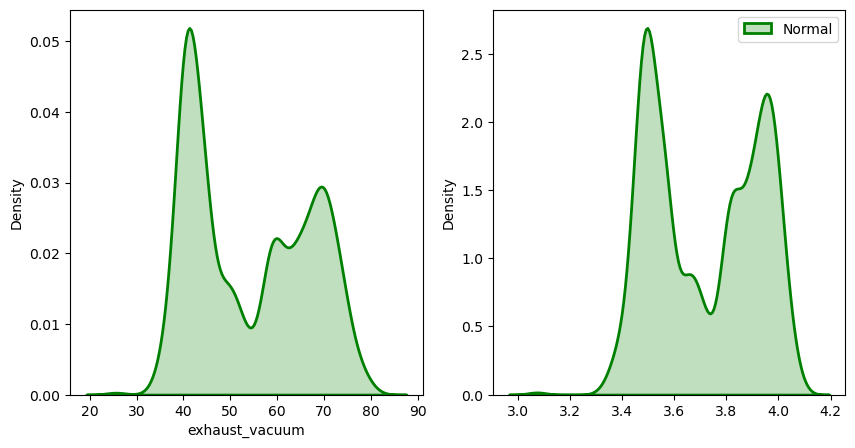

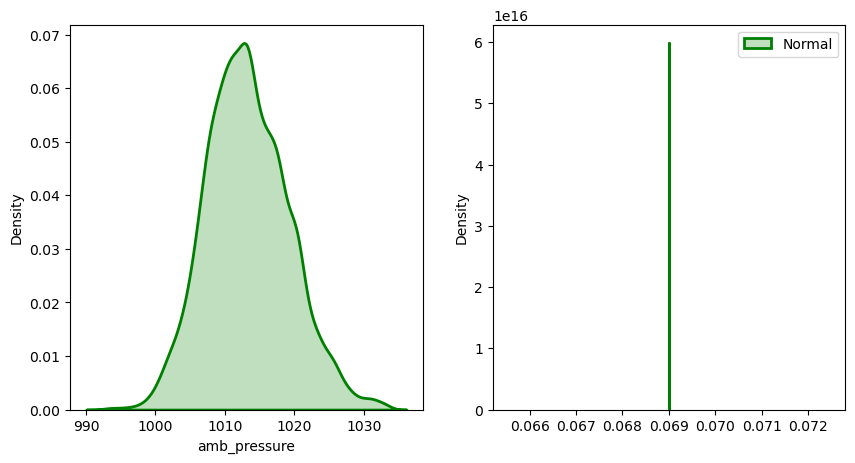

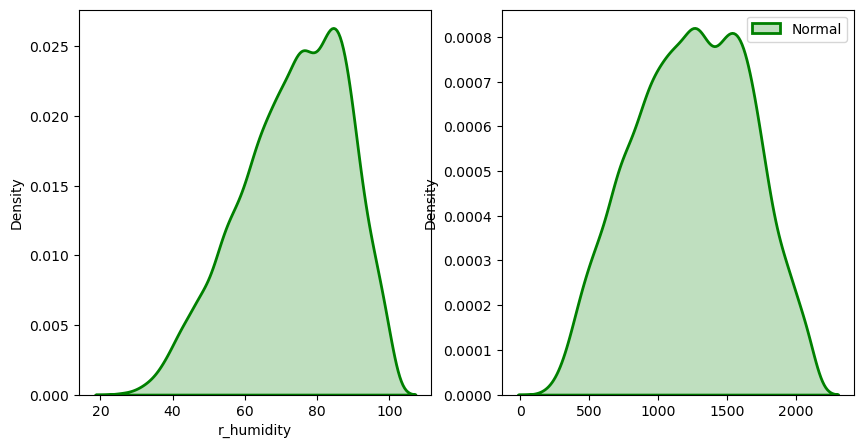

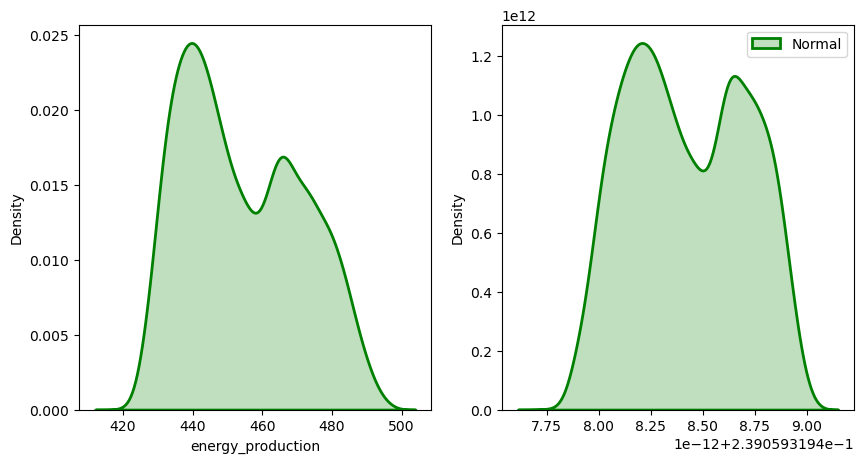

In [14]:
# Box-cox Transformation

from scipy import stats

for i in df1.columns:
    original_data = df1[i]
    result = anderson(original_data)
    if result.statistic < result.critical_values[2]:
        print(i," Coloumn appears to be normally distributed.")
    else:
        print(i," does not appear to be normally distributed.")
    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and
    # fitted data (normal)
    sns.distplot(original_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[0])
    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Normal", color ="green", ax = ax[1])   
        
    result = anderson(fitted_data)
    if result.statistic < result.critical_values[2]:
        print(i," Coloumn appears to be normally distributed after Transformation.")
    else:
        print(i," does not appear to be normally distributed after Transformation.")

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    print("----------------------------------------------------------")
    


## Bivariate analysis - Variation of Input Feature V/s Target Variable

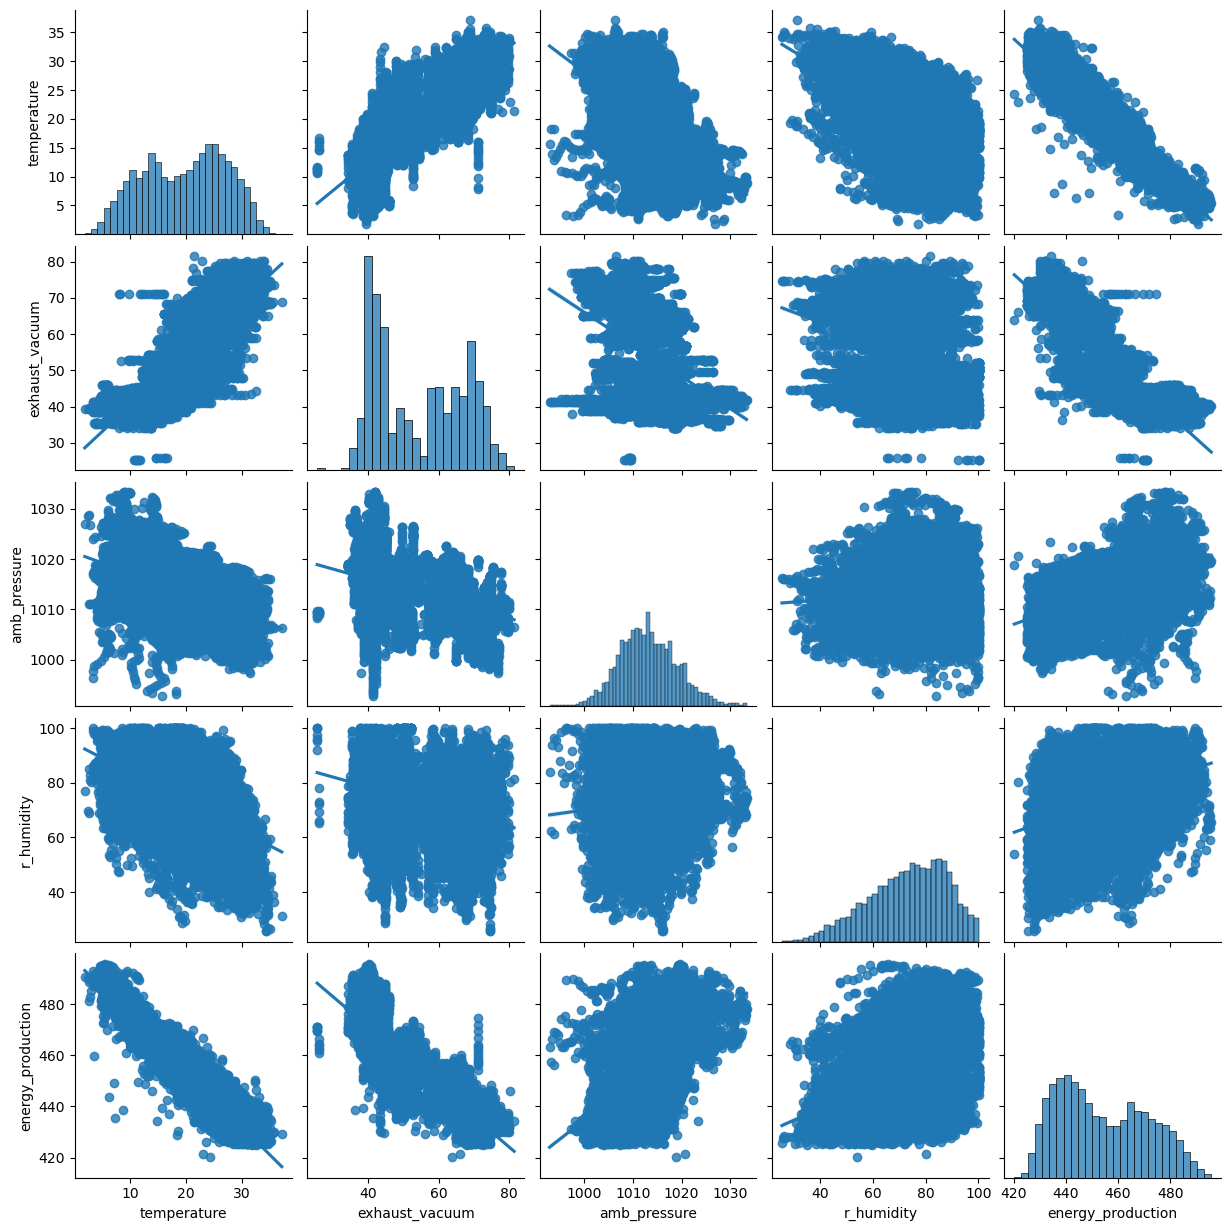

In [15]:
sns.pairplot(df1,kind='reg')
plt.show()

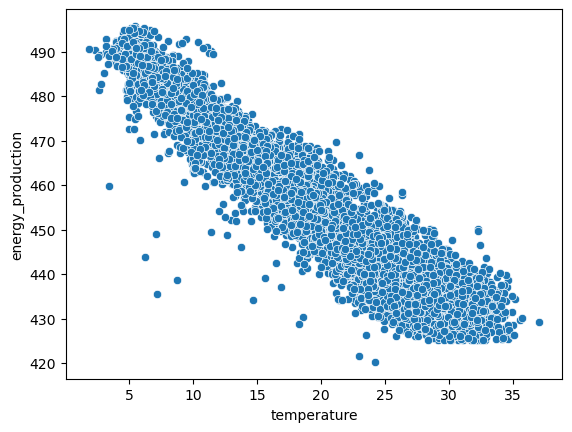

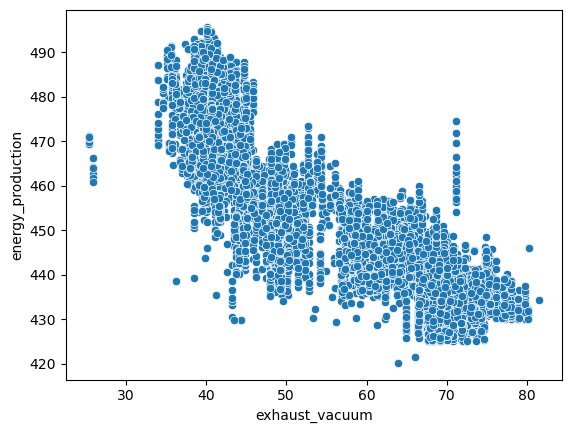

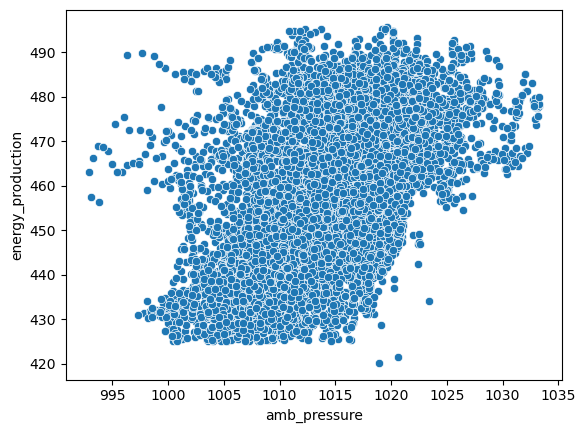

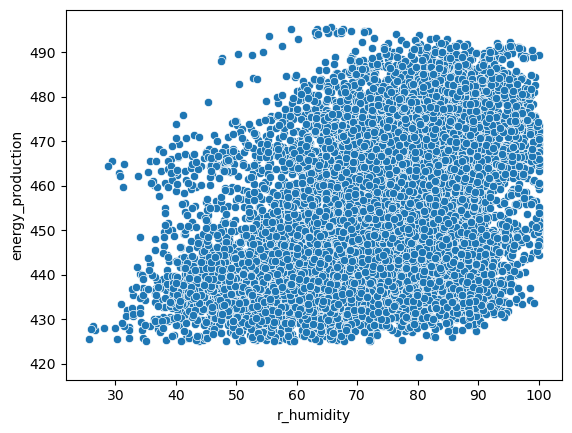

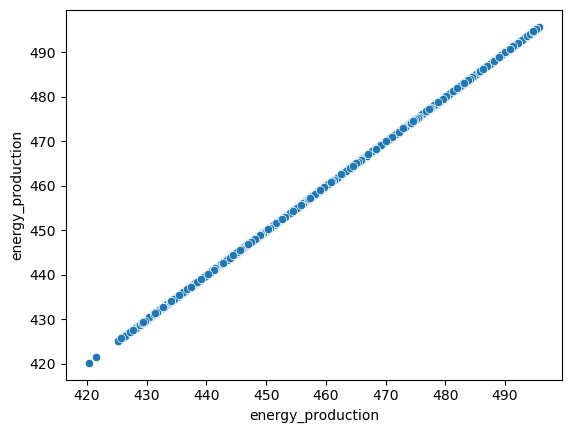

In [16]:
for i in df1.columns:
    sns.scatterplot(x=df1[i],y=df1['energy_production'])
    plt.show()

- ScatterPlot between target variable and r_humidity , amb_pressure dont have proper correlation
- While temperature and exhaust_vacuum has negative correlation , 
- Exhaust Vacuum has weak correlation when compared with temperature

In [17]:
df1.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

## Correlation Strength using Pearson's Cofficient

In [18]:
import numpy as np

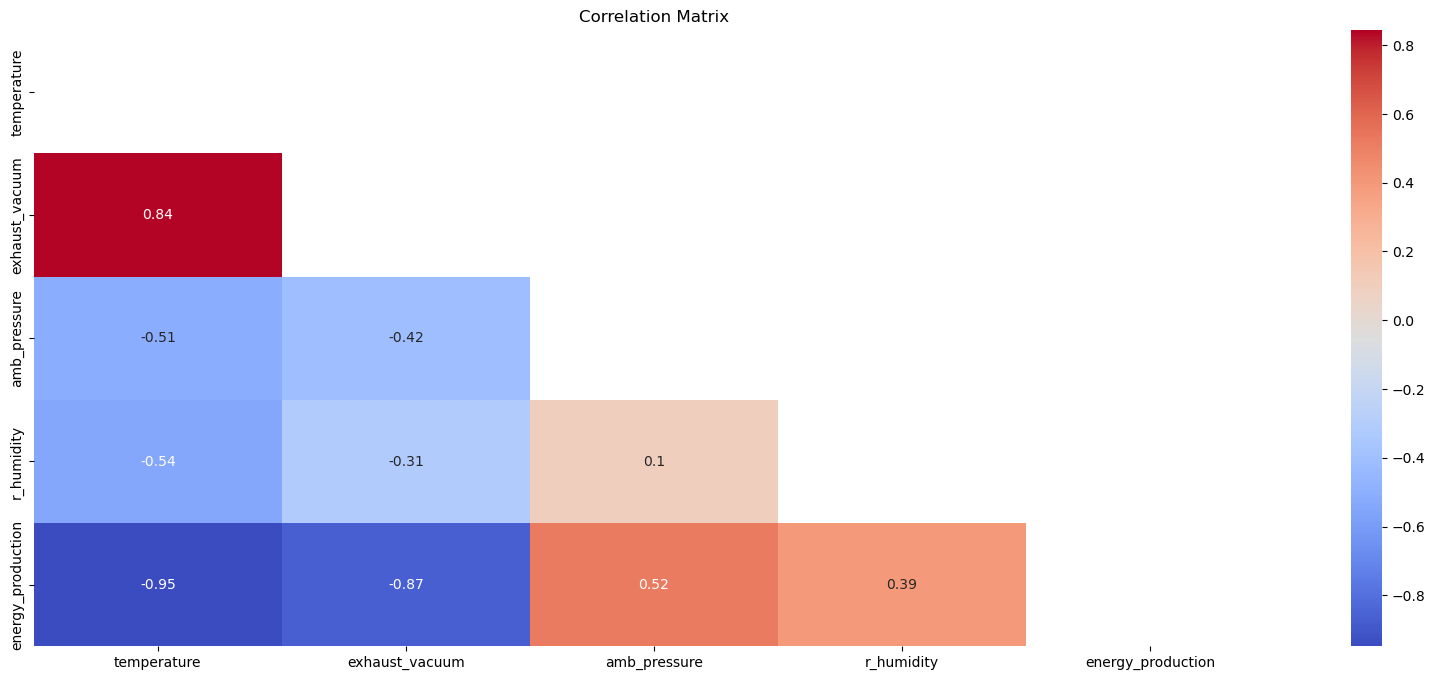

In [19]:
plt.figure(figsize=(20,8))
corr_matrix=df1.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

- We can see that all tempature has highest correlation and Exhaust Vacuum has relatively strong correlation with target variable amb pressure and r humidity is weak
- Also we find out that from above table , some of the input features have strong correlation with each other

In [20]:
for i,j in corr_matrix.iterrows():
        for k in j.index:
            if i!=k:
                print(i,"->",k,j[k])
        print("-------------------------------------")

temperature -> exhaust_vacuum 0.8436885712415252
temperature -> amb_pressure -0.5082216418191223
temperature -> r_humidity -0.543946860093054
temperature -> energy_production -0.947907906763254
-------------------------------------
exhaust_vacuum -> temperature 0.8436885712415252
exhaust_vacuum -> amb_pressure -0.41571836743495844
exhaust_vacuum -> r_humidity -0.3122139929044155
exhaust_vacuum -> energy_production -0.8699001978464347
-------------------------------------
amb_pressure -> temperature -0.5082216418191223
amb_pressure -> exhaust_vacuum -0.41571836743495844
amb_pressure -> r_humidity 0.1016309752598151
amb_pressure -> energy_production 0.5186867996211975
-------------------------------------
r_humidity -> temperature -0.543946860093054
r_humidity -> exhaust_vacuum -0.3122139929044155
r_humidity -> amb_pressure 0.1016309752598151
r_humidity -> energy_production 0.39117496400115725
-------------------------------------
energy_production -> temperature -0.947907906763254
energ

In [21]:
rows, cols = corr_matrix.shape
corr_df=pd.DataFrame(columns=["x","y","Pearson's Cofficient"])
for i in range(rows):
    for j in range(i + 1, cols):
        value = corr_matrix.iat[i, j]  # Access the value below the diagonal
        my_dict={"x":corr_matrix.index[i],"y":corr_matrix.columns[j],"Pearson's Cofficient": value}
        result_df=pd.DataFrame([my_dict])
        corr_df=pd.concat([corr_df,result_df],ignore_index=True)
sorted_df = corr_df.iloc[corr_df["Pearson's Cofficient"].abs().argsort()]
sorted_df=sorted_df[sorted_df['y']!="energy_production"].reset_index(drop=True)
sorted_df

x               y  Pearson's Cofficient
0    amb_pressure      r_humidity              0.101631
1  exhaust_vacuum      r_humidity             -0.312214
2  exhaust_vacuum    amb_pressure             -0.415718
3     temperature    amb_pressure             -0.508222
4     temperature      r_humidity             -0.543947
5     temperature  exhaust_vacuum              0.843689

- From above results we can see that 'temperature', and 'exhaust_vacuum' has correlation of almost 0.843689 , which implies they are strongly related

In [22]:
from pyvis.network import Network
correlation_matrix = df1.corr()

# Create a pyvis Network instance
net = Network(notebook=True, width="800px", height="800px")

# Add nodes (variables)
for variable in correlation_matrix.columns:
    net.add_node(variable)
    
# Add edges (correlations)
for row in correlation_matrix.index:
    for col in correlation_matrix.columns:
        if row != col:
            correlation = correlation_matrix.loc[row, col]
            net.add_edge(row, col, value=abs(correlation), title=f"{correlation:.2f}")
# Set layout parameters
layout_options = {
    "physics": {
        "spring_length": 200  # Adjust this value to control the spacing
    }
}
net.barnes_hut(gravity=-8000, central_gravity=0.1, spring_length=300)  # Apply layout options

# Show the network graph
net.show("correlation_network.html")



correlation_network.html


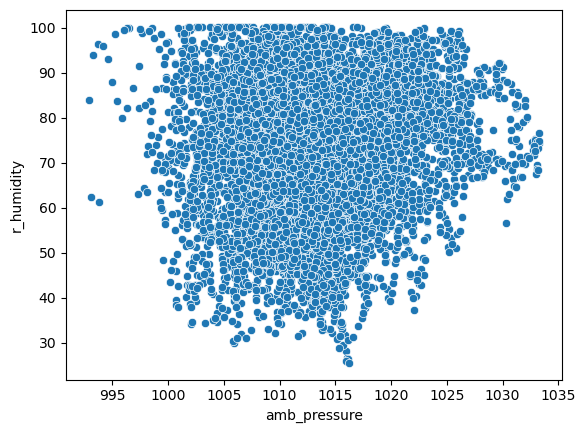

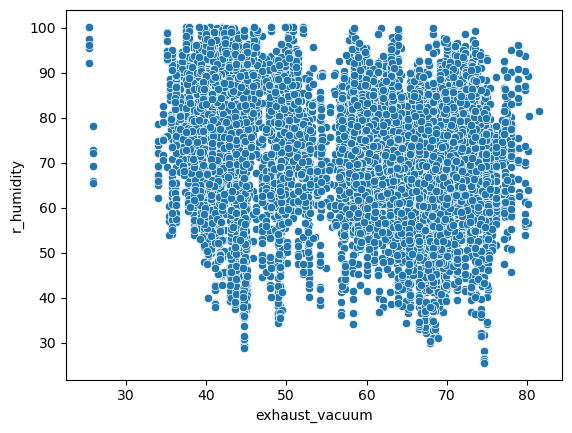

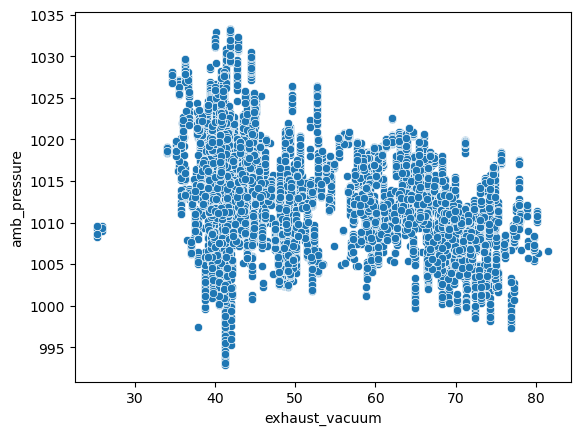

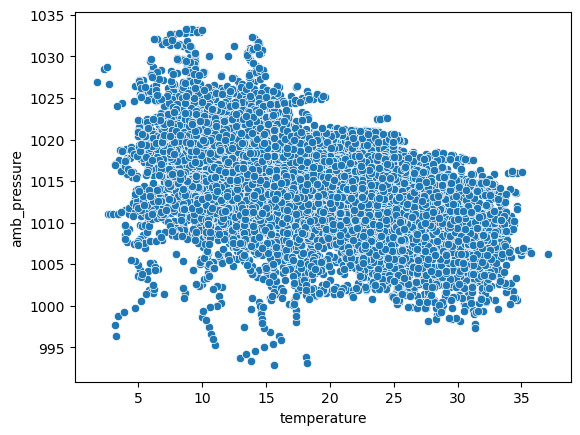

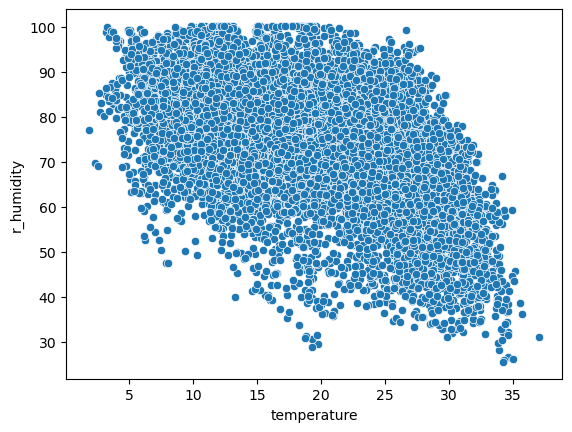

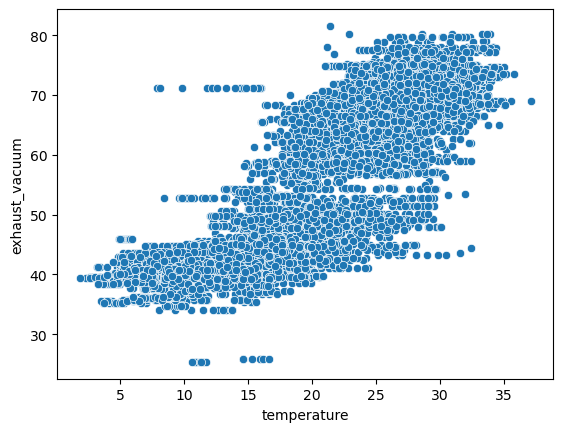

In [23]:
for i in range(sorted_df.shape[0]):
    sns.scatterplot(x=sorted_df.iloc[i][0],y=sorted_df.iloc[i][1],data=df1)
    plt.show()

## Outlier Detection

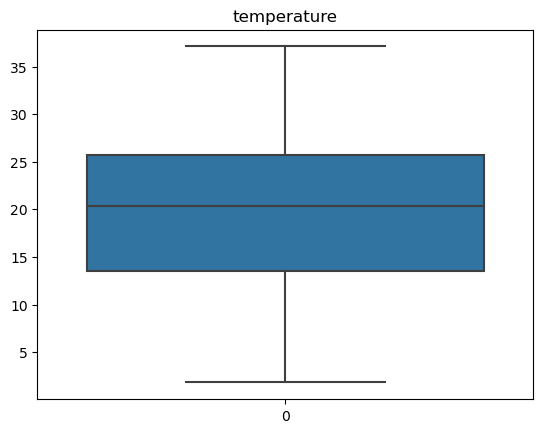

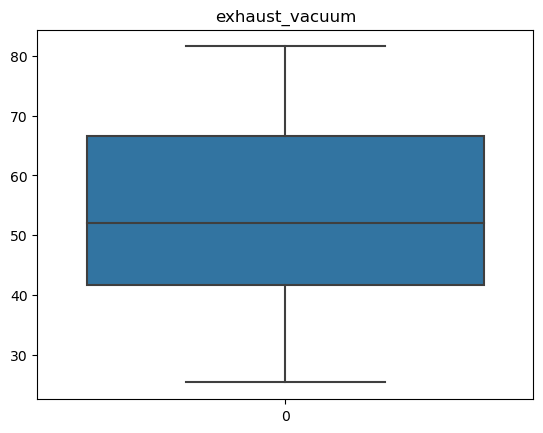

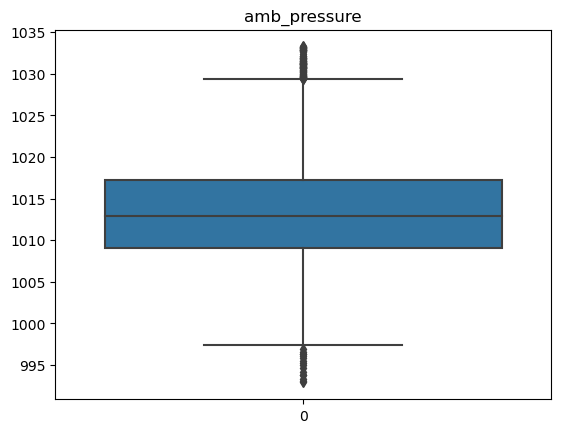

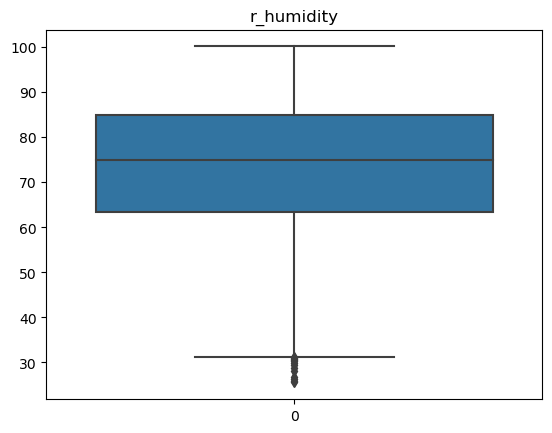

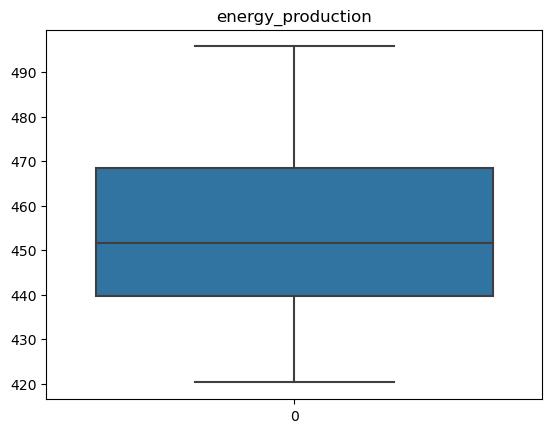

In [24]:
for i in df1.columns:
    sns.boxplot(data=df1[i])
    plt.title(i)
    plt.show()

In [25]:
for i in df1.columns:
    print(i)
    print("25th Percentile(Q1)",np.round(np.percentile(df1[i].values,25),2))
    print("75th Percentile(Q3)",np.round(np.percentile(df1[i].values,75),2))
    print("IQR",np.round(np.percentile(df1[i].values,75)-np.percentile(df1[i].values,25),2))
    print("Median",np.round(np.percentile(df1[i].values,50),2))
    print("---------------------------------------------------------------")

temperature
25th Percentile(Q1) 13.53
75th Percentile(Q3) 25.71
IQR 12.18
Median 20.35
---------------------------------------------------------------
exhaust_vacuum
25th Percentile(Q1) 41.74
75th Percentile(Q3) 66.51
IQR 24.77
Median 52.08
---------------------------------------------------------------
amb_pressure
25th Percentile(Q1) 1009.08
75th Percentile(Q3) 1017.2
IQR 8.12
Median 1012.92
---------------------------------------------------------------
r_humidity
25th Percentile(Q1) 63.38
75th Percentile(Q3) 84.85
IQR 21.47
Median 75.0
---------------------------------------------------------------
energy_production
25th Percentile(Q1) 439.75
75th Percentile(Q3) 468.36
IQR 28.62
Median 451.52
---------------------------------------------------------------


In [26]:
new_df_without_outliers=df1.copy()
new_df_without_outliers.shape

(9527, 5)

In [27]:
def check_outliers(Norm_data1):
    for i in Norm_data1.columns:
        # Sort the data in ascending order
        sorted_data = sorted(Norm_data1[i])

        # Calculate quartiles
        Q1 = np.percentile(sorted_data, 25)
        Q3 = np.percentile(sorted_data, 75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers=[]
        outliers = [x for x in sorted_data if x < lower_bound or x > upper_bound]
        Norm_data1=Norm_data1[~(Norm_data1[i].isin(outliers))]
    return Norm_data1

In [28]:
Before=new_df_without_outliers.shape[0]
print("Before ->",new_df_without_outliers.shape,end=" After ->")
new_df_without_outliers=check_outliers(new_df_without_outliers)
print(new_df_without_outliers.shape)
After=new_df_without_outliers.shape[0]
Percentage_drop = (Before - After)/Before
print("reduced by",Percentage_drop*100,"%")

Before -> (9527, 5) After ->(9425, 5)
reduced by 1.0706413351527237 %


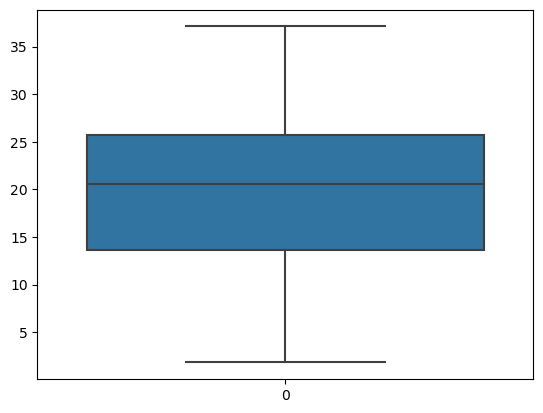

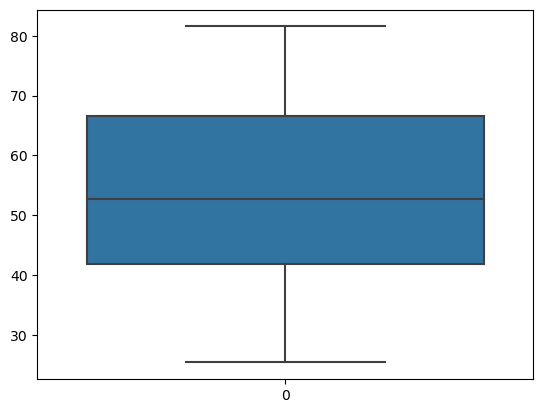

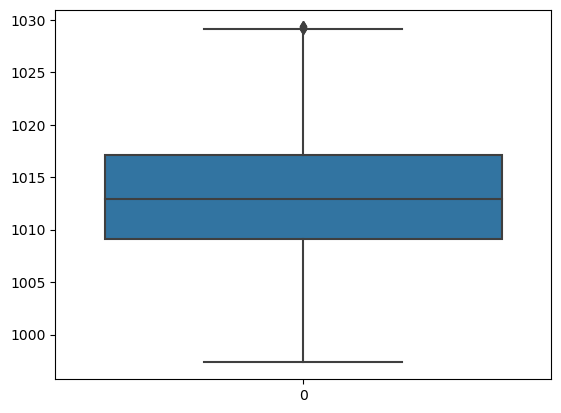

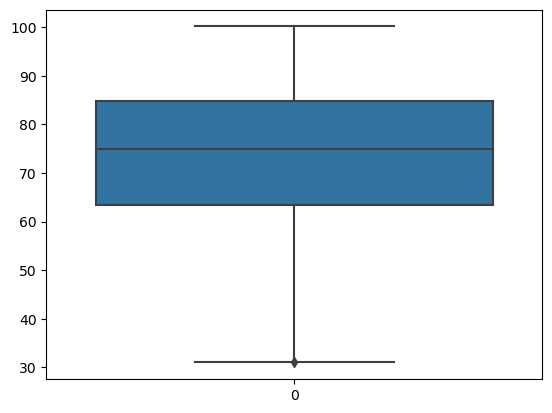

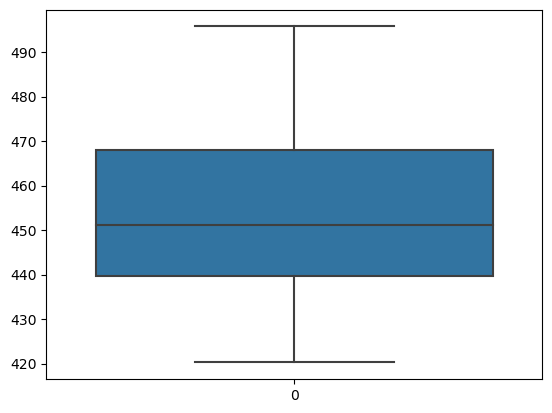

In [29]:
for i in df1.columns:
    sns.boxplot(data=new_df_without_outliers[i])
    plt.show()

- From the Box Plot we can see that , the Outliers in the dataset have been removed

In [30]:
print("Overall Average energy production",df1['energy_production'].mean())
print("Mode of energy production",df1['energy_production'].mode())
print("Median of energy production",df1['energy_production'].median())

Overall Average energy production 454.33590952031096
Mode of energy production 0    468.8
Name: energy_production, dtype: float64
Median of energy production 451.52


In [31]:
Norm_data=df1.copy()
Norm_data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9522        17.10           49.69       1005.53       81.82             457.32
9523        24.73           65.34       1015.42       52.80             446.92
9524        30.44           56.24       1005.19       56.24             429.34
9525        23.00           66.05       1020.61       80.29             421.57
9526        17.75           49.25       1020.86       63.67             454.41

[9527 rows x 5 columns]

In [32]:
X=Norm_data.drop('energy_production',axis=1)
Y=Norm_data['energy_production']

In [33]:
X

temperature  exhaust_vacuum  amb_pressure  r_humidity
0            9.59           38.56       1017.01       60.10
1           12.04           42.34       1019.72       94.67
2           13.87           45.08       1024.42       81.69
3           13.72           54.30       1017.89       79.08
4           15.14           49.64       1023.78       75.00
...           ...             ...           ...         ...
9522        17.10           49.69       1005.53       81.82
9523        24.73           65.34       1015.42       52.80
9524        30.44           56.24       1005.19       56.24
9525        23.00           66.05       1020.61       80.29
9526        17.75           49.25       1020.86       63.67

[9527 rows x 4 columns]

## mutual_info_regression to perform feature selection with numerical features and a continuous target variable

In [34]:
from sklearn.feature_selection import mutual_info_regression

In [35]:
from sklearn.feature_selection import f_regression
f_regression_stat, p_values = f_regression(X, Y)

In [36]:
results_df = pd.DataFrame({'Feature': X.columns, 'f_regression Stat': f_regression_stat, 'p-value': p_values})

In [37]:
results_df.sort_values(by='p-value', ascending=True, inplace=True)

In [38]:
results_df

Feature  f_regression Stat  p-value
0     temperature       84344.554060      0.0
1  exhaust_vacuum       29628.439614      0.0
2    amb_pressure        3505.737422      0.0
3      r_humidity        1720.809640      0.0

In [39]:
selected_features = results_df[results_df['p-value'] < 0.05]['Feature']
selected_features

0       temperature
1    exhaust_vacuum
2      amb_pressure
3        r_humidity
Name: Feature, dtype: object

In [40]:
for i, v in enumerate(results_df['f_regression Stat'].values):
    print(i,v)

0 84344.55406039042
1 29628.43961403459
2 3505.7374221470377
3 1720.8096403560287


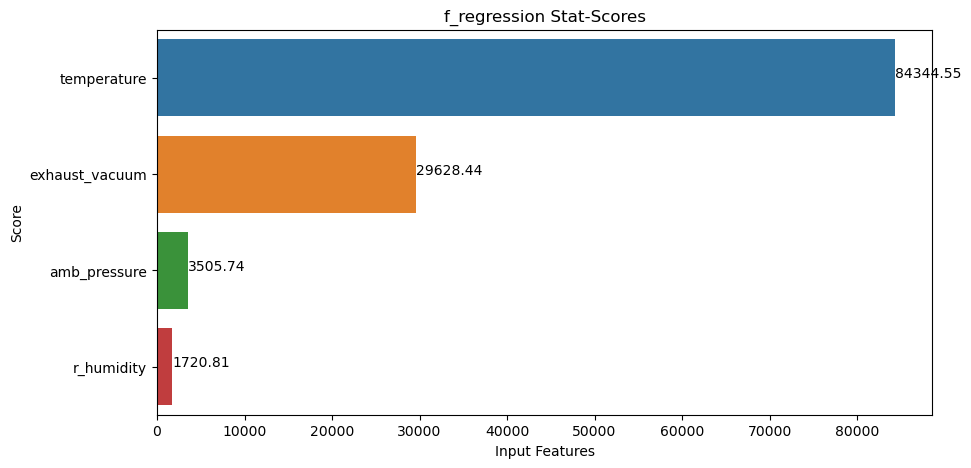

In [41]:
# Create the bar plot using seaborn
plt.figure(figsize=(10,5))
ax = sns.barplot(data=results_df,y='Feature',x='f_regression Stat')
for i, v in enumerate(results_df['f_regression Stat'].values):
    ax.text(v,i,f"{v:.2f}")
# Add labels and title
plt.xlabel('Input Features')
plt.ylabel('Score')
plt.title('f_regression Stat-Scores')
# Display the plot
plt.show()

## Normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler()

In [43]:
Norm_data=df1.copy()

In [44]:
X=Norm_data.copy()
X=X.drop('energy_production',axis=1)

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
normalised_values = normalizer.fit_transform(X)
normalised_values = np.round(normalised_values,2)
normalised_values

array([[0.22, 0.23, 0.6 , 0.46],
       [0.29, 0.3 , 0.66, 0.93],
       [0.34, 0.35, 0.78, 0.75],
       ...,
       [0.81, 0.55, 0.3 , 0.41],
       [0.6 , 0.72, 0.69, 0.73],
       [0.45, 0.43, 0.69, 0.51]])

In [47]:
import pickle
# Save model using pickle
with open("normalizer.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [48]:
X=pd.DataFrame(normalised_values, columns=X.columns)

In [49]:
Norm_data1=X.copy()
Norm_data1['energy_production']=Norm_data['energy_production']
Norm_data1

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            0.22            0.23          0.60        0.46             481.30
1            0.29            0.30          0.66        0.93             465.36
2            0.34            0.35          0.78        0.75             465.48
3            0.34            0.51          0.62        0.72             467.05
4            0.38            0.43          0.76        0.66             463.58
...           ...             ...           ...         ...                ...
9522         0.43            0.43          0.31        0.75             457.32
9523         0.65            0.71          0.56        0.37             446.92
9524         0.81            0.55          0.30        0.41             429.34
9525         0.60            0.72          0.69        0.73             421.57
9526         0.45            0.43          0.69        0.51             454.41

[9527 rows x 5 columns]

## Exploratory Data Analysis Using SweetViz

## Exploratory Data Analysis Using D-tale

!pip install dtale

## Multiple Linear Regression Models

In [50]:
import statsmodels.api as sm
from matplotlib import style

In [51]:
def calculate_mape(y_true, y_pred):
    from sklearn.metrics import mean_absolute_percentage_error
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    
    Parameters:
        y_true (array-like): Array of true target values.
        y_pred (array-like): Array of predicted target values.
        
    Returns:
        float: MAPE value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    error1 = mean_absolute_percentage_error(y_true, y_pred)
    return mape

In [52]:
from sklearn.metrics import mean_squared_error
def get_parameter(y_actual,y_predict):
    mse=mean_squared_error(y_actual, y_predict)
    rmse = np.sqrt(mse)
    resid_mean=np.mean(y_actual-y_predict)
    print(f"Mean Resid: {resid_mean}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

In [53]:
def model_evaluate(X,Y):
    model1 = sm.OLS(Y, X).fit()
    print(model1.summary())
    #'Residual Plot'
    residuals = model1.resid
    plt.scatter(model1.fittedvalues, residuals)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    plt.show()
    
    # Histogram
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residuals Histogram')
    plt.show()

    # Q-Q plot
    sm.qqplot(residuals, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()
    
    style.use('seaborn-whitegrid')
    plt.figure(figsize = (20,10))
    sns.distplot(model1.fittedvalues, hist = False, color = 'r', label = 'Predicted Values')
    sns.distplot(Y, hist = False, color = 'b', label = 'Actual Values')
    plt.title('Actual vs Predicted Values', fontsize = 16)
    plt.xlabel('Values', fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    plt.legend(loc = 'upper left', fontsize = 13)
    plt.show()

    get_parameter(Y,model1.fittedvalues)
    print(f"Adjusted R2-Value: {model1.rsquared_adj}")
    print(f"R2-Value: {model1.rsquared}")
    print('-------------------------')
    print('pvalues')
    print(model1.pvalues[model1.pvalues>=0.05])
    return sm.OLS(Y, X).fit()

In [54]:
X=Norm_data1.drop('energy_production',axis=1)
Y=Norm_data1['energy_production']
X=sm.add_constant(X)

1. By including a constant term (β0), the regression model can fit not only a line that goes through the origin (i.e., Y = β1*X), but also a line that can have an offset from the origin. This allows the model to better capture the overall trend of the data, especially when the data does not pass through the origin.
2. n a linear regression model, the relationship between the dependent variable (Y) and the independent variable(s) (X) is represented by the equation:
    - Y = β0 + β1X1 + β2X2 + ... + βn*Xn + ε
        - where: Y is the dependent variable.
        - X1, X2, ..., Xn are the independent variables.
        - β0 is the intercept (constant term).
        - β1, β2, ..., βn are the regression coefficients associated with the independent variables.
        - ε is the error term representing the unexplained variation in the dependent variable.

                            OLS Regression Results                            
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.078e+04
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:42:29   Log-Likelihood:                -27984.
No. Observations:                9527   AIC:                         5.598e+04
Df Residuals:                    9522   BIC:                         5.601e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            502.6045      0.441   1138.

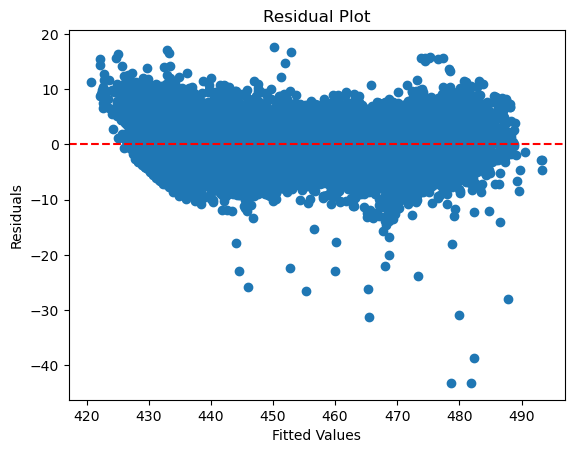

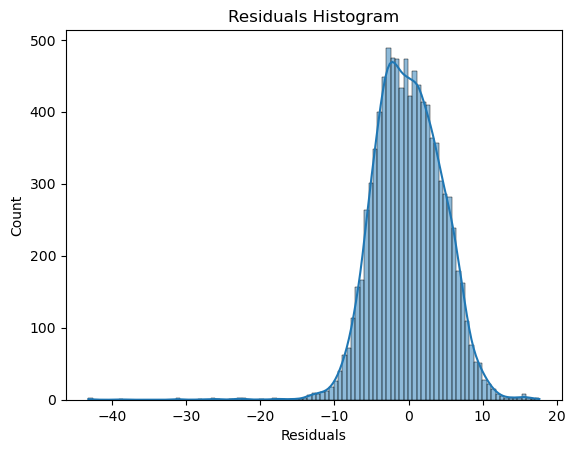

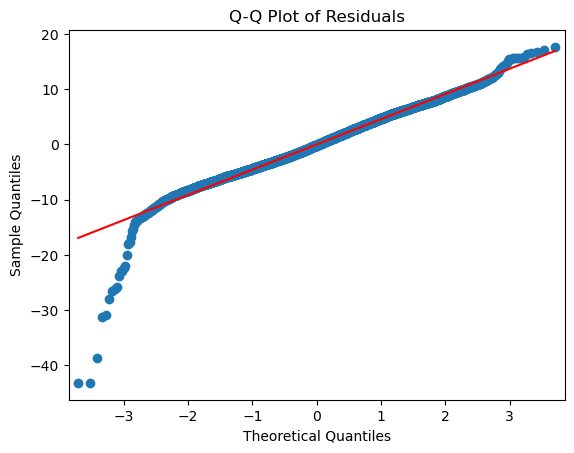

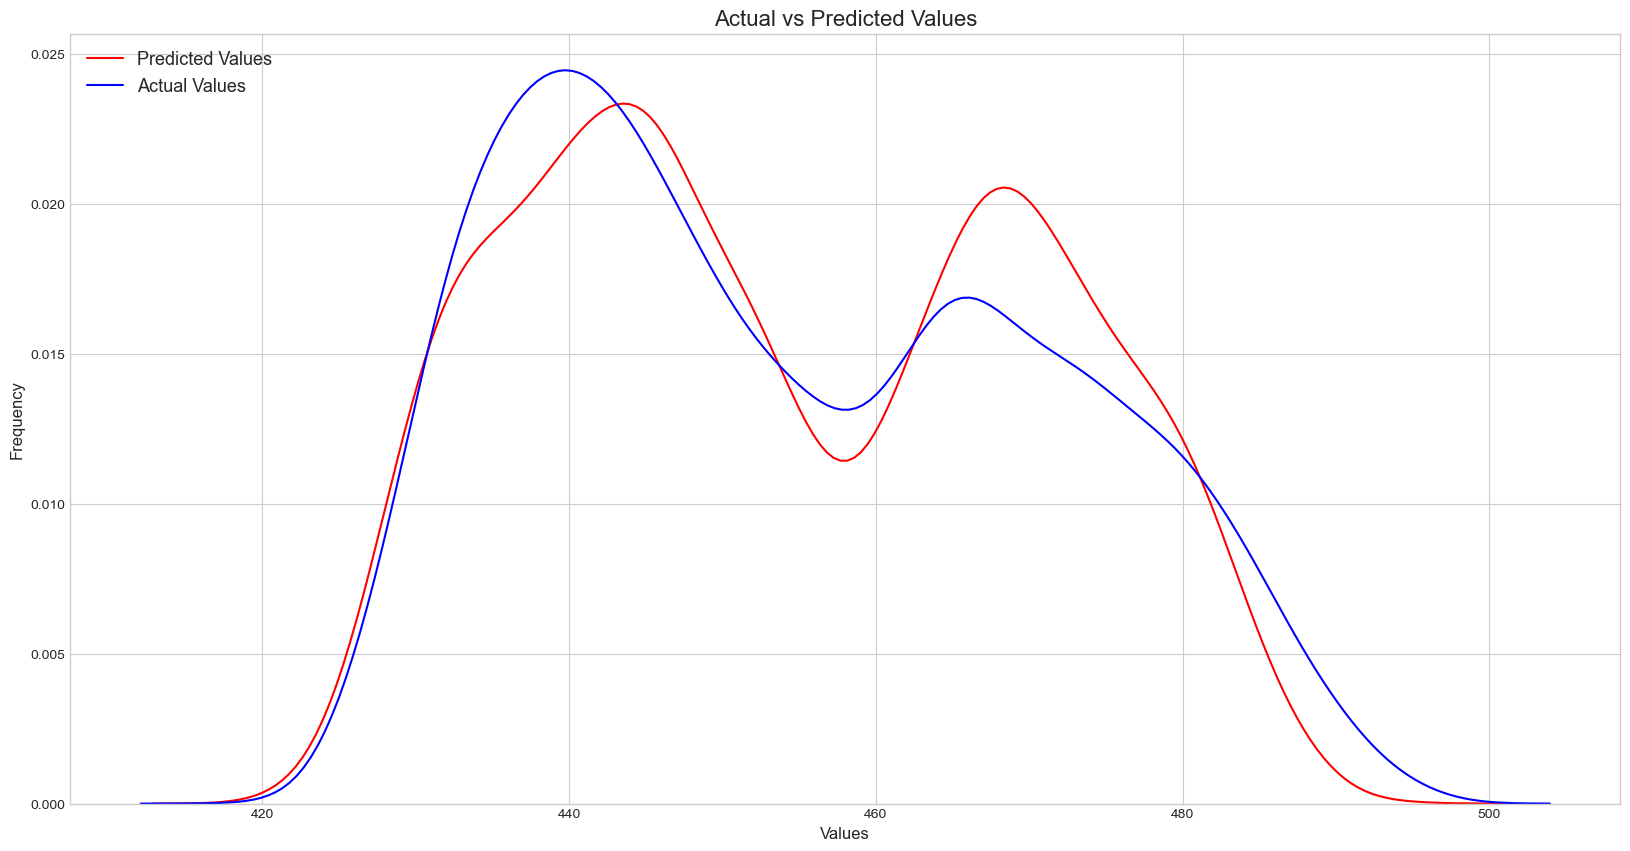

Mean Resid: -6.242215263165461e-14
Mean Squared Error (MSE): 20.84050237843219
Root Mean Squared Error (RMSE): 4.565139907870535
Adjusted R2-Value: 0.9281802536638175
R2-Value: 0.9282104110210866
-------------------------
pvalues
Series([], dtype: float64)


In [55]:
model1=model_evaluate(X,Y)

Based on the provided OLS regression report, we can infer the following:

1. Model Fit:
   - R-squared (R²) and Adj. R-squared: The model has a high R-squared value of 0.928, which indicates that approximately 92.8% of the variance in the dependent variable (energy_production) is explained by the independent variables (temperature, exhaust_vacuum, amb_pressure, r_humidity). This suggests that the model fits the data well.

2. Model Significance:
   - F-statistic: The F-statistic is very large (3.078e+04), and the associated probability (Prob (F-statistic)) is very close to zero (0.00). This indicates that the overall model is highly significant, meaning that at least one of the independent variables has a significant impact on the dependent variable.

3. Coefficients and Significance:
   - The coefficient of each independent variable (temperature, exhaust_vacuum, amb_pressure, r_humidity) provides the estimated change in the dependent variable (energy_production) for a one-unit change in the respective independent variable while holding other variables constant.
   - The constant (intercept) is 502.6045. This is the estimated value of energy_production when all independent variables are zero.
   - The p-values (P>|t|) for all the coefficients are very close to zero, indicating that all the independent variables are highly statistically significant in predicting energy_production. In other words, all the independent variables have a significant impact on the energy production.

4. Multicollinearity:
   - The condition number (Cond. No.) is 24.4, which is relatively low. This suggests that there is no strong multicollinearity among the independent variables. Low multicollinearity is beneficial for the stability and interpretability of the coefficients.

5. Residuals:
   - Omnibus and Prob(Omnibus): The Omnibus test and Prob(Omnibus) value being close to zero suggest that the normality assumption of the residuals may be violated. This means that the residuals may not be normally distributed, which can impact the validity of certain statistical tests.
   - Jarque-Bera (JB) and Prob(JB): The Jarque-Bera test and Prob(JB) value being close to zero also indicate that the residuals are not normally distributed.

6. Autocorrelation:
   - Durbin-Watson: The Durbin-Watson value of 1.969 suggests that there might be some positive autocorrelation in the residuals. This means that the residuals may be correlated at different time points, and this could be a concern for the model's validity.

Overall, the model seems to have a good fit and all the independent variables are statistically significant in predicting energy_production. However, there are potential issues related to the normality of residuals and possible autocorrelation, which may need further investigation and consideration in the model evaluation and interpretation.

In [56]:
print(f'MAPE for the model {calculate_mape(Y,model1.fittedvalues)} %')

MAPE for the model 0.8005566762003794 %


## Check and visualize the assumptions in a regression model

1. Check Independence of Errors and Check Homoscedasticity:
- The assumption of independence of errors is not straightforward to visualize directly, especially in multiple regression. However, you can plot residuals against the predicted values to look for patterns or trends.

## The above plot exhibit an increasing spread as the predicted values change, it suggests possible heteroscedasticity or autocorrelation, which may indicate a violation of the independence assumption.

2. Check Normality of Errors
- using a histogram or a Q-Q plot to check the normality of residuals. 
- Additionally, you can perform a statistical test like the Shapiro-Wilk test.

- From the above plot we can see there is a significant variation in the actual and predicted values

## Improving the model

## Multicollinearity Check using VIF Scores

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [59]:
X = Norm_data1.drop('energy_production',axis=1)
vif_scores=calc_vif(X).sort_values('VIF',ascending=False)
vif_scores

variables        VIF
1  exhaust_vacuum  23.035497
0     temperature  21.792514
3      r_humidity   8.052838
2    amb_pressure   7.952686

In [60]:
new_df_without_outliers.reset_index(drop=True,inplace=True)

In [61]:
X=new_df_without_outliers.copy()
X=X.drop('energy_production',axis=1)

In [62]:
new_df_without_outliers.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [63]:
normalised_values = MinMaxScaler().fit_transform(X)
normalised_values = np.round(normalised_values,2)
normalised_values

array([[0.22, 0.23, 0.61, 0.42],
       [0.29, 0.3 , 0.7 , 0.92],
       [0.34, 0.35, 0.85, 0.73],
       ...,
       [0.81, 0.55, 0.25, 0.37],
       [0.6 , 0.72, 0.73, 0.71],
       [0.45, 0.43, 0.73, 0.47]])

In [64]:
X=pd.DataFrame(normalised_values, columns=X.columns)

In [65]:
X.isnull().sum()
X.shape

(9425, 4)

In [66]:
Norm_data1=X.copy()
Norm_data1['energy_production']=new_df_without_outliers['energy_production']
Norm_data1.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [67]:
X=Norm_data1.drop('energy_production',axis=1)
Y=Norm_data1['energy_production']
X=sm.add_constant(X)

                            OLS Regression Results                            
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.018e+04
Date:                Mon, 28 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:42:30   Log-Likelihood:                -27701.
No. Observations:                9425   AIC:                         5.541e+04
Df Residuals:                    9420   BIC:                         5.545e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            501.8504      0.399   1258.

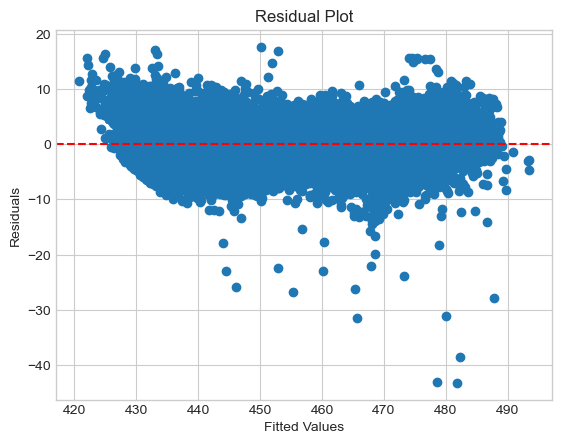

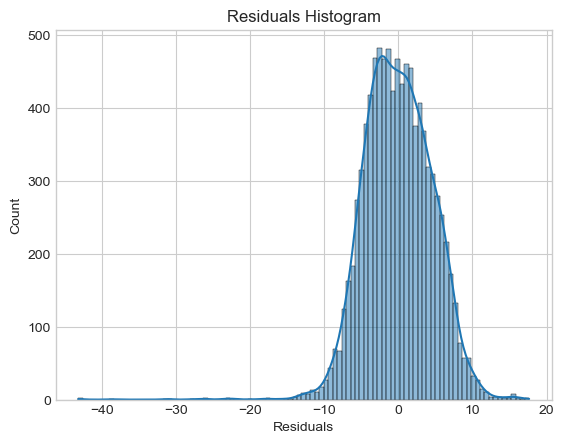

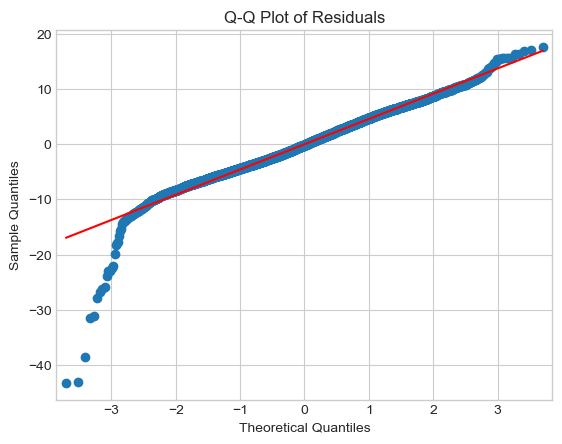

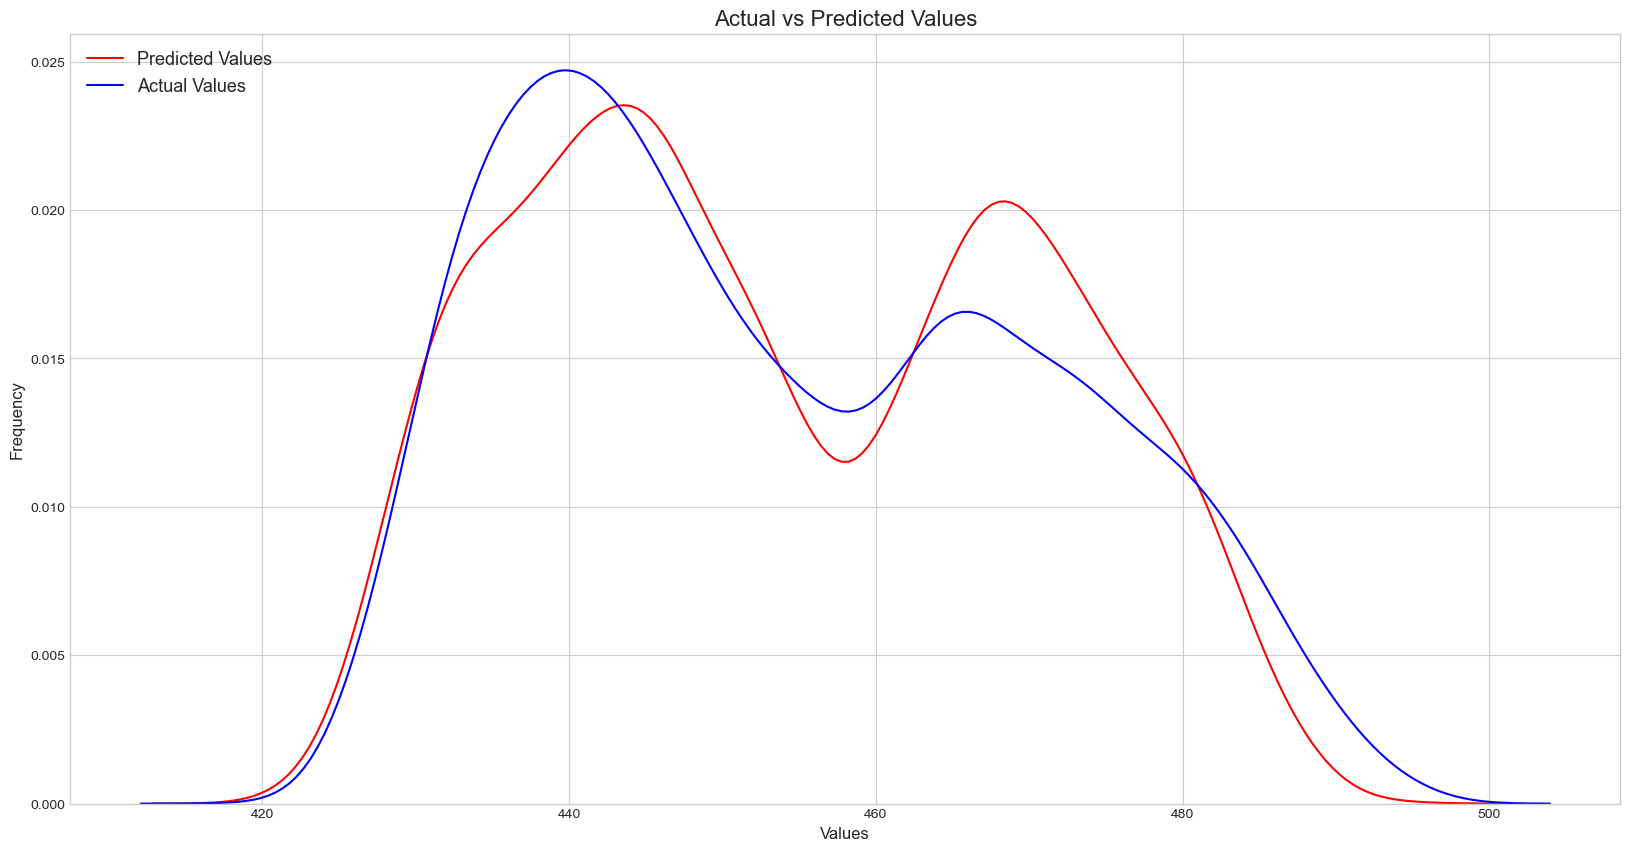

Mean Resid: 7.177650162997094e-14
Mean Squared Error (MSE): 20.91337238958488
Root Mean Squared Error (RMSE): 4.573114080097377
Adjusted R2-Value: 0.9275755587833912
R2-Value: 0.9276062992083558
-------------------------
pvalues
Series([], dtype: float64)


In [68]:
model1=model_evaluate(X,Y)

In [69]:
print(f'MAPE for the model {calculate_mape(Y,model1.fittedvalues)} %')

MAPE for the model 0.8022978091248479 %


- The difference in MAPE Values for the Model with Outliers and without Outliers is not significant also the MSE and RMSE values are not changing much , hence we can keep outliers for Model Building

In [70]:
Norm_data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9522        17.10           49.69       1005.53       81.82             457.32
9523        24.73           65.34       1015.42       52.80             446.92
9524        30.44           56.24       1005.19       56.24             429.34
9525        23.00           66.05       1020.61       80.29             421.57
9526        17.75           49.25       1020.86       63.67             454.41

[9527 rows x 5 columns]

In [71]:
X=Norm_data.copy()
X=X.drop('energy_production',axis=1)

normalised_values = MinMaxScaler().fit_transform(X)
normalised_values = np.round(normalised_values,2)
normalised_values

X=pd.DataFrame(normalised_values, columns=X.columns)

Norm_data1=X.copy()
Norm_data1['energy_production']=Norm_data['energy_production']
Norm_data1

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            0.22            0.23          0.60        0.46             481.30
1            0.29            0.30          0.66        0.93             465.36
2            0.34            0.35          0.78        0.75             465.48
3            0.34            0.51          0.62        0.72             467.05
4            0.38            0.43          0.76        0.66             463.58
...           ...             ...           ...         ...                ...
9522         0.43            0.43          0.31        0.75             457.32
9523         0.65            0.71          0.56        0.37             446.92
9524         0.81            0.55          0.30        0.41             429.34
9525         0.60            0.72          0.69        0.73             421.57
9526         0.45            0.43          0.69        0.51             454.41

[9527 rows x 5 columns]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Split the data into features (X) and target variable (Y)
X = Norm_data1.drop('energy_production', axis=1)
Y = Norm_data1['energy_production']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  1. Linear Regression

In [74]:
#Model 1: Linear Regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_preds = linear_model.predict(X_test)

In [75]:
from sklearn.metrics import r2_score

In [76]:
#Evaluating the models
def evaluate_model(model_name, y_true, y_pred,p):
    model_metrics={}
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    Adj_r2 = 1-(1-r2)*(y_true.shape[0]-1)/(y_true.shape[0]-p-1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Adjusted R-squared (R2): {Adj_r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")
    model_metrics={"Model": model_name,
                   "Mean Squared Error (MSE)": np.round(mse,2),
                   "Root Mean Squared Error (RMSE)": np.round(rmse,2),
                  "R-squared (R2)": np.round(r2,2),
                   "Adjusted R-squared (R2)": np.round(Adj_r2,2),
                   "Mean Absolute Percentage Error (MAPE)": np.round(mape,2),
                  }
    style.use('seaborn-whitegrid')
    plt.figure(figsize = (20,10))
    sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
    sns.distplot(y_true, hist = False, color = 'b', label = 'Actual Values')
    plt.title('Actual vs Predicted Values', fontsize = 16)
    plt.xlabel('Values', fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    plt.legend(loc = 'upper left', fontsize = 13)
    plt.show()
    return model_metrics

## Creating a DataFrame named Evaluation_DF to store the test result of each model

In [77]:
Evaluation_df=pd.DataFrame(columns=['Model', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)', 'Adjusted R-squared (R2)', 'Mean Absolute Percentage Error (MAPE)'])

Model: Linear Regression
Mean Squared Error (MSE): 20.98
Root Mean Squared Error (RMSE): 4.58
R-squared (R2): 0.93
Adjusted R-squared (R2): 0.93
Mean Absolute Percentage Error (MAPE): 0.80%



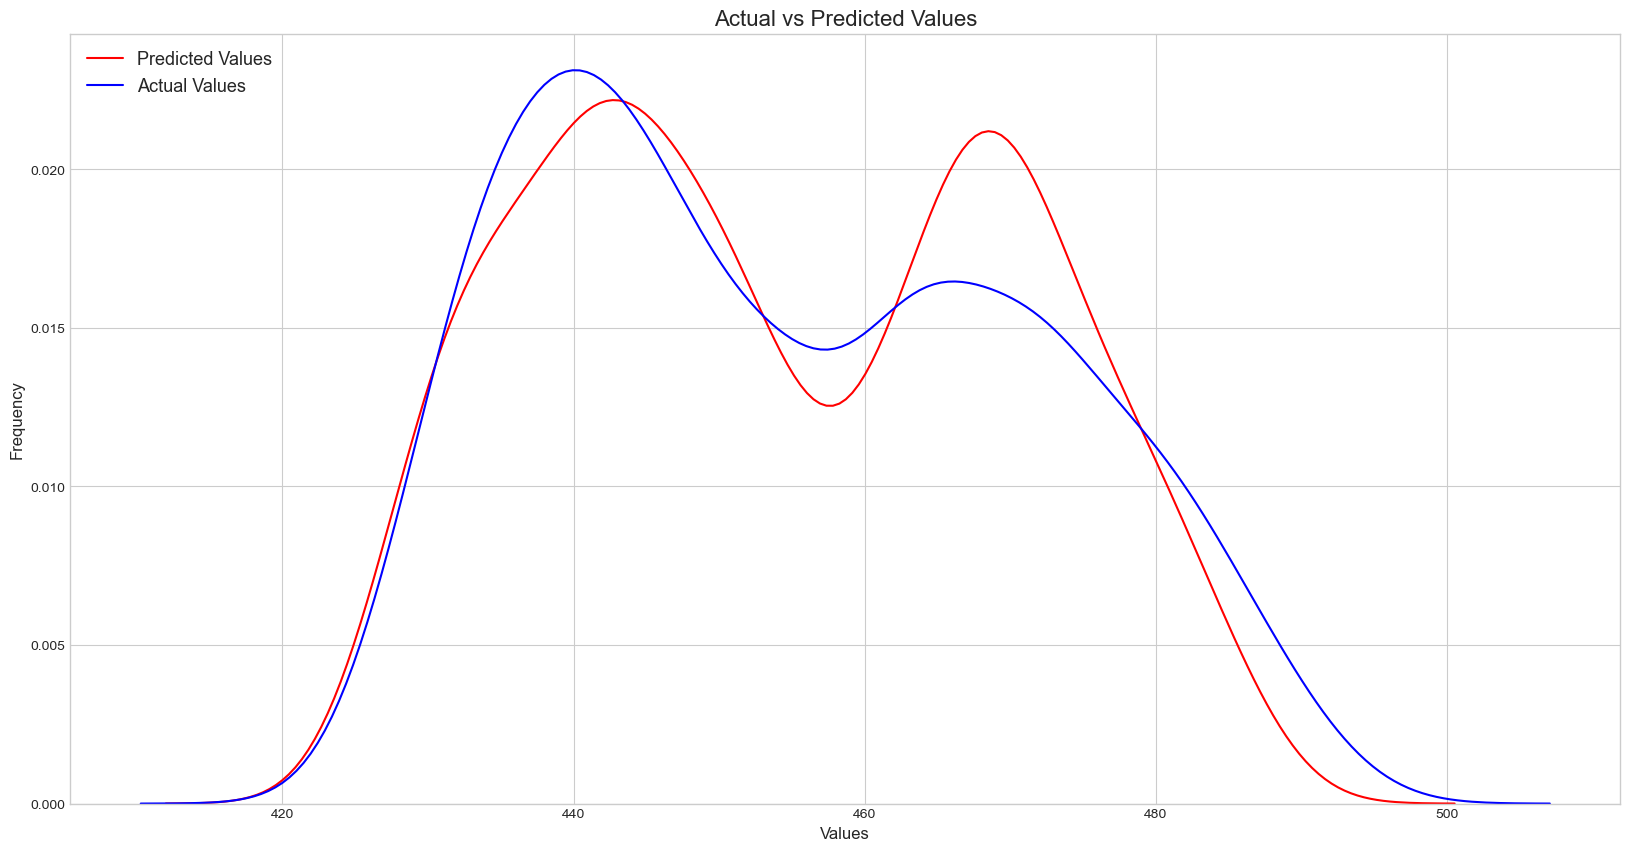

In [78]:
#Evaluating the model
results=evaluate_model("Linear Regression", Y_test, linear_preds,X_test.shape[1])

In [79]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

In [80]:
X_test.shape[1]

4

# 2. Random Forest with Hyperparameter Tuning using Random Search

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Defining hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

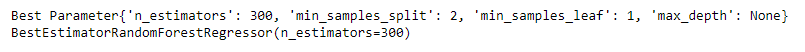

In [83]:
#Model 2: Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_split=2,min_samples_leaf=1,max_depth=None)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

Model: Random Forest Regressor
Mean Squared Error (MSE): 11.92
Root Mean Squared Error (RMSE): 3.45
R-squared (R2): 0.96
Adjusted R-squared (R2): 0.96
Mean Absolute Percentage Error (MAPE): 0.53%



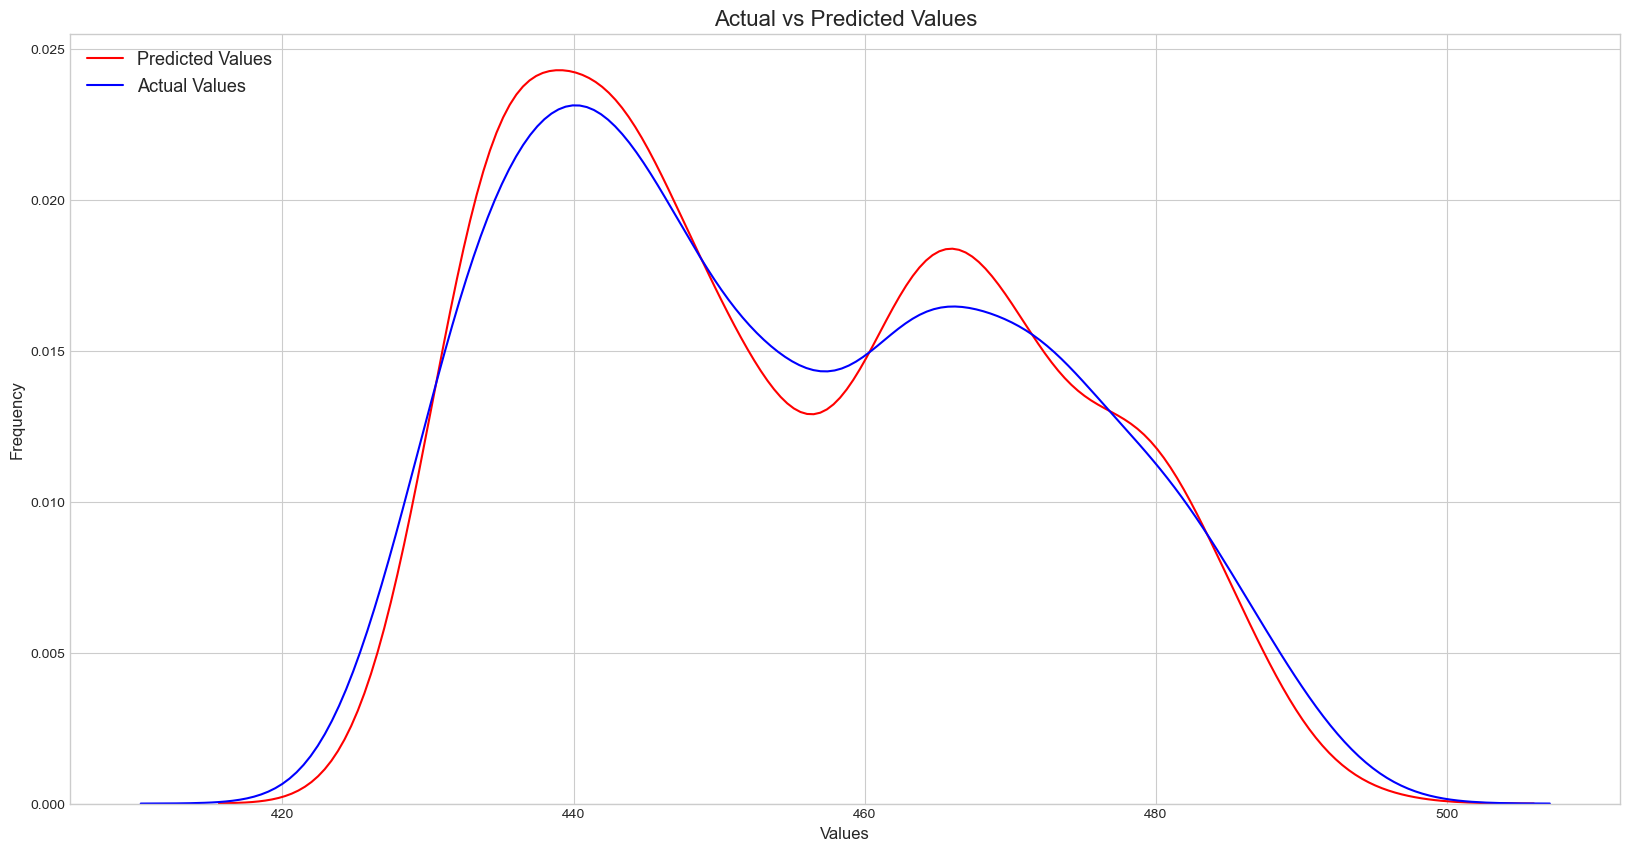

In [84]:
#Evaluating the model
results=evaluate_model("Random Forest Regressor", Y_test, rf_preds,X_test.shape[1])

In [85]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

# 3. Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_preds = gb_model.predict(X_test)

Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 16.02
Root Mean Squared Error (RMSE): 4.00
R-squared (R2): 0.94
Adjusted R-squared (R2): 0.94
Mean Absolute Percentage Error (MAPE): 0.66%



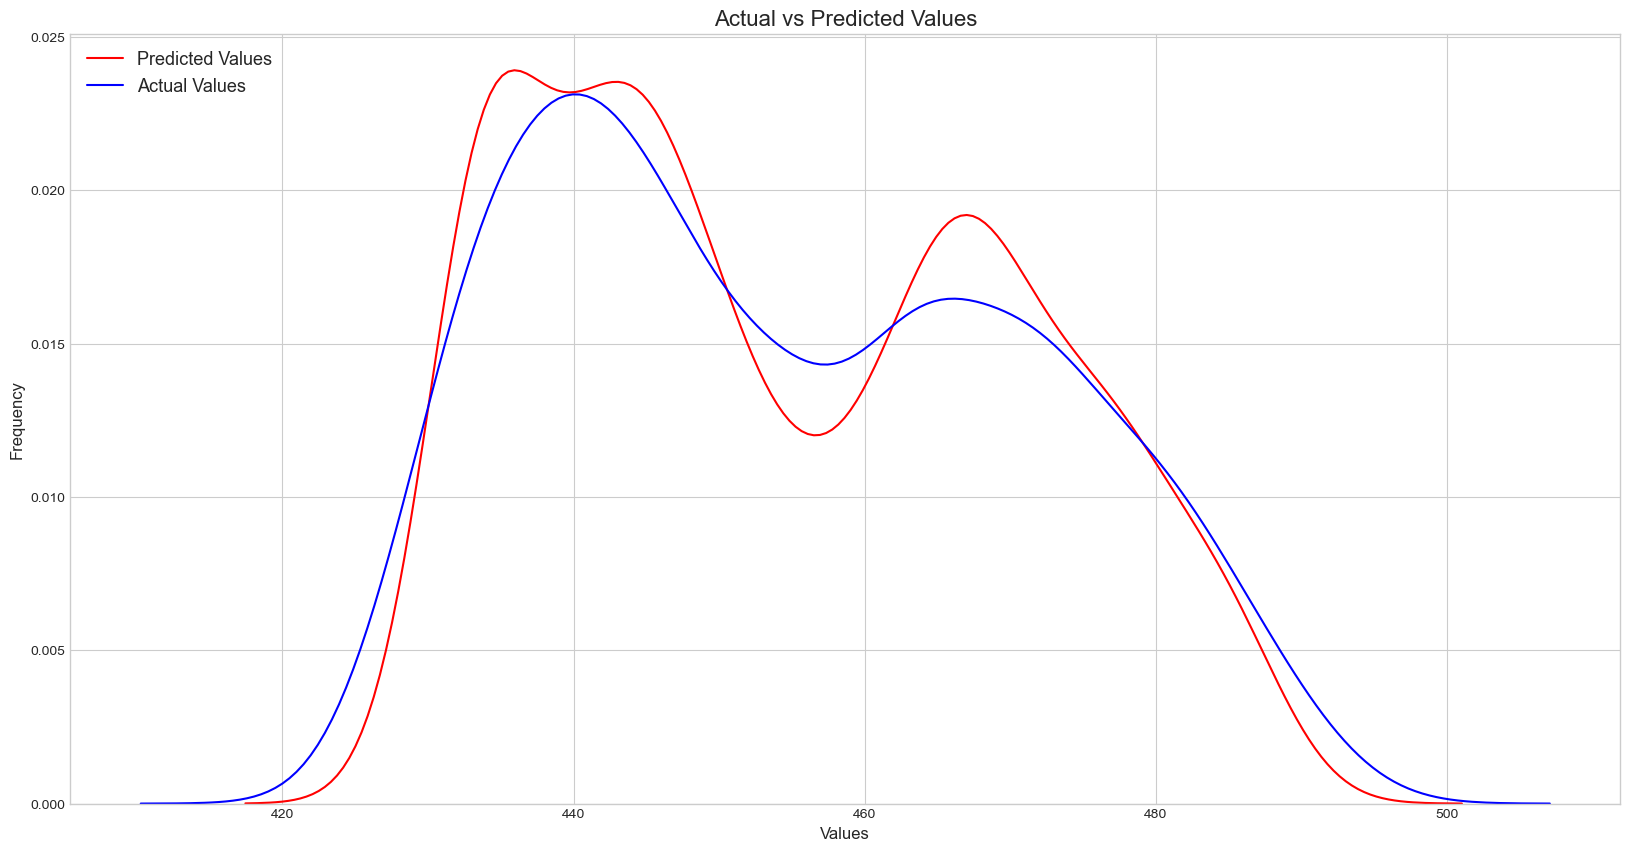

In [87]:
#Evaluating the model
results=evaluate_model("Gradient Boosting Regressor", Y_test, gb_preds,X_test.shape[1])

In [88]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

# 4. Cat Boost Regressor

In [89]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, Y_train)
cb_preds = cb_model.predict(X_test)

Model: Cat Boost Regressor
Mean Squared Error (MSE): 12.84
Root Mean Squared Error (RMSE): 3.58
R-squared (R2): 0.96
Adjusted R-squared (R2): 0.96
Mean Absolute Percentage Error (MAPE): 0.56%



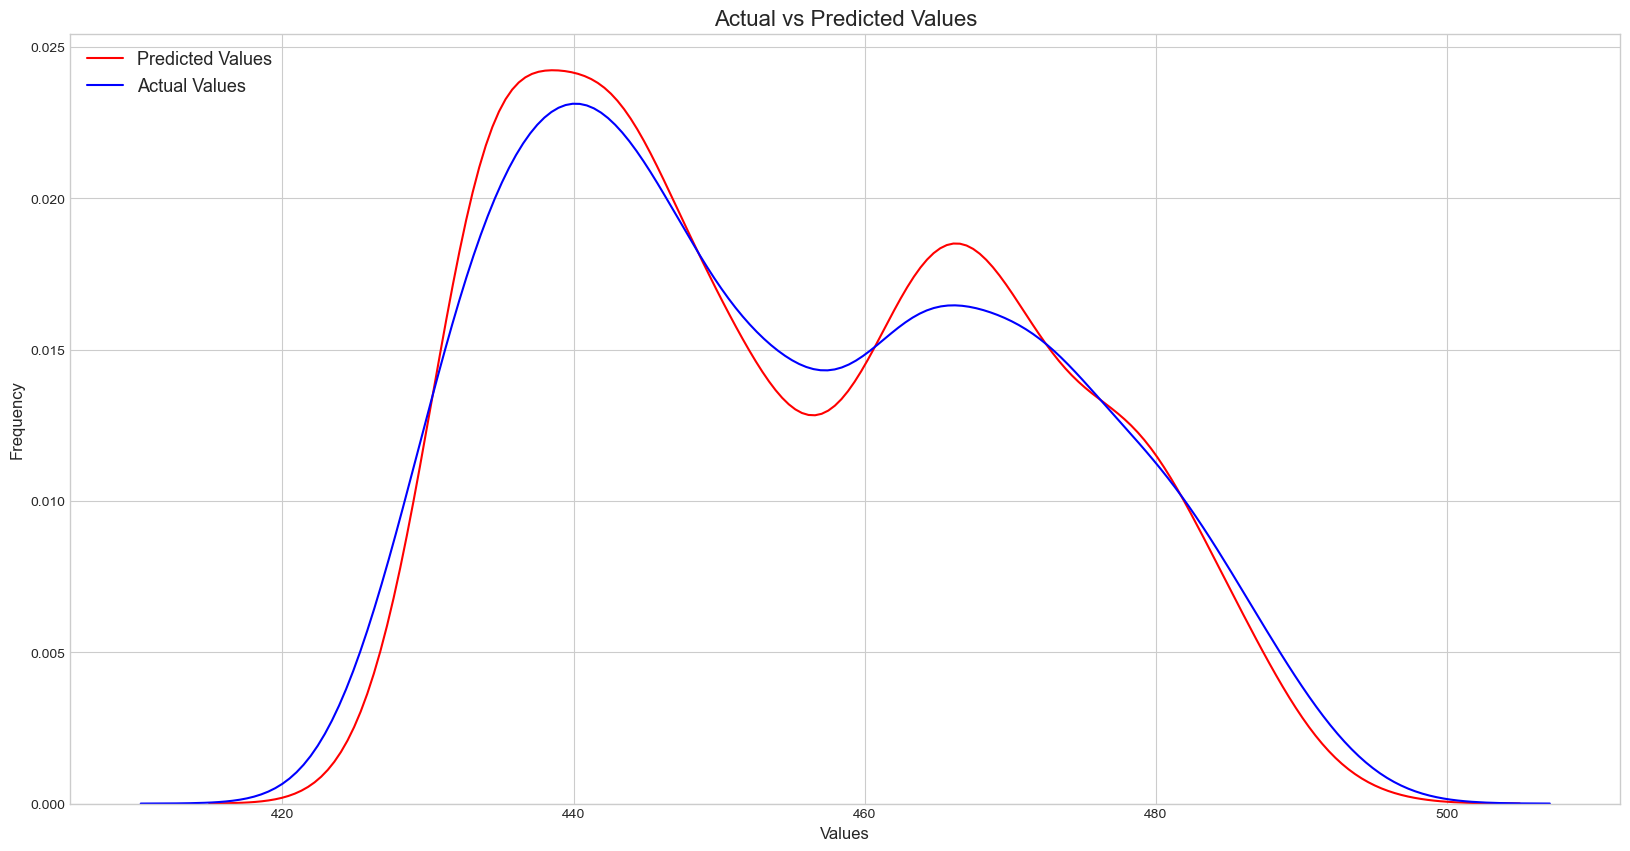

In [90]:
#Evaluating the model
results=evaluate_model("Cat Boost Regressor", Y_test, cb_preds,X_test.shape[1])

In [91]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

## Neural Network for Regression with Tensorflow

In [92]:
import tensorflow as tf

## stochastic gradient descent (SGD)
- SGD is an optimization algorithm used in machine learning to train models, especially in scenarios where the dataset is large.
- Loss Function:This is a mathematical measure of how well your model's predictions match the actual data. The goal of training is to minimize this loss function.
- The gradient of the loss function gives you the direction in which the loss increases the most. By taking the opposite direction of the gradient, you move toward the minimum of the loss function.
- For each parameter in your model, you calculate its partial derivative with respect to the loss.

In [93]:
tf.random.set_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
model.fit( X_train, Y_train, epochs = 100)

Epoch 1/100
239/239 [==============================] - 0s 747us/step - loss: 450.4501 - mae: 450.4501
Epoch 2/100
239/239 [==============================] - 0s 719us/step - loss: 445.2323 - mae: 445.2323
Epoch 3/100
239/239 [==============================] - 0s 714us/step - loss: 440.0147 - mae: 440.0147
Epoch 4/100
239/239 [==============================] - 0s 738us/step - loss: 434.7965 - mae: 434.7965
Epoch 5/100
239/239 [==============================] - 0s 753us/step - loss: 429.5781 - mae: 429.5781
Epoch 6/100
239/239 [==============================] - 0s 710us/step - loss: 424.3607 - mae: 424.3607
Epoch 7/100
239/239 [==============================] - 0s 725us/step - loss: 419.1428 - mae: 419.1428
Epoch 8/100
239/239 [==============================] - 0s 714us/step - loss: 413.9238 - mae: 413.9238
Epoch 9/100
239/239 [==============================] - 0s 712us/step - loss: 408.7051 - mae: 408.7051
Epoch 10/100
239/239 [==============================] - 0s 746us/step - loss: 403.

239/239 [==============================] - 0s 754us/step - loss: 52.0553 - mae: 52.0553
Epoch 81/100
239/239 [==============================] - 0s 689us/step - loss: 50.1792 - mae: 50.1792
Epoch 82/100
239/239 [==============================] - 0s 776us/step - loss: 48.5590 - mae: 48.5590
Epoch 83/100
239/239 [==============================] - 0s 686us/step - loss: 47.1869 - mae: 47.1869
Epoch 84/100
239/239 [==============================] - 0s 701us/step - loss: 46.0244 - mae: 46.0244
Epoch 85/100
239/239 [==============================] - 0s 685us/step - loss: 45.0438 - mae: 45.0438
Epoch 86/100
239/239 [==============================] - 0s 731us/step - loss: 44.2284 - mae: 44.2284
Epoch 87/100
239/239 [==============================] - 0s 699us/step - loss: 43.5471 - mae: 43.5471
Epoch 88/100
239/239 [==============================] - 0s 735us/step - loss: 42.9688 - mae: 42.9688
Epoch 89/100
239/239 [==============================] - 0s 730us/step - loss: 42.4765 - mae: 42.4765
Epo

In [94]:
nn_preds = model.predict(X_test)

60/60 [==============================] - 0s 713us/step


In [95]:
mae = tf.metrics.mean_absolute_error( y_true = Y_test,
                                      y_pred = nn_preds)
pd.DataFrame({'y':Y_test,'y_pred': nn_preds[:,0],'mae':mae})

y      y_pred        mae
1087  434.73  463.708282  16.556137
6308  444.74  458.427856  15.281963
8021  457.09  451.017578  14.773043
9483  435.39  439.301270  17.881187
4459  441.91  473.702057  21.539631
...      ...         ...        ...
3400  440.53  478.419067  24.967905
4210  443.79  437.304138  19.045744
7065  480.53  420.414825  34.211121
2213  436.16  470.707153  19.708050
4983  452.31  456.556671  15.004733

[1906 rows x 3 columns]

Model: Neural Networks(SGD)
Mean Squared Error (MSE): 2343.32
Root Mean Squared Error (RMSE): 48.41
R-squared (R2): -7.05
Adjusted R-squared (R2): -7.06
Mean Absolute Percentage Error (MAPE): 8.61%



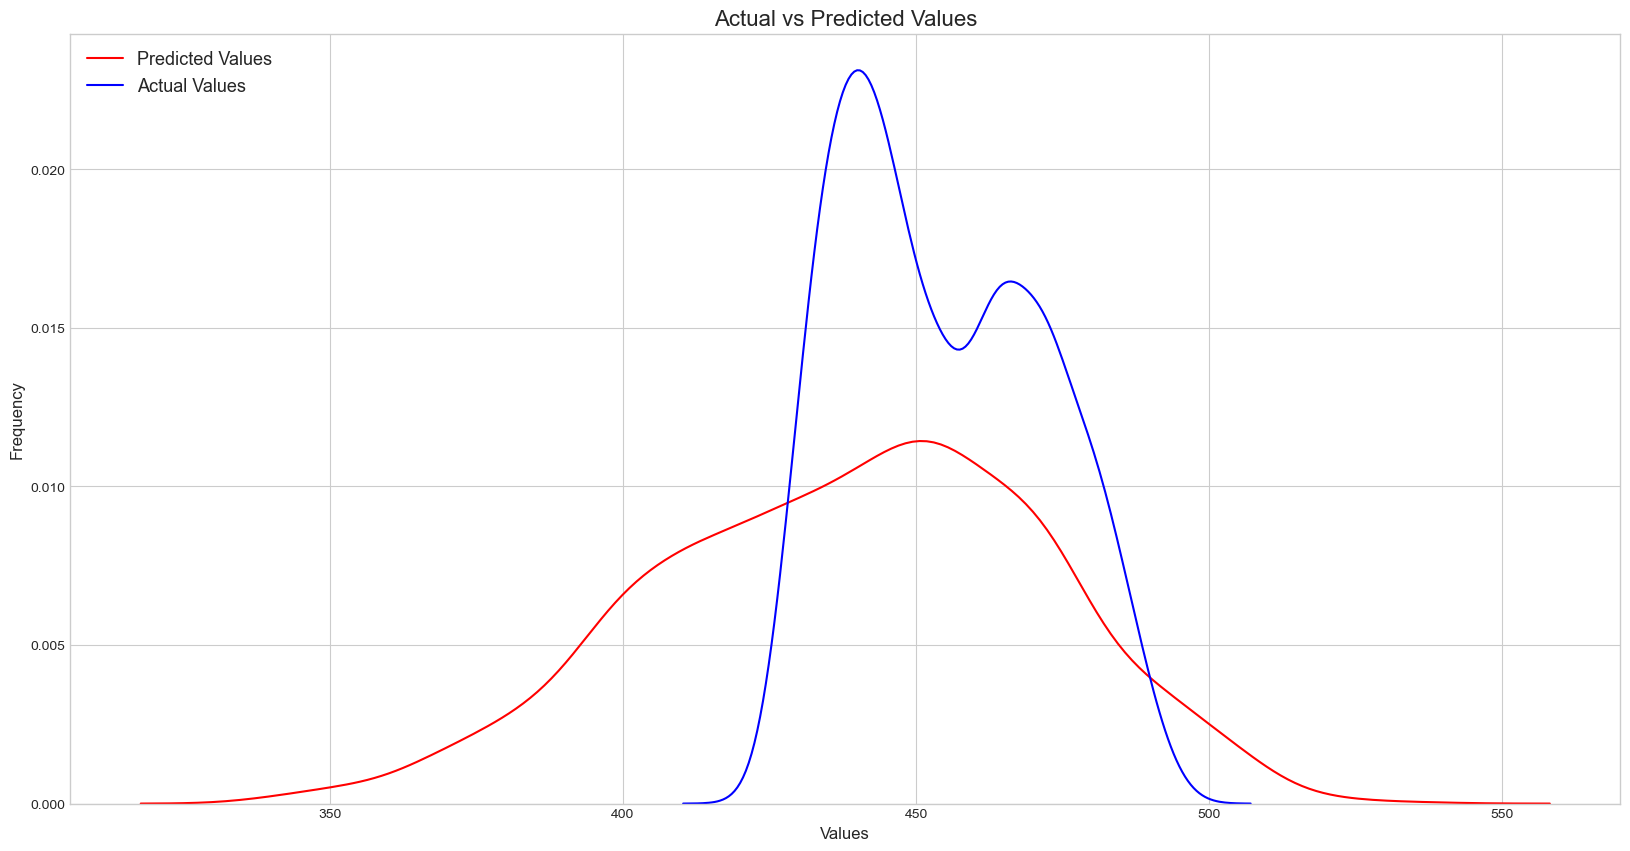

In [96]:
results=evaluate_model("Neural Networks(SGD)", Y_test, nn_preds[:,0],X_test.shape[1])

In [97]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

- We can see that The MSE and RMSE is very high, so let’s start to improve our model with neural network

In [98]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
239/239 [==============================] - 0s 811us/step - loss: 379.2300 - mae: 379.2300
Epoch 2/100
239/239 [==============================] - 0s 731us/step - loss: 29.8916 - mae: 29.8916
Epoch 3/100
239/239 [==============================] - 0s 724us/step - loss: 20.6118 - mae: 20.6118
Epoch 4/100
239/239 [==============================] - 0s 748us/step - loss: 15.9755 - mae: 15.9755
Epoch 5/100
239/239 [==============================] - 0s 750us/step - loss: 12.2428 - mae: 12.2428
Epoch 6/100
239/239 [==============================] - 0s 752us/step - loss: 9.3442 - mae: 9.3442
Epoch 7/100
239/239 [==============================] - 0s 733us/step - loss: 7.1724 - mae: 7.1724
Epoch 8/100
239/239 [==============================] - 0s 724us/step - loss: 5.8654 - mae: 5.8654
Epoch 9/100
239/239 [==============================] - 0s 744us/step - loss: 5.6483 - mae: 5.6483
Epoch 10/100
239/239 [==============================] - 0s 747us/step - loss: 5.7794 - mae: 5.7794
Epoch 1

239/239 [==============================] - 0s 757us/step - loss: 5.2211 - mae: 5.2211
Epoch 84/100
239/239 [==============================] - 0s 748us/step - loss: 5.2605 - mae: 5.2605
Epoch 85/100
239/239 [==============================] - 0s 714us/step - loss: 5.2629 - mae: 5.2629
Epoch 86/100
239/239 [==============================] - 0s 712us/step - loss: 5.1247 - mae: 5.1247
Epoch 87/100
239/239 [==============================] - 0s 706us/step - loss: 5.1854 - mae: 5.1854
Epoch 88/100
239/239 [==============================] - 0s 710us/step - loss: 4.9552 - mae: 4.9552
Epoch 89/100
239/239 [==============================] - 0s 734us/step - loss: 5.3375 - mae: 5.3375
Epoch 90/100
239/239 [==============================] - 0s 698us/step - loss: 5.2125 - mae: 5.2125
Epoch 91/100
239/239 [==============================] - 0s 744us/step - loss: 5.2535 - mae: 5.2535
Epoch 92/100
239/239 [==============================] - 0s 705us/step - loss: 5.3804 - mae: 5.3804
Epoch 93/100
239/239 [=

In [99]:
nn_preds = model_2.predict(X_test)

60/60 [==============================] - 0s 687us/step


In [100]:
mae = tf.metrics.mean_absolute_error( y_true = Y_test,
                                      y_pred = nn_preds)

In [101]:
pd.DataFrame({'y':Y_test,'y_pred': nn_preds[:,0],'mae':mae})

y      y_pred        mae
1087  434.73  433.915558  21.437140
6308  444.74  445.725067  15.456987
8021  457.09  452.955658  14.740229
9483  435.39  443.591431  16.049482
4459  441.91  437.464569  18.944864
...      ...         ...        ...
3400  440.53  430.189240  24.622810
4210  443.79  432.287231  22.763409
7065  480.53  483.207123  28.998926
2213  436.16  437.030273  19.220943
4983  452.31  446.741943  15.240467

[1906 rows x 3 columns]

Model: Neural Networks(SGD) 1 layer
Mean Squared Error (MSE): 26.55
Root Mean Squared Error (RMSE): 5.15
R-squared (R2): 0.91
Adjusted R-squared (R2): 0.91
Mean Absolute Percentage Error (MAPE): 0.88%



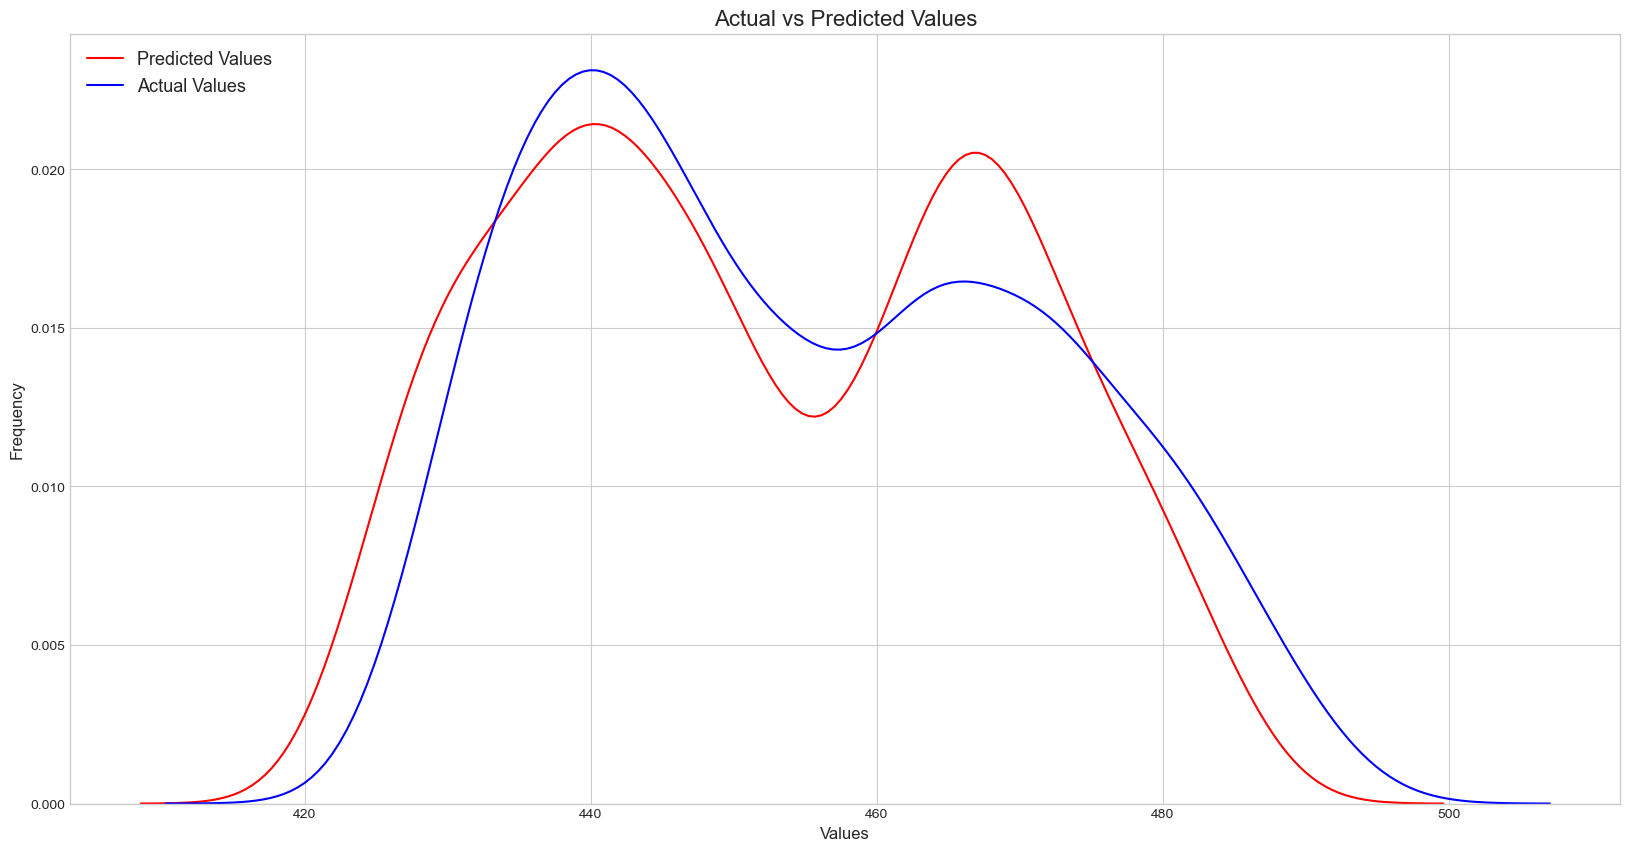

In [102]:
results=evaluate_model("Neural Networks(SGD) 1 layer", Y_test, nn_preds[:,0],X_test.shape[1])

In [103]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

- The extra layer did help us to make our model better. Let’s us try to change our optimizer if we are getting even better results.

In [104]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(X_train, Y_train, epochs=100)

Epoch 1/100
239/239 [==============================] - 1s 783us/step - loss: 454.2819 - mae: 454.2819
Epoch 2/100
239/239 [==============================] - 0s 751us/step - loss: 453.9022 - mae: 453.9022
Epoch 3/100
239/239 [==============================] - 0s 751us/step - loss: 453.3865 - mae: 453.3865
Epoch 4/100
239/239 [==============================] - 0s 798us/step - loss: 451.6761 - mae: 451.6761
Epoch 5/100
239/239 [==============================] - 0s 863us/step - loss: 448.5453 - mae: 448.5453
Epoch 6/100
239/239 [==============================] - 0s 781us/step - loss: 444.4465 - mae: 444.4465
Epoch 7/100
239/239 [==============================] - 0s 790us/step - loss: 439.5916 - mae: 439.5916
Epoch 8/100
239/239 [==============================] - 0s 797us/step - loss: 434.0772 - mae: 434.0772
Epoch 9/100
239/239 [==============================] - 0s 767us/step - loss: 427.9621 - mae: 427.9621
Epoch 10/100
239/239 [==============================] - 0s 747us/step - loss: 421.

239/239 [==============================] - 0s 743us/step - loss: 30.4808 - mae: 30.4808
Epoch 82/100
239/239 [==============================] - 0s 727us/step - loss: 30.2651 - mae: 30.2651
Epoch 83/100
239/239 [==============================] - 0s 721us/step - loss: 30.0595 - mae: 30.0595
Epoch 84/100
239/239 [==============================] - 0s 726us/step - loss: 29.8627 - mae: 29.8627
Epoch 85/100
239/239 [==============================] - 0s 730us/step - loss: 29.6695 - mae: 29.6695
Epoch 86/100
239/239 [==============================] - 0s 734us/step - loss: 29.4789 - mae: 29.4789
Epoch 87/100
239/239 [==============================] - 0s 729us/step - loss: 29.2946 - mae: 29.2946
Epoch 88/100
239/239 [==============================] - 0s 721us/step - loss: 29.1197 - mae: 29.1197
Epoch 89/100
239/239 [==============================] - 0s 735us/step - loss: 28.9461 - mae: 28.9461
Epoch 90/100
239/239 [==============================] - 0s 724us/step - loss: 28.7778 - mae: 28.7778
Epo

In [105]:
nn_preds = model_3.predict(X_test)

60/60 [==============================] - 0s 741us/step


In [106]:
mae = tf.metrics.mean_absolute_error( y_true = Y_test,
                                      y_pred = nn_preds)

In [107]:
pd.DataFrame({'y':Y_test,'y_pred': nn_preds[:,0],'mae':mae})

y      y_pred        mae
1087  434.73  437.477692  18.936680
6308  444.74  448.780396  14.934277
8021  457.09  472.305176  20.643909
9483  435.39  422.459106  32.167770
4459  441.91  469.273804  18.934036
...      ...         ...        ...
3400  440.53  458.080261  15.224467
4210  443.79  407.342957  47.282986
7065  480.53  492.294830  37.678314
2213  436.16  478.187469  24.788157
4983  452.31  465.956268  17.391853

[1906 rows x 3 columns]

Model: Neural Networks(Adam)
Mean Squared Error (MSE): 1175.96
Root Mean Squared Error (RMSE): 34.29
R-squared (R2): -3.04
Adjusted R-squared (R2): -3.05
Mean Absolute Percentage Error (MAPE): 6.02%



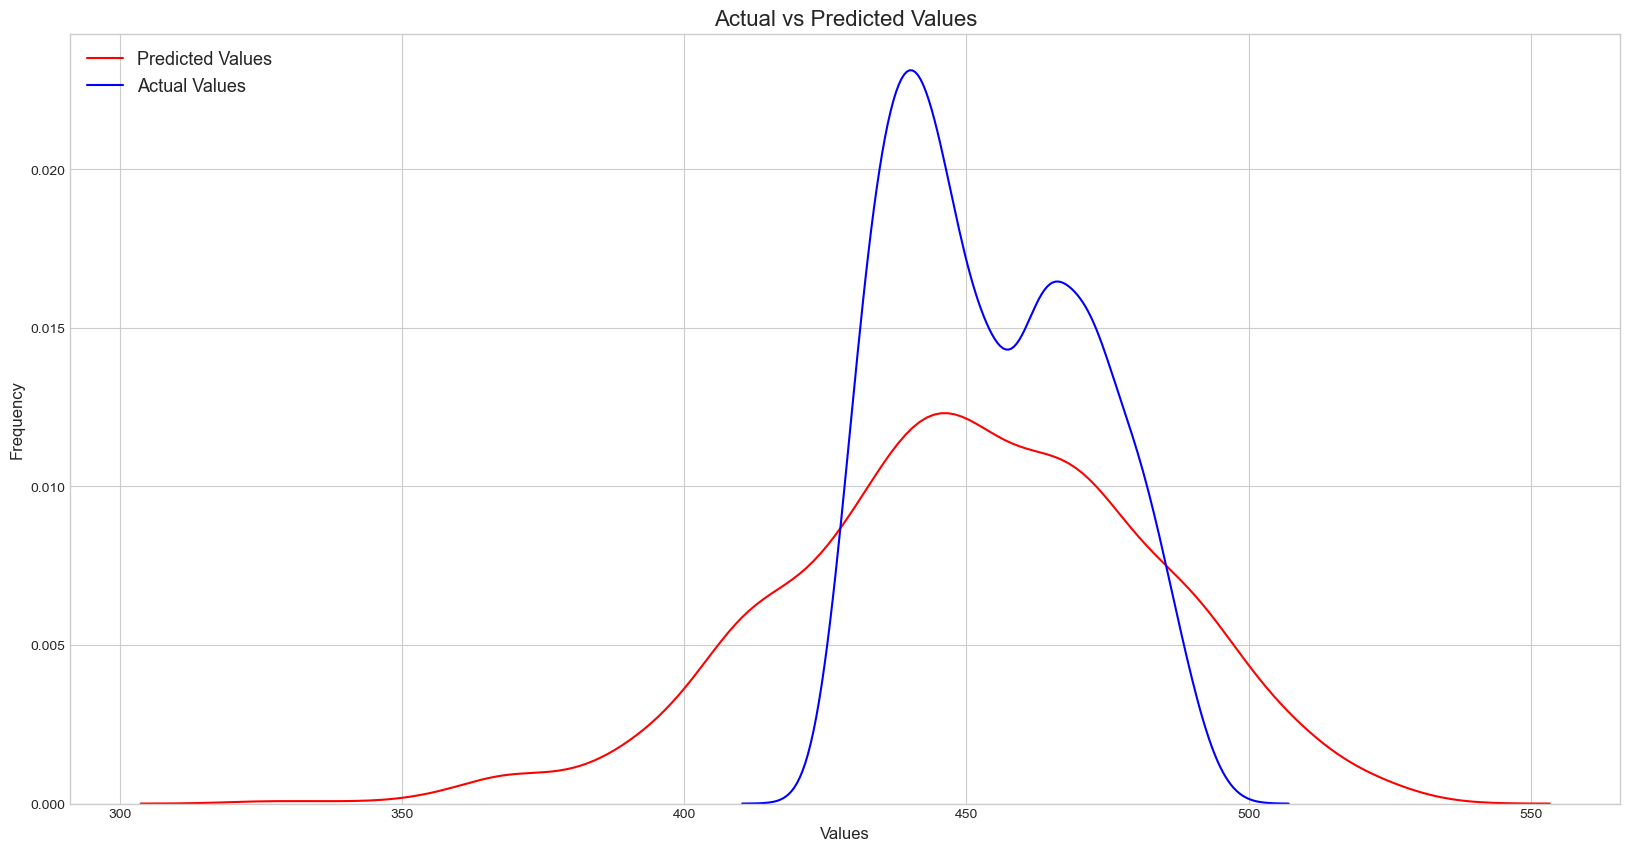

In [108]:
results=evaluate_model("Neural Networks(Adam)", Y_test, nn_preds[:,0],X_test.shape[1])

In [109]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)

In [110]:
model_4 = tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.Adam(),
metrics=['mae'])

model_4.compile(loss=tf.keras.losses.mae,

                optimizer=tf.keras.optimizers.Adam(),

                metrics=['mae'])

model_4.fit(X_train, Y_train, epochs=100)

Epoch 1/100
239/239 [==============================] - 1s 916us/step - loss: 351.6270 - mae: 351.6270
Epoch 2/100
239/239 [==============================] - 0s 870us/step - loss: 46.0835 - mae: 46.0835
Epoch 3/100
239/239 [==============================] - 0s 907us/step - loss: 34.6772 - mae: 34.6772
Epoch 4/100
239/239 [==============================] - 0s 854us/step - loss: 29.9350 - mae: 29.9350
Epoch 5/100
239/239 [==============================] - 0s 856us/step - loss: 26.6253 - mae: 26.6253
Epoch 6/100
239/239 [==============================] - 0s 848us/step - loss: 23.4513 - mae: 23.4513
Epoch 7/100
239/239 [==============================] - 0s 849us/step - loss: 20.2265 - mae: 20.2265
Epoch 8/100
239/239 [==============================] - 0s 836us/step - loss: 17.2364 - mae: 17.2364
Epoch 9/100
239/239 [==============================] - 0s 839us/step - loss: 14.4205 - mae: 14.4205
Epoch 10/100
239/239 [==============================] - 0s 898us/step - loss: 12.0467 - mae: 12.04

239/239 [==============================] - 0s 832us/step - loss: 3.7720 - mae: 3.7720
Epoch 84/100
239/239 [==============================] - 0s 861us/step - loss: 3.6953 - mae: 3.6953
Epoch 85/100
239/239 [==============================] - 0s 836us/step - loss: 3.6753 - mae: 3.6753
Epoch 86/100
239/239 [==============================] - 0s 861us/step - loss: 3.7156 - mae: 3.7156
Epoch 87/100
239/239 [==============================] - 0s 878us/step - loss: 3.6662 - mae: 3.6662
Epoch 88/100
239/239 [==============================] - 0s 846us/step - loss: 3.7089 - mae: 3.7089
Epoch 89/100
239/239 [==============================] - 0s 852us/step - loss: 3.7474 - mae: 3.7474
Epoch 90/100
239/239 [==============================] - 0s 889us/step - loss: 3.7245 - mae: 3.7245
Epoch 91/100
239/239 [==============================] - 0s 840us/step - loss: 3.7188 - mae: 3.7188
Epoch 92/100
239/239 [==============================] - 0s 822us/step - loss: 3.7084 - mae: 3.7084
Epoch 93/100
239/239 [=

In [111]:
nn_preds = model_4.predict(X_test)

60/60 [==============================] - 0s 755us/step


In [112]:
mae = tf.metrics.mean_absolute_error( y_true = Y_test,
                                      y_pred = nn_preds)

In [113]:
pd.DataFrame({'y':Y_test,'y_pred': nn_preds[:,0],'mae':mae})

y      y_pred        mae
1087  434.73  437.845367  18.710913
6308  444.74  449.482574  14.866617
8021  457.09  456.149200  14.954619
9483  435.39  447.160339  15.163925
4459  441.91  441.208099  16.953011
...      ...         ...        ...
3400  440.53  434.069672  21.317007
4210  443.79  435.952087  19.942072
7065  480.53  485.693878  31.272833
2213  436.16  440.524597  17.261726
4983  452.31  450.127686  14.819278

[1906 rows x 3 columns]

Model: Neural Networks(Adam) Multi Layer
Mean Squared Error (MSE): 22.32
Root Mean Squared Error (RMSE): 4.72
R-squared (R2): 0.92
Adjusted R-squared (R2): 0.92
Mean Absolute Percentage Error (MAPE): 0.83%



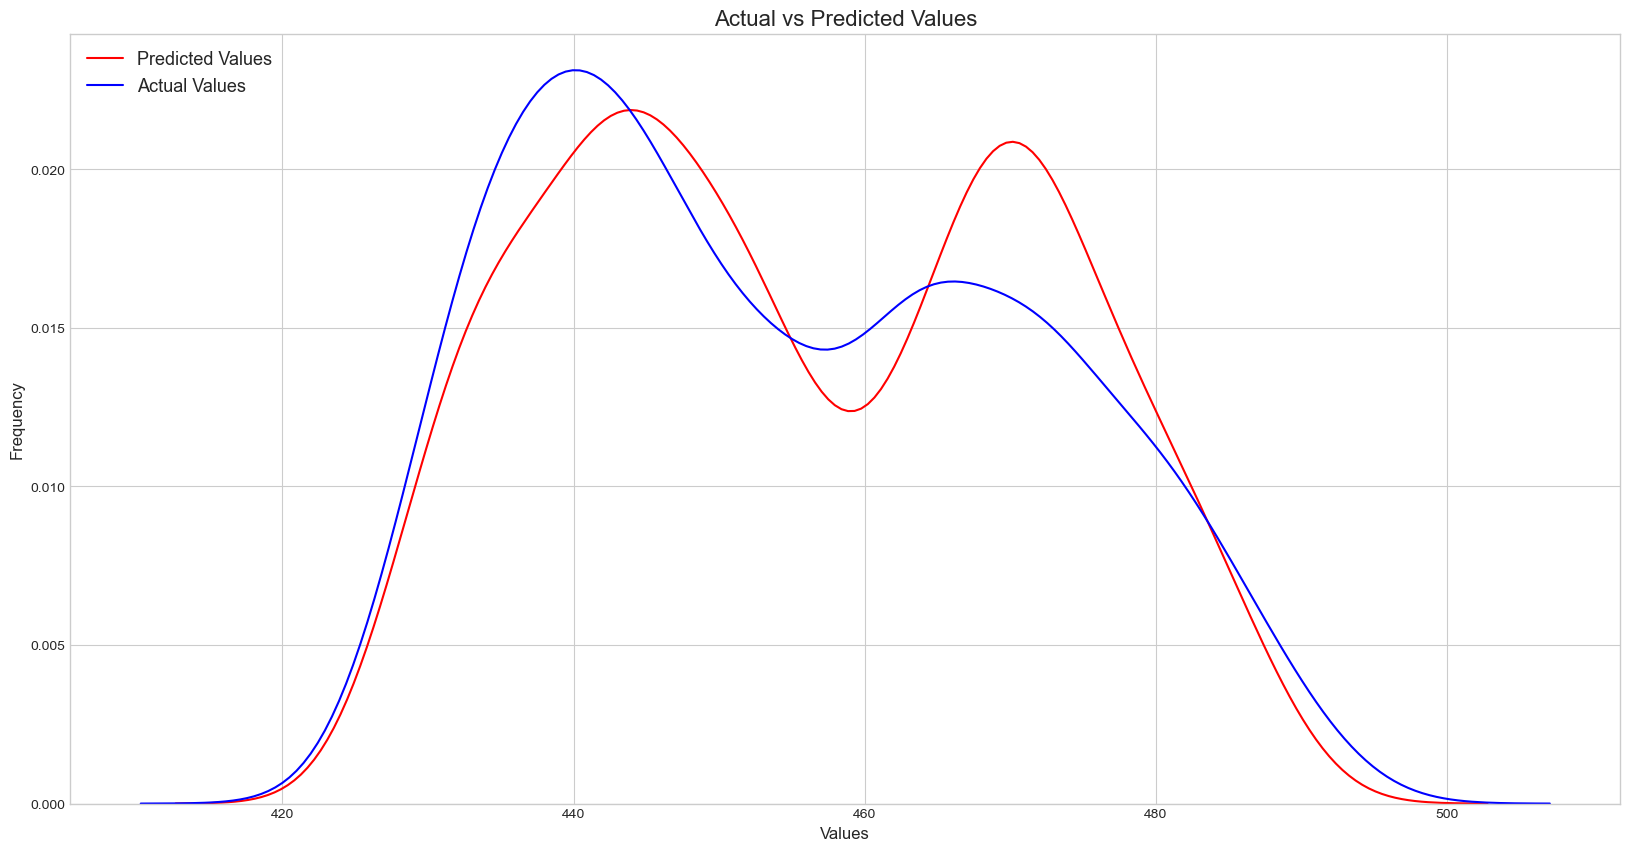

In [114]:
results=evaluate_model("Neural Networks(Adam) Multi Layer", Y_test, nn_preds[:,0],X_test.shape[1])

In [115]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df=Evaluation_df.sort_values("Root Mean Squared Error (RMSE)").reset_index(drop=True)

In [116]:
Evaluation_df

Model  Mean Squared Error (MSE)  \
0            Random Forest Regressor                     11.92   
1                Cat Boost Regressor                     12.84   
2        Gradient Boosting Regressor                     16.02   
3                  Linear Regression                     20.98   
4  Neural Networks(Adam) Multi Layer                     22.32   
5       Neural Networks(SGD) 1 layer                     26.55   
6              Neural Networks(Adam)                   1175.96   
7               Neural Networks(SGD)                   2343.32   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            3.45            0.96                     0.96   
1                            3.58            0.96                     0.96   
2                            4.00            0.94                     0.94   
3                            4.58            0.93                     0.93   
4                            4.72            0.92                     0.92   
5                            5.15            0.91                     0.91   
6                           34.29           -3.04                    -3.05   
7                           48.41           -7.05                    -7.06   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.53  
1                                   0.56  
2                                   0.66  
3                                   0.80  
4                                   0.83  
5                                   0.88  
6                                   6.02  
7                                   8.61

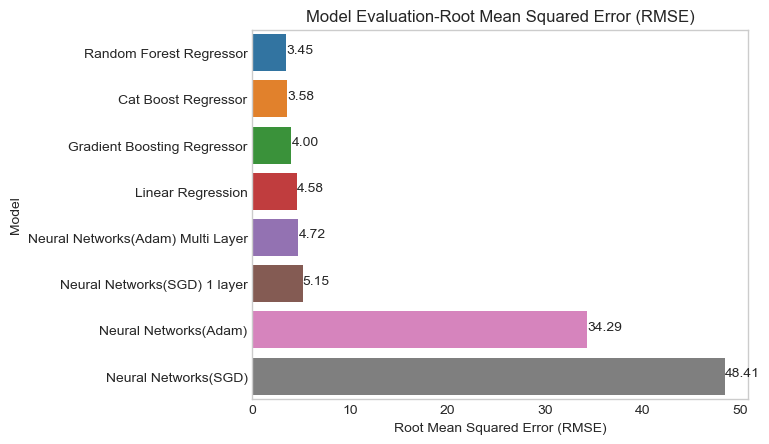

In [117]:
ax=sns.barplot(y="Model",x="Root Mean Squared Error (RMSE)",
               data=Evaluation_df)
for j,v in enumerate(Evaluation_df['Root Mean Squared Error (RMSE)'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Root Mean Squared Error (RMSE)")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-Root Mean Squared Error (RMSE)")
plt.show()

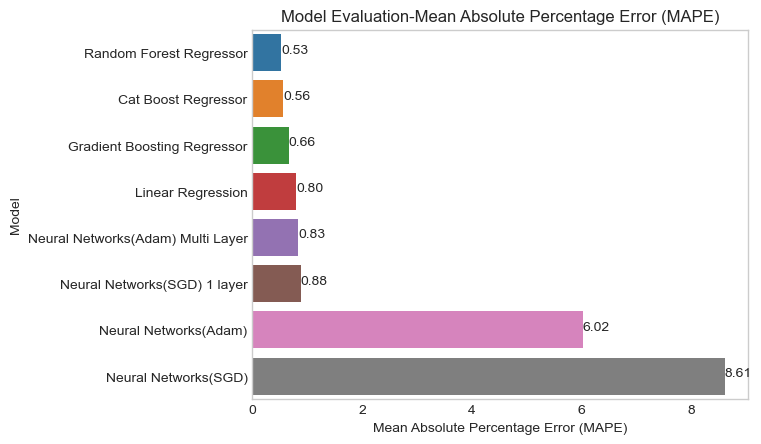

In [118]:
ax=sns.barplot(y="Model",x="Mean Absolute Percentage Error (MAPE)",
               data=Evaluation_df)
for j,v in enumerate(Evaluation_df['Mean Absolute Percentage Error (MAPE)'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Mean Absolute Percentage Error (MAPE)")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-Mean Absolute Percentage Error (MAPE)")
plt.show()

# Kfold validation for regression

In [119]:
from sklearn.model_selection import KFold

In [120]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the regression models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
cat_boosting_reg = CatBoostRegressor(verbose=False)

# Train and evaluate each model
models = [
    ("Linear Regression", linear_reg),
    ("Ridge Regression", ridge_reg),
    ("Lasso Regression", lasso_reg),
    ("Decision Tree Regression", decision_tree_reg),
    ("Random Forest Regression", random_forest_reg),
    ("Gradient Boosting Regression", gradient_boosting_reg),
    ("Cat Boosting Regression", cat_boosting_reg)
]

In [121]:
Evaluation_df1=pd.DataFrame(columns=['Model', 'n_splits','MSE', 'RMSE', 'R-squared(R2)', 'Adjusted R-squared (R2)', 'MAPE'])

In [122]:
X = Norm_data1.drop('energy_production', axis=1).values
y = Norm_data1['energy_production']

In [123]:
n_splits=[5,10,15,20]

In [124]:
from sklearn.metrics import mean_absolute_percentage_error
values_dict={}
for model_name,reg_model in models:
    for i in n_splits:
        kf = KFold(n_splits=i, shuffle=True, random_state=42)
        mse_scores=[]
        rmse_scores=[]
        r2_scores =[]
        Adj_r2_scores =[]
        mape_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            # Fit the model on the training data
            reg_model.fit(X_train, y_train)
            # Make predictions on the validation data
            y_pred = reg_model.predict(X_val)
            # Calculate the metrics for this fold
            mse=mean_squared_error(y_val, y_pred)
            mse_scores.append(mean_squared_error(y_val, y_pred))
            rmse_scores.append(np.sqrt(mse))
            r2=r2_score(y_val, y_pred)
            r2_scores.append(r2_score(y_val, y_pred))
            Adj_r2_scores.append((1-(1-r2)*(y_val.shape[0]-1)/(y_val.shape[0]-X_val.shape[1]-1)))
            mape_scores.append(mean_absolute_percentage_error(y_val, y_pred)*100)
        values_dict={'Model':model_name, 'n_splits':i,'MSE':mse_scores, 'RMSE':rmse_scores, 'R-squared(R2)':r2_scores,'Adjusted R-squared (R2)':Adj_r2_scores, 'MAPE':mape_scores}
        Evaluation_df1=Evaluation_df1.append(values_dict,ignore_index=True)
#Evaluation_df1

In [125]:
Evaluation_df1.columns

Index(['Model', 'n_splits', 'MSE', 'RMSE', 'R-squared(R2)',
       'Adjusted R-squared (R2)', 'MAPE'],
      dtype='object')

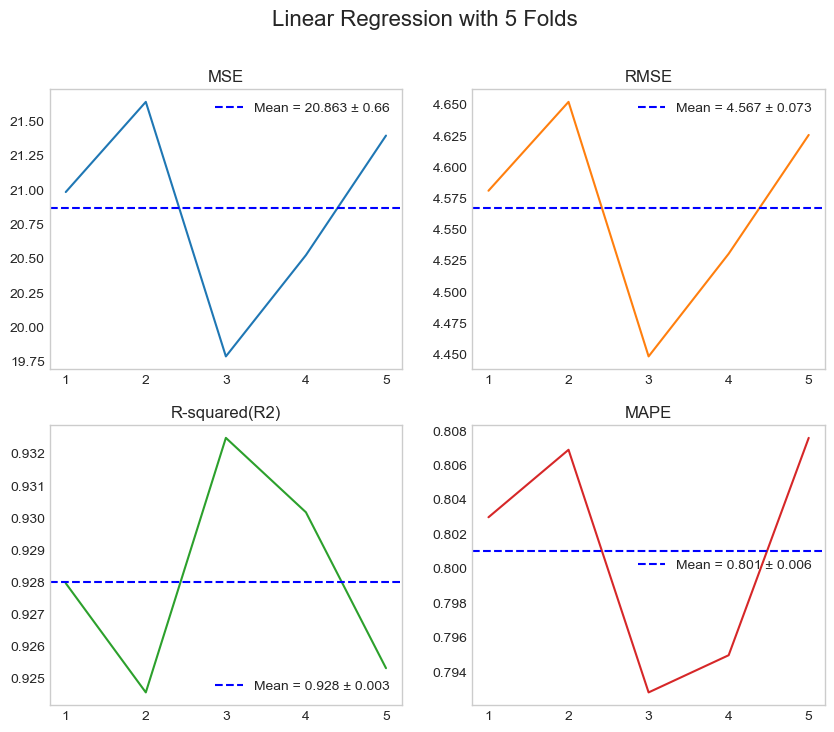

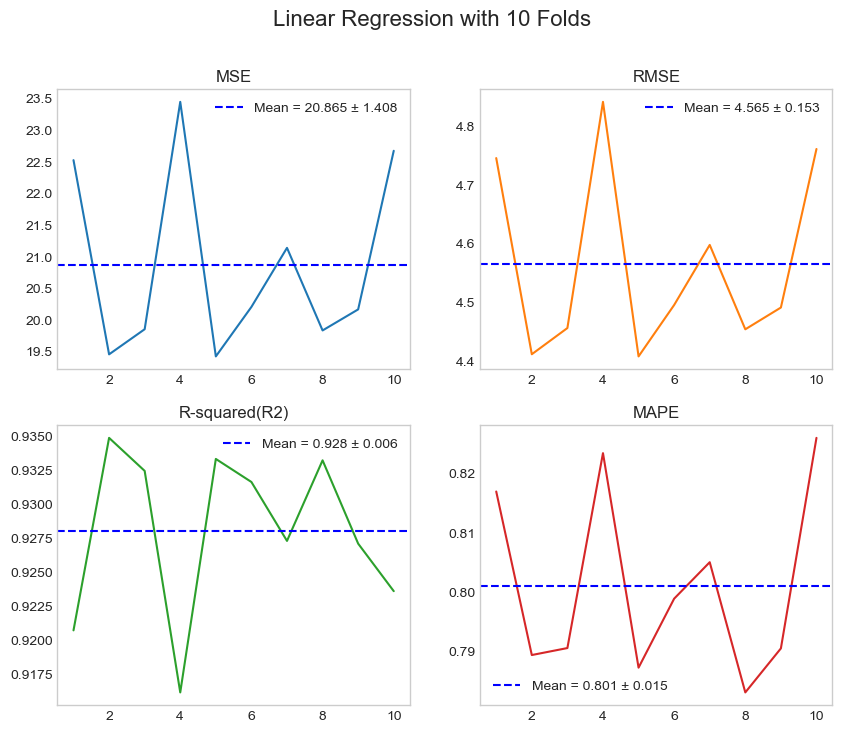

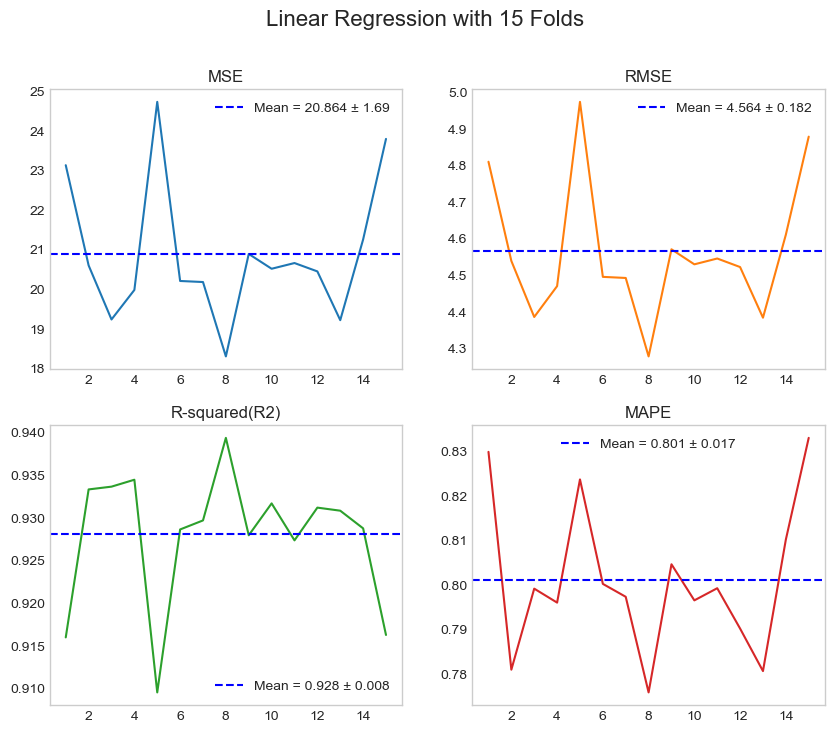

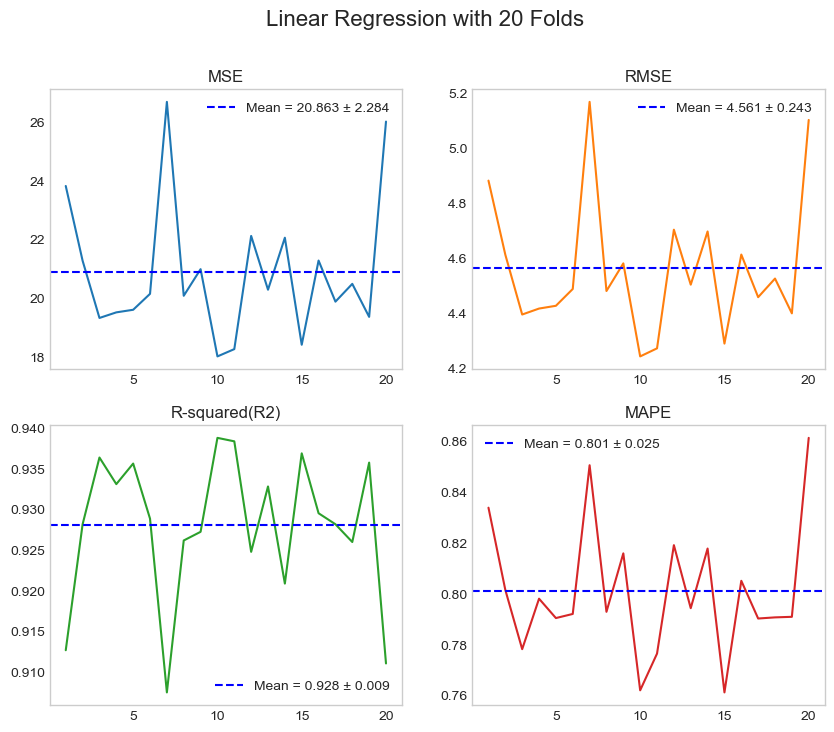

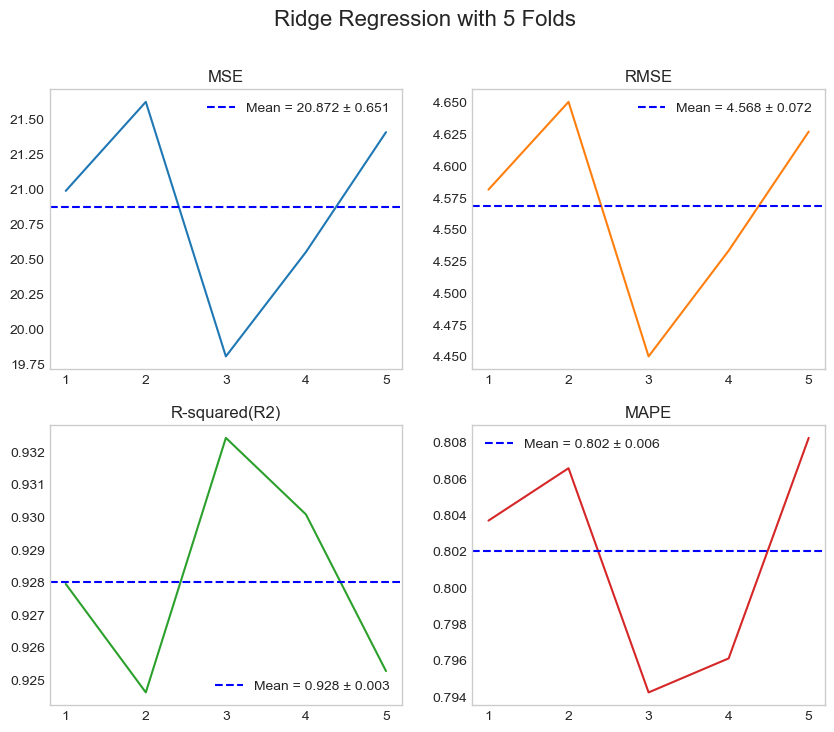

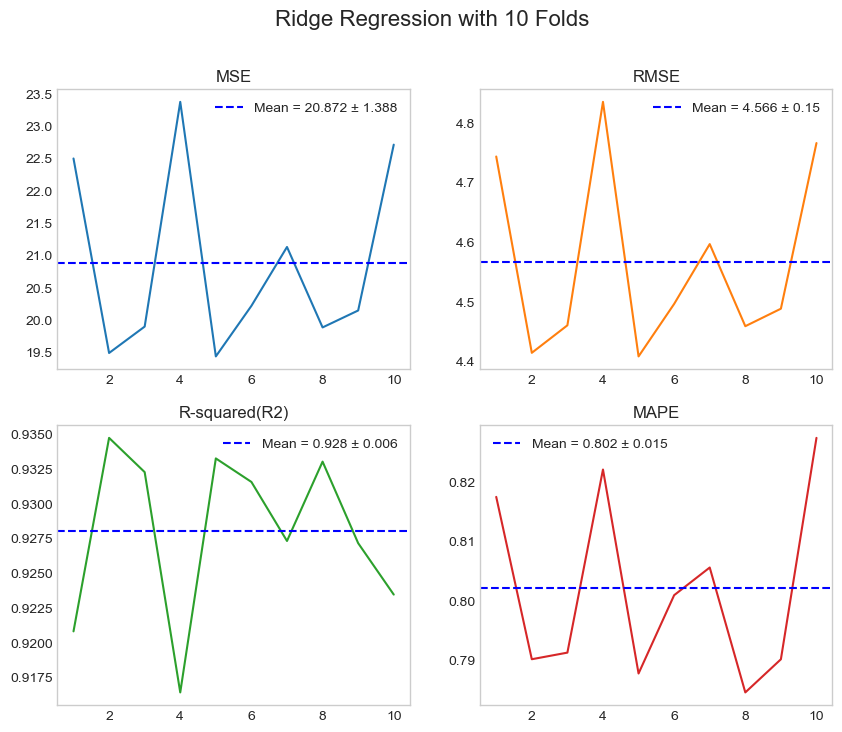

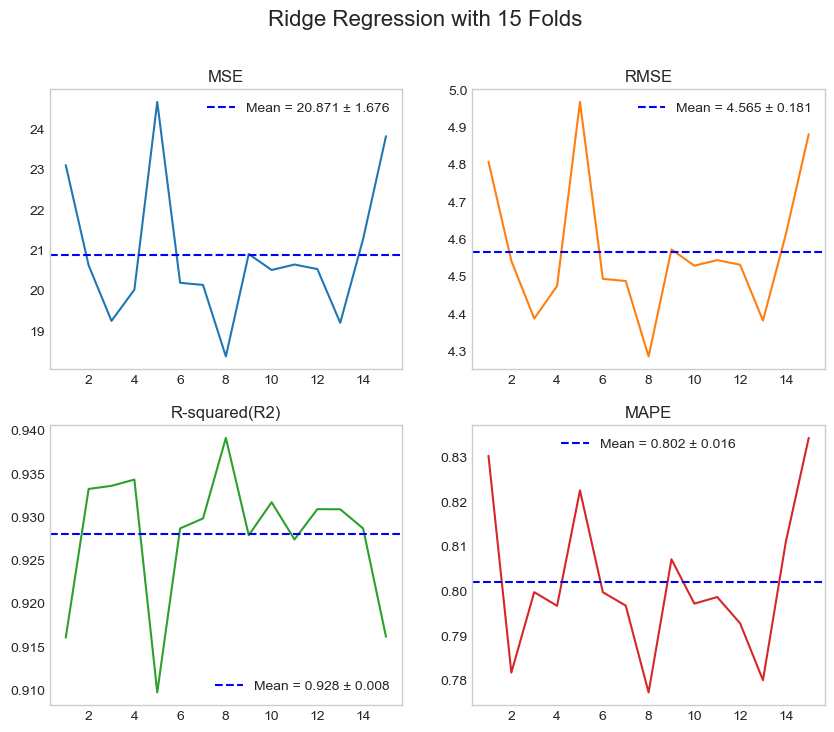

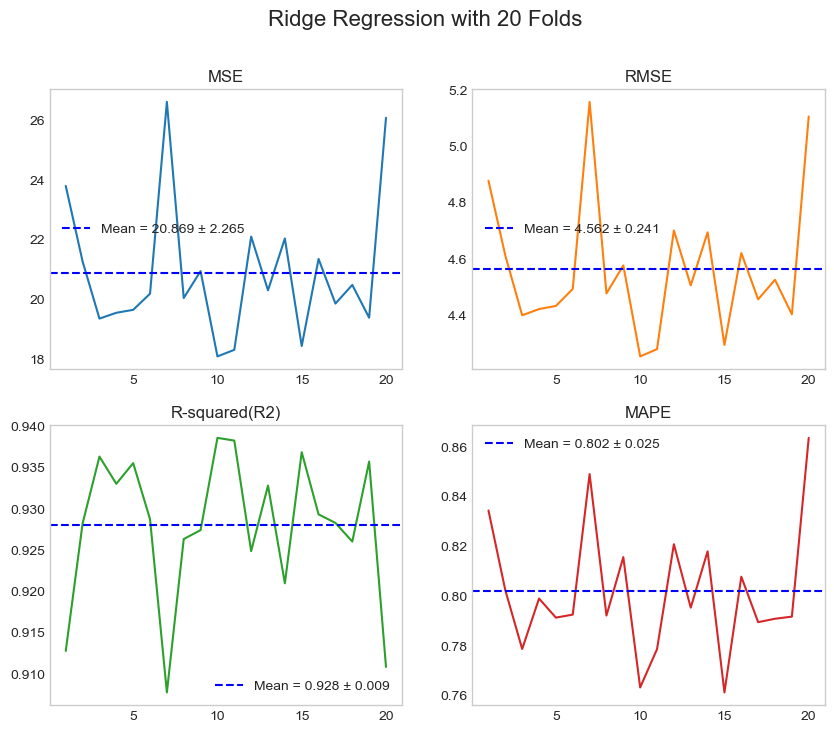

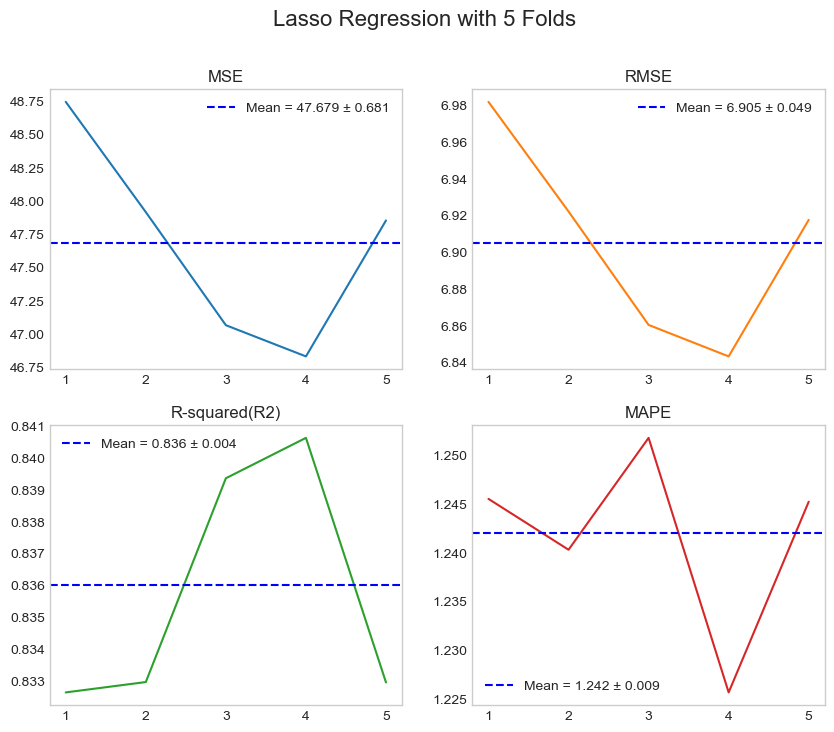

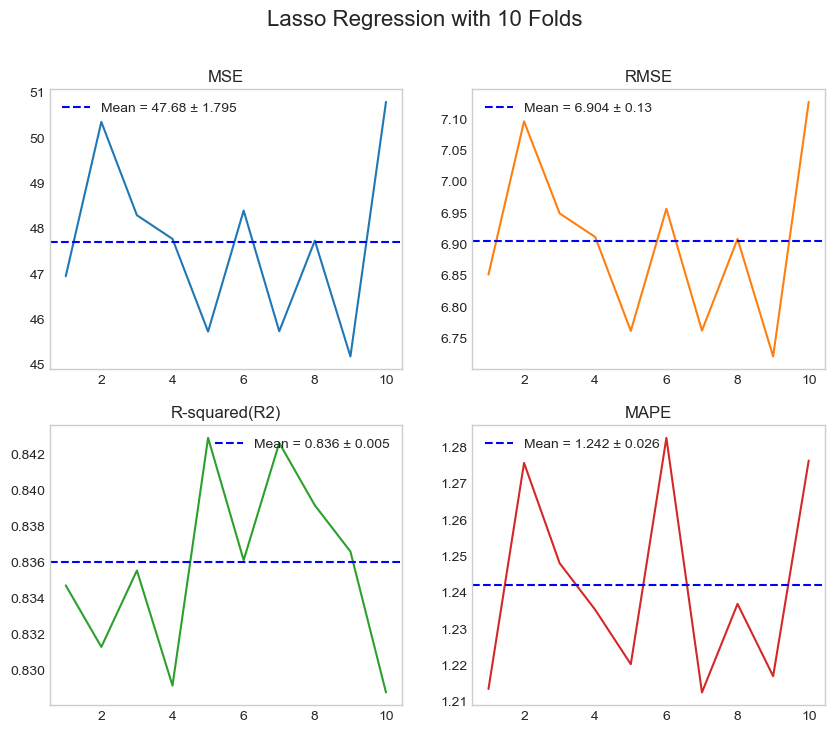

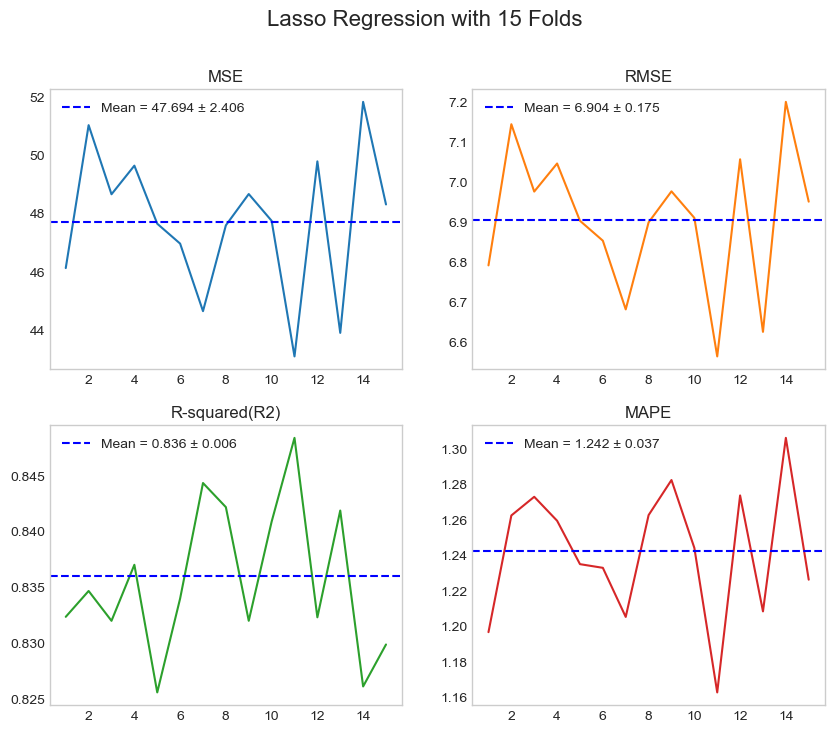

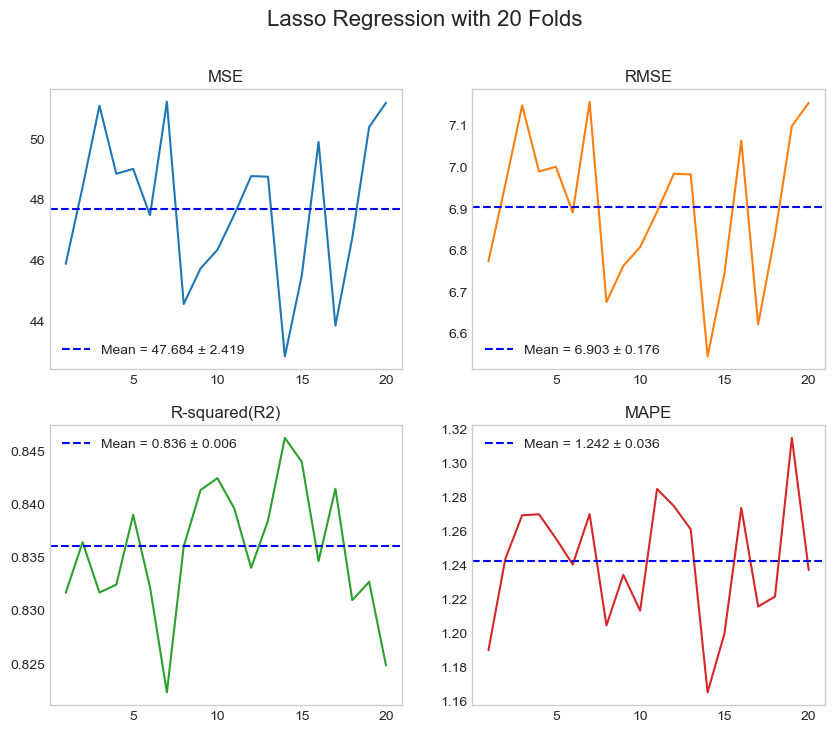

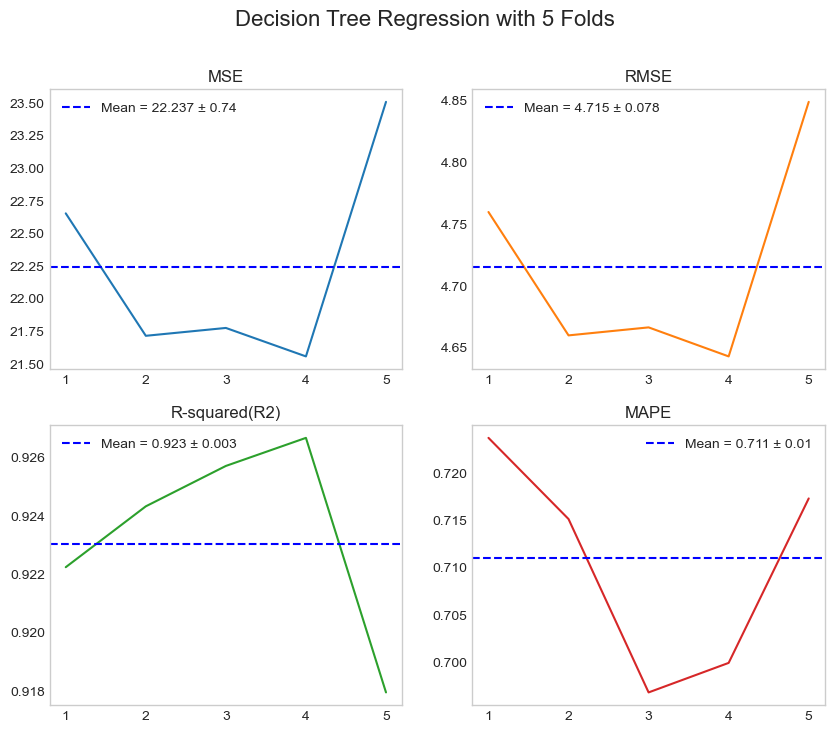

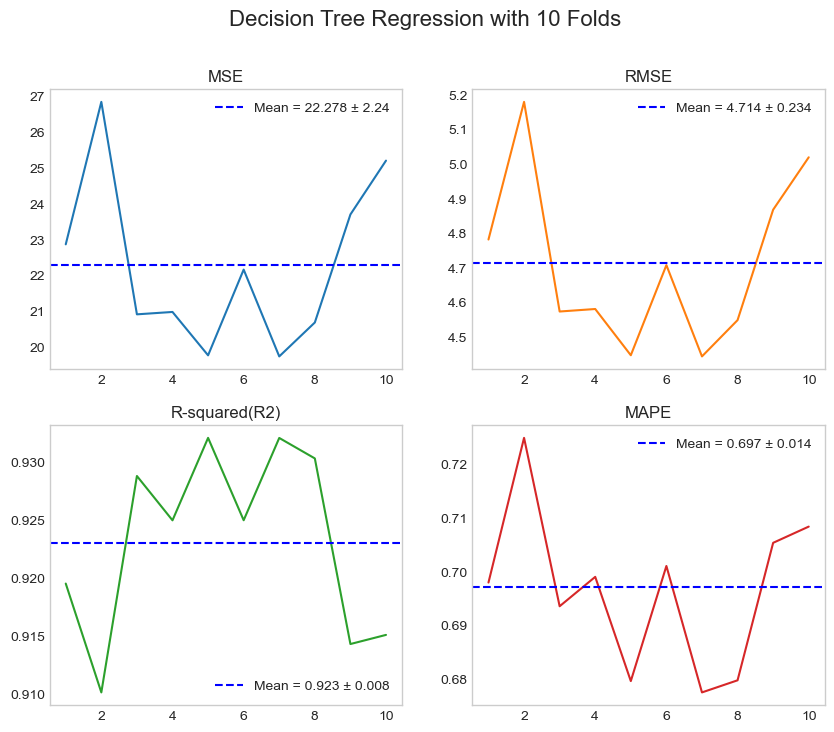

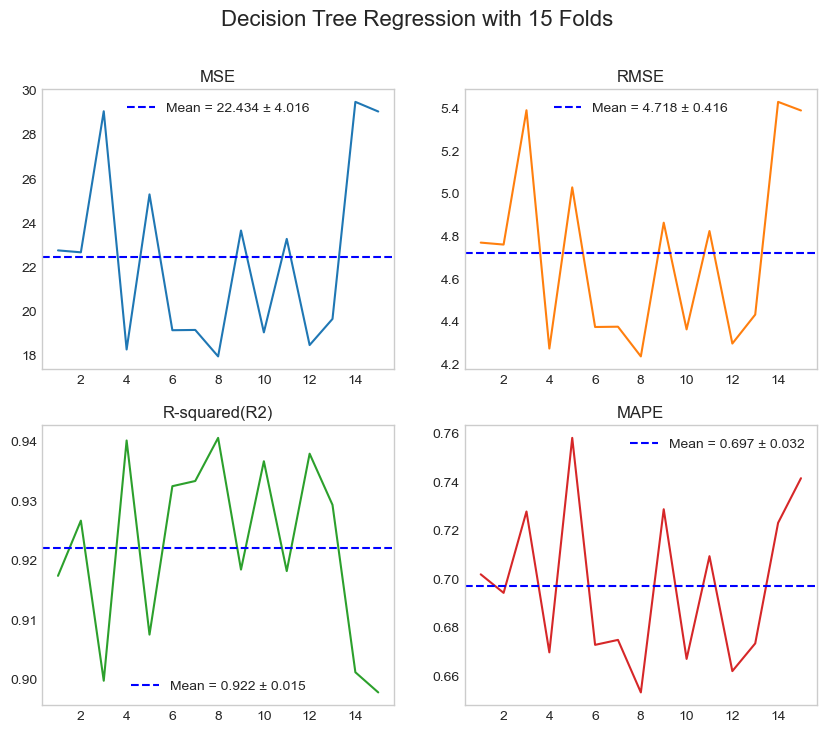

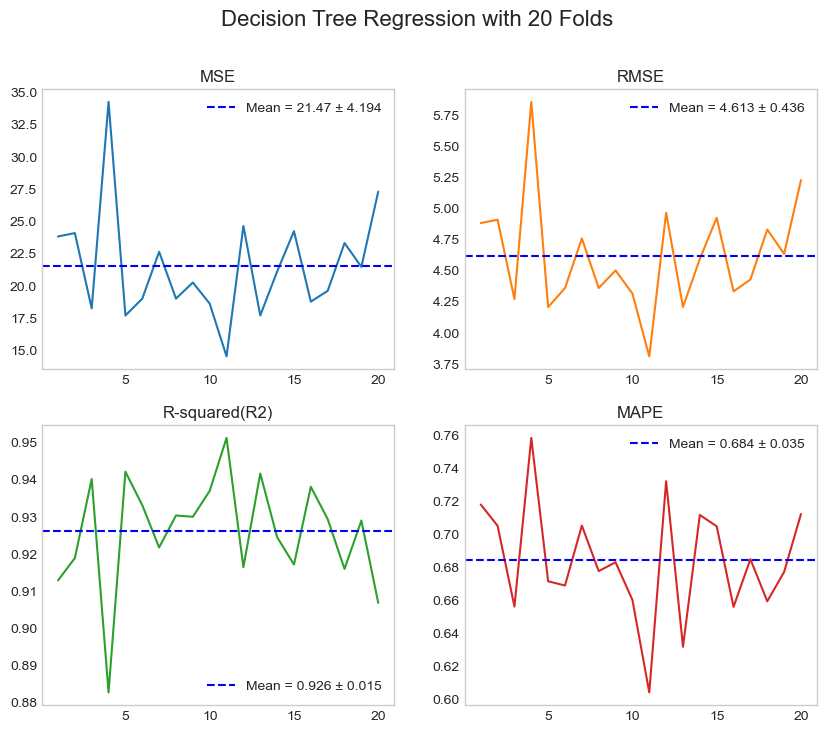

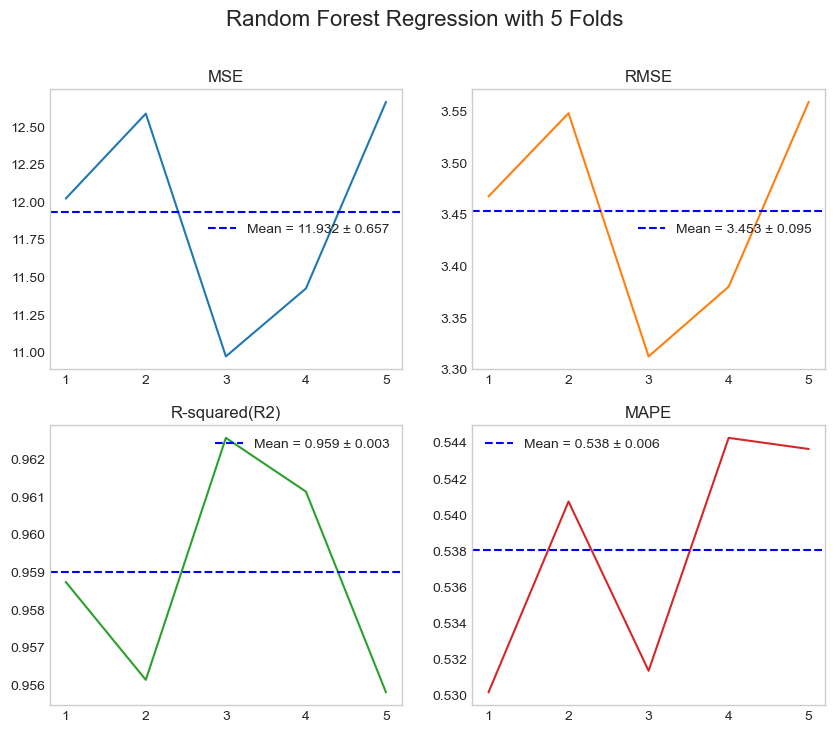

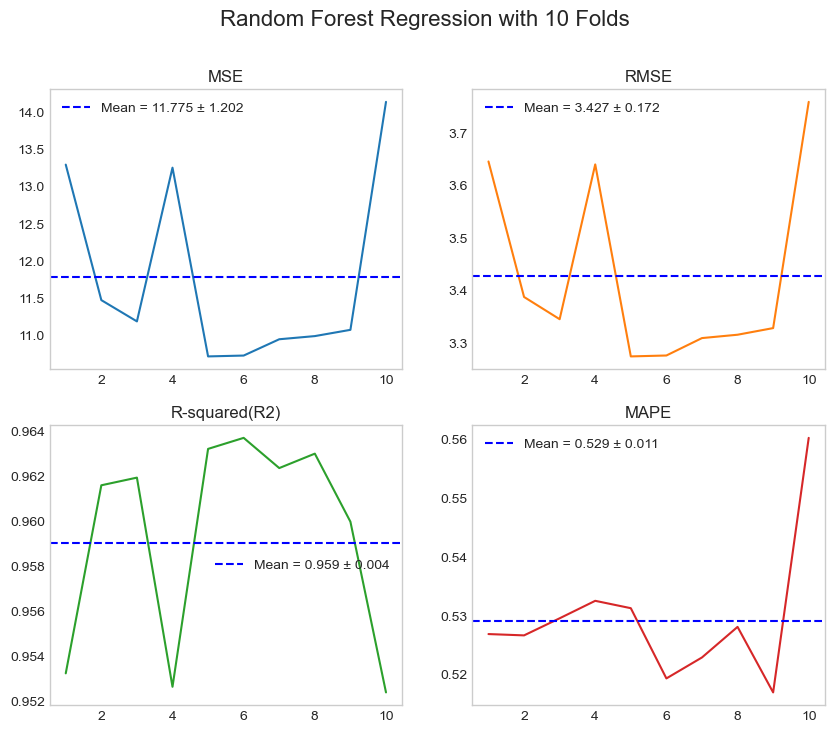

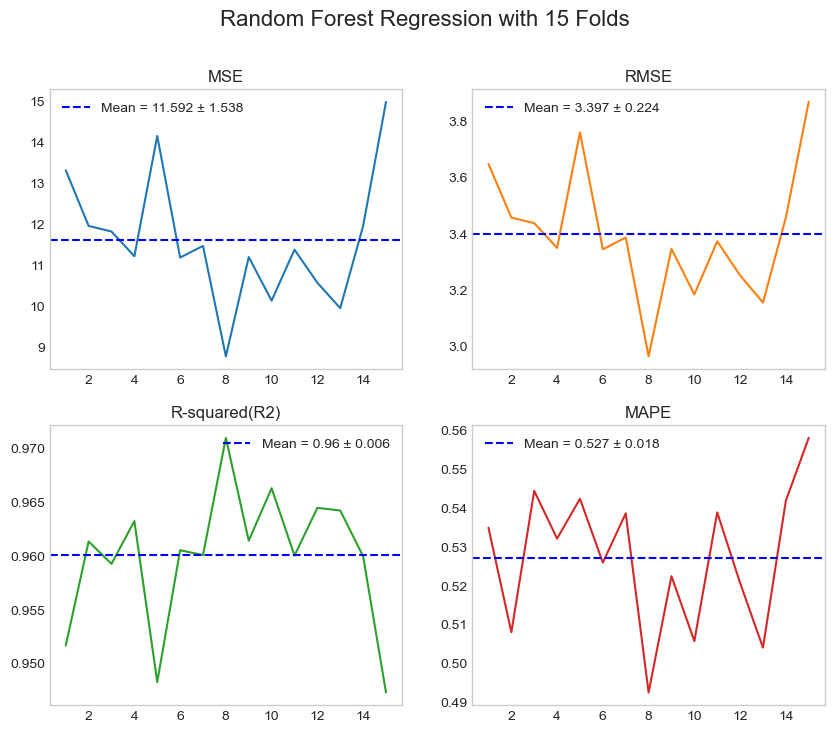

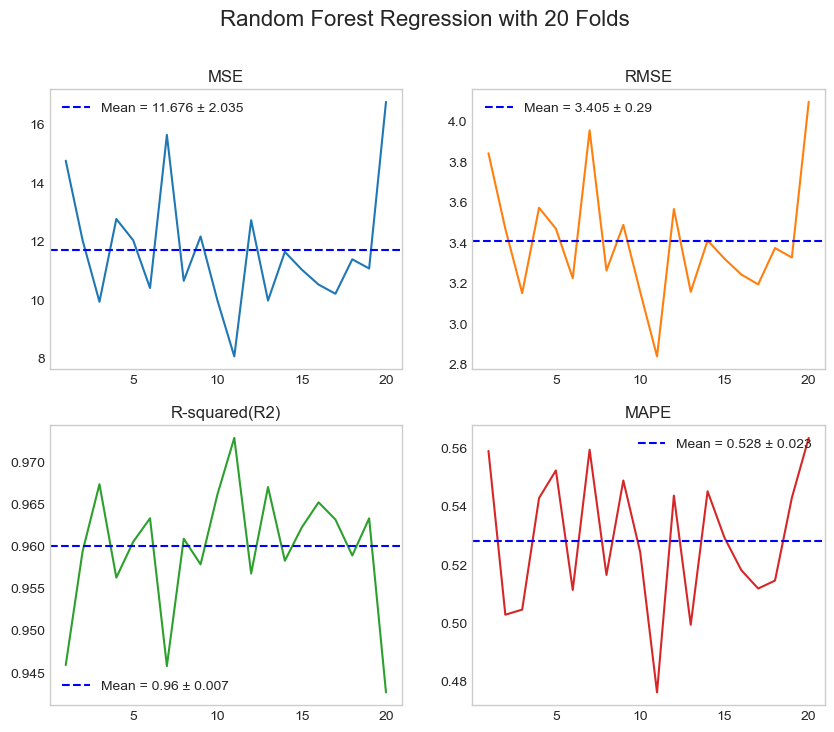

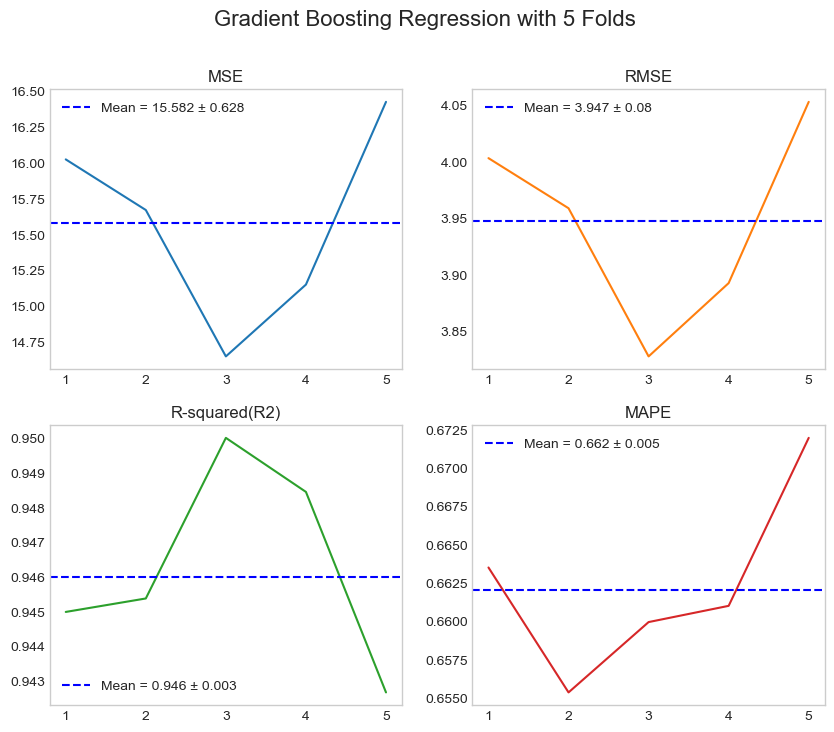

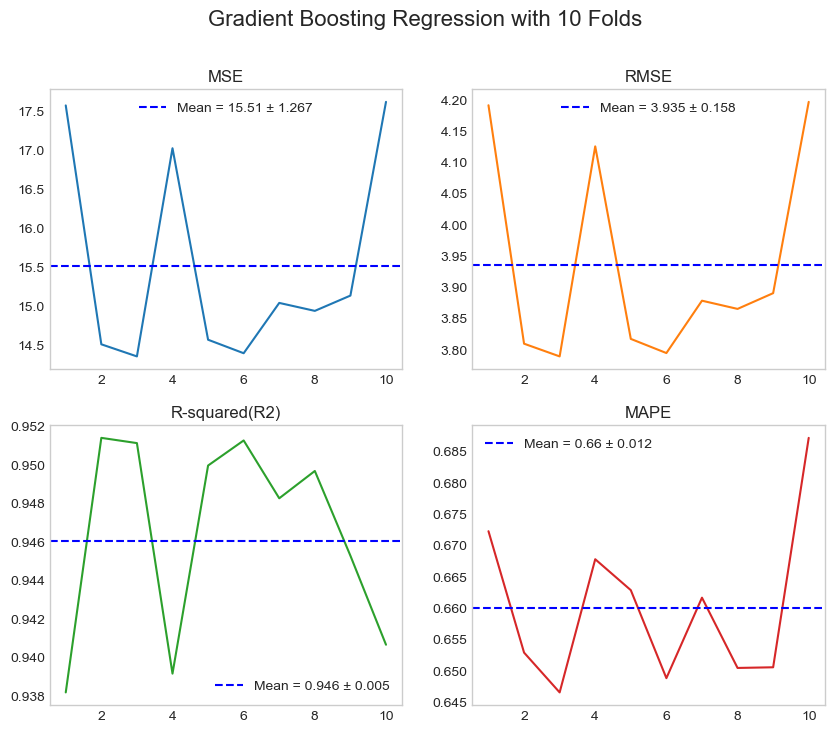

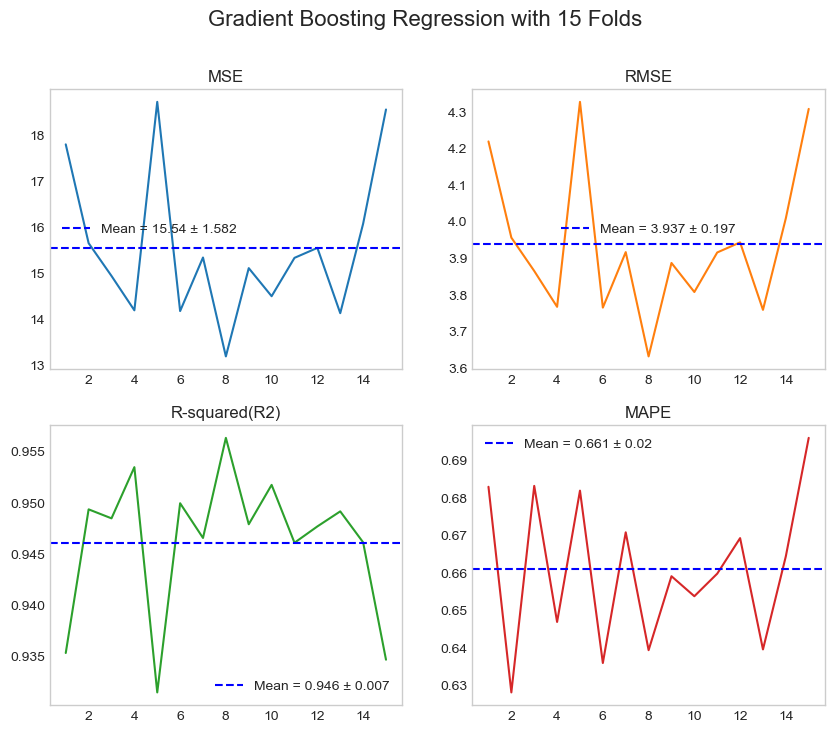

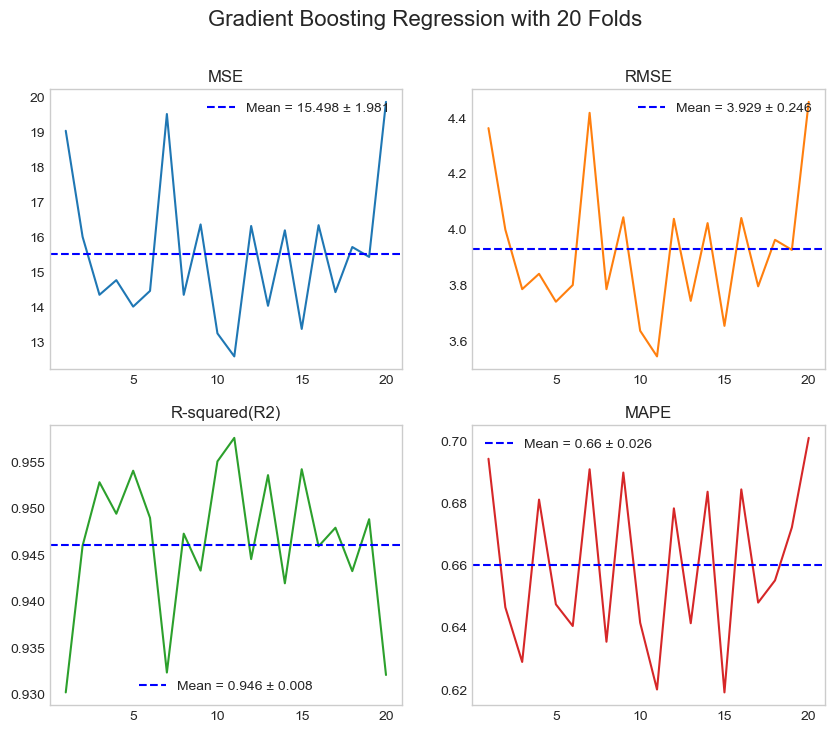

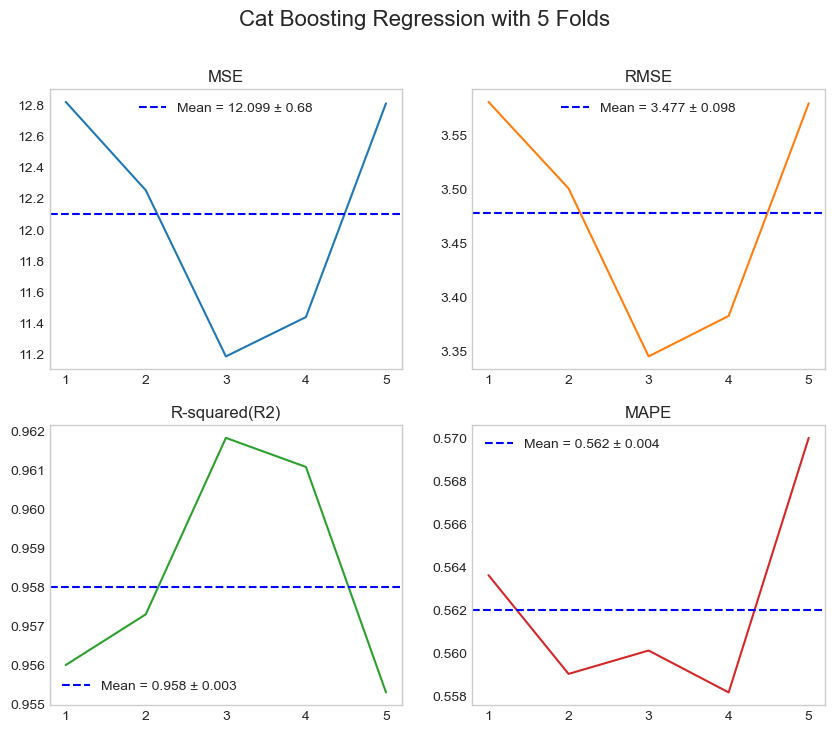

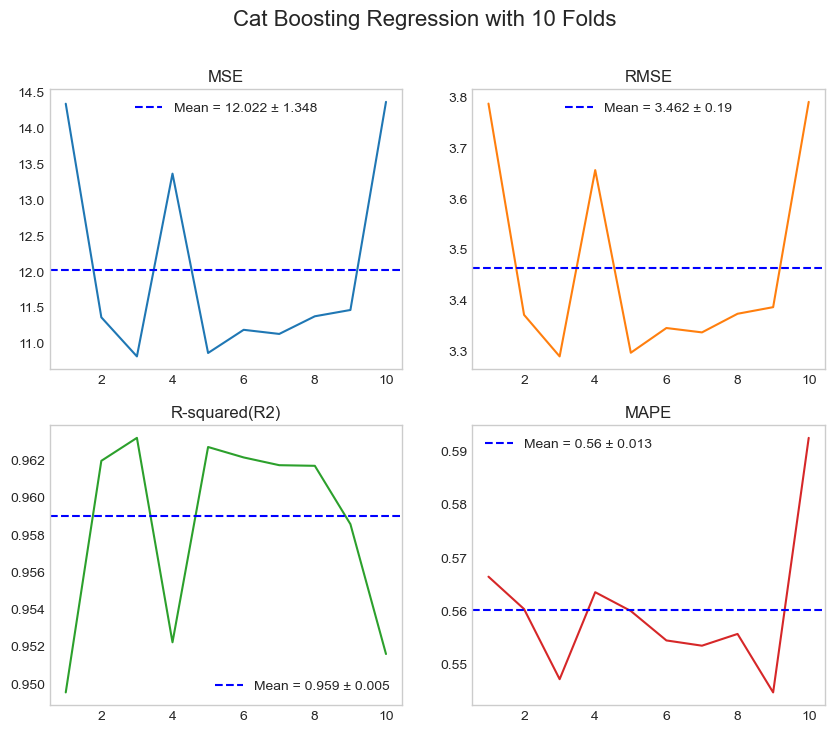

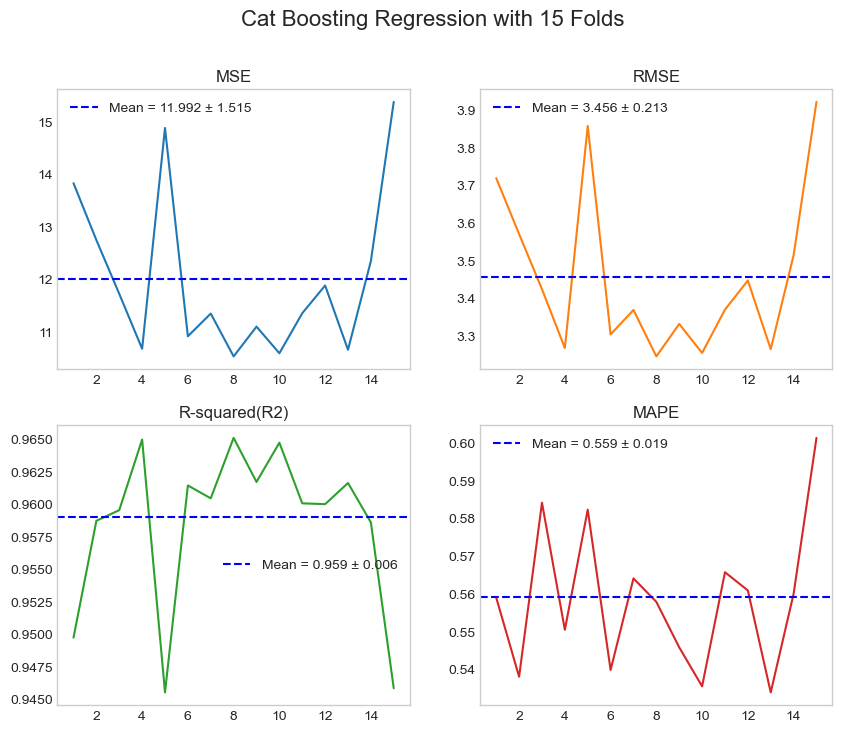

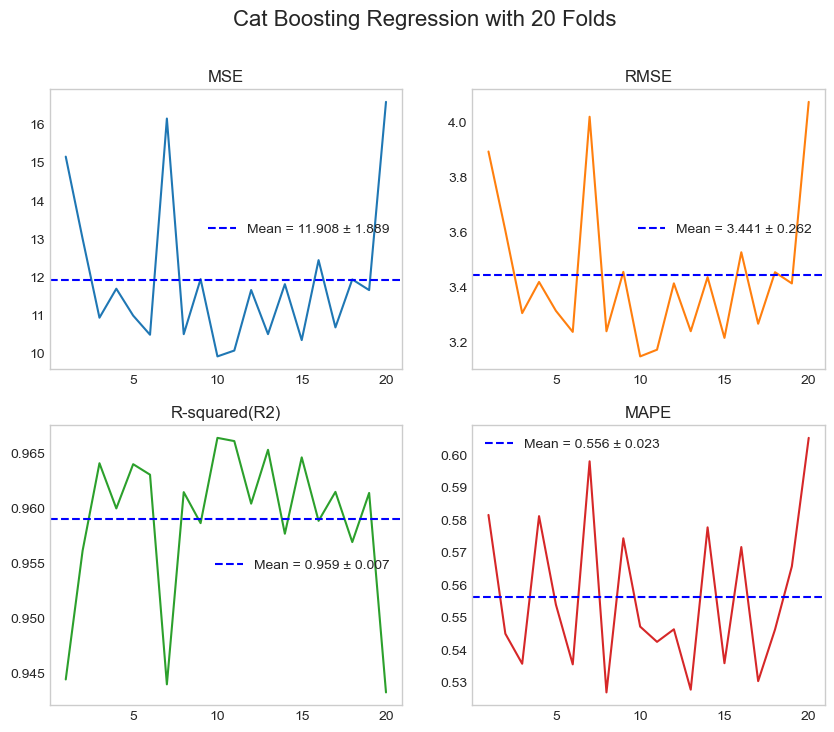

In [126]:
for i,j in Evaluation_df1.iterrows():
    x=range(1,j['n_splits']+1)
    y1 = j['MSE']
    y2 = j['RMSE']
    y3 = j['R-squared(R2)']
    y4 = j['MAPE']
    # Create a figure and subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    # Plot data on each subplot
    axs[0, 0].plot(x, y1)
    axs[0, 0].set_title('MSE')
    label='Mean = '+str(np.round(np.mean(y1),3))+" ± "+str(np.round(np.std(y1),3))
    axs[0, 0].axhline(y=np.round(np.mean(y1),3), color='b', linestyle='--', label=label)
    axs[0, 0].legend()
    axs[0, 0].grid(False)
    
    axs[0, 1].plot(x, y2, 'tab:orange')
    axs[0, 1].set_title('RMSE')
    label='Mean = '+str(np.round(np.mean(y2),3))+" ± "+str(np.round(np.std(y2),3))
    axs[0, 1].axhline(y=np.round(np.mean(y2),3), color='b', linestyle='--', label=label)
    axs[0, 1].legend()
    axs[0, 1].grid(False)
    
    
    axs[1, 0].plot(x, y3, 'tab:green')
    axs[1, 0].set_title('R-squared(R2)')
    label='Mean = '+str(np.round(np.mean(y3),3))+" ± "+str(np.round(np.std(y3),3))
    axs[1, 0].axhline(y=np.round(np.mean(y3),3), color='b', linestyle='--', label=label)
    axs[1, 0].legend()
    axs[1, 0].grid(False)
    
    axs[1, 1].plot(x, y4, 'tab:red')
    axs[1, 1].set_title('MAPE')
    label='Mean = '+str(np.round(np.mean(y4),3))+" ± "+str(np.round(np.std(y4),3))
    axs[1, 1].axhline(y=np.round(np.mean(y4),3), color='b', linestyle='--', label=label)
    axs[1, 1].legend()
    axs[1, 1].grid(False)

    # Adjust layout
    #plt.tight_layout()
    title=j["Model"]+" with "+str(j['n_splits'])+" Folds"
    fig.suptitle(title, fontsize=16)
    #plt.title(j['Model'])
    # Show the plot
    plt.show()

In [127]:
Evaluation_df2=Evaluation_df1.copy()
# Mean values
Evaluation_df2["MSE_mean"] = Evaluation_df2["MSE"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["RMSE_mean"] = Evaluation_df2["RMSE"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["R-squared(R2)_mean"] = Evaluation_df2["R-squared(R2)"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["Adjusted R-squared (R2)_mean"] = Evaluation_df2["Adjusted R-squared (R2)"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["MAPE_mean"] = Evaluation_df2["MAPE"].apply(lambda x: sum(x) / len(x))

# standard deviation values
Evaluation_df2["MSE_sd"] = Evaluation_df2["MSE"].apply(lambda x: np.std(x))
Evaluation_df2["RMSE_sd"] = Evaluation_df2["RMSE"].apply(lambda x: np.std(x))
Evaluation_df2["R-squared(R2)_sd"] = Evaluation_df2["R-squared(R2)"].apply(lambda x: np.std(x))
Evaluation_df2["Adjusted R-squared (R2)_sd"] = Evaluation_df2["Adjusted R-squared (R2)"].apply(lambda x: np.std(x))
Evaluation_df2["MAPE_sd"] = Evaluation_df2["MAPE"].apply(lambda x: np.std(x))

Evaluation_df2["Model_splits"] = Evaluation_df2["Model"] + " (" + Evaluation_df2["n_splits"].astype(str) + " splits)"
Evaluation_df2=Evaluation_df2.drop(['MSE', 'RMSE', 'R-squared(R2)','Adjusted R-squared (R2)', 'MAPE'],axis=1)

In [128]:
Evaluation_df2=Evaluation_df2.sort_values(by=['RMSE_mean','MAPE_mean']).reset_index(drop=True)

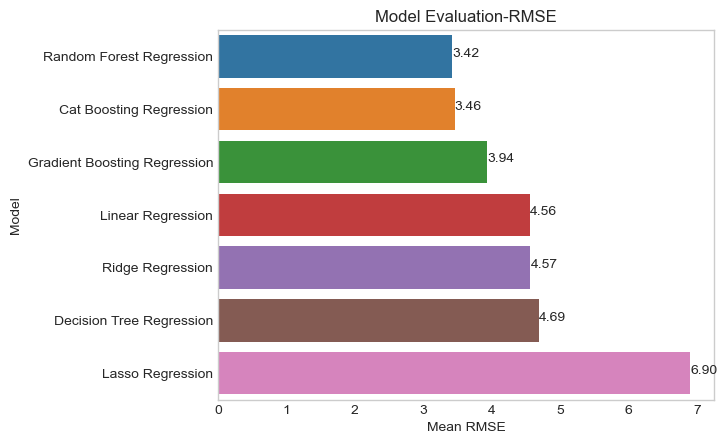

In [129]:
ax=sns.barplot(y="Model",x="RMSE_mean",
               data=Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="RMSE_mean"))
for j,v in enumerate(Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="RMSE_mean")['RMSE_mean'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Mean RMSE")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-RMSE")
plt.show()

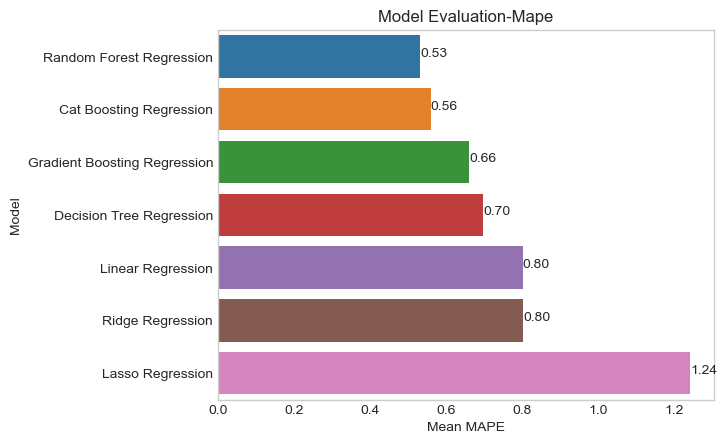

In [130]:
ax=sns.barplot(y="Model",x="MAPE_mean",
               data=Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="MAPE_mean"))
for j,v in enumerate(Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="MAPE_mean")['MAPE_mean'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Mean MAPE")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-Mape")
plt.show()

## Considering the Strongly related Features

In [131]:
strong_df=Norm_data1[['temperature', 'exhaust_vacuum','energy_production']]

In [132]:
strong_df

temperature  exhaust_vacuum  energy_production
0            0.22            0.23             481.30
1            0.29            0.30             465.36
2            0.34            0.35             465.48
3            0.34            0.51             467.05
4            0.38            0.43             463.58
...           ...             ...                ...
9522         0.43            0.43             457.32
9523         0.65            0.71             446.92
9524         0.81            0.55             429.34
9525         0.60            0.72             421.57
9526         0.45            0.43             454.41

[9527 rows x 3 columns]

In [133]:
Evaluation_df1=pd.DataFrame(columns=['Model', 'n_splits','MSE', 'RMSE', 'R-squared(R2)', 'Adjusted R-squared (R2)', 'MAPE'])

In [134]:
X = strong_df.drop('energy_production', axis=1).values
y = strong_df['energy_production']

In [135]:
from sklearn.metrics import mean_absolute_percentage_error
values_dict={}
for model_name,reg_model in models:
    for i in n_splits:
        kf = KFold(n_splits=i, shuffle=True, random_state=42)
        mse_scores=[]
        rmse_scores=[]
        r2_scores =[]
        Adj_r2_scores =[]
        mape_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            # Fit the model on the training data
            reg_model.fit(X_train, y_train)
            # Make predictions on the validation data
            y_pred = reg_model.predict(X_val)
            # Calculate the metrics for this fold
            mse=mean_squared_error(y_val, y_pred)
            mse_scores.append(mean_squared_error(y_val, y_pred))
            rmse_scores.append(np.sqrt(mse))
            r2=r2_score(y_val, y_pred)
            r2_scores.append(r2_score(y_val, y_pred))
            Adj_r2_scores.append((1-(1-r2)*(y_val.shape[0]-1)/(y_val.shape[0]-X_val.shape[1]-1)))
            mape_scores.append(mean_absolute_percentage_error(y_val, y_pred)*100)
        values_dict={'Model':model_name, 'n_splits':i,'MSE':mse_scores, 'RMSE':rmse_scores, 'R-squared(R2)':r2_scores,'Adjusted R-squared (R2)':Adj_r2_scores, 'MAPE':mape_scores}
        Evaluation_df1=Evaluation_df1.append(values_dict,ignore_index=True)
Evaluation_df1

Model n_splits  \
0              Linear Regression        5   
1              Linear Regression       10   
2              Linear Regression       15   
3              Linear Regression       20   
4               Ridge Regression        5   
5               Ridge Regression       10   
6               Ridge Regression       15   
7               Ridge Regression       20   
8               Lasso Regression        5   
9               Lasso Regression       10   
10              Lasso Regression       15   
11              Lasso Regression       20   
12      Decision Tree Regression        5   
13      Decision Tree Regression       10   
14      Decision Tree Regression       15   
15      Decision Tree Regression       20   
16      Random Forest Regression        5   
17      Random Forest Regression       10   
18      Random Forest Regression       15   
19      Random Forest Regression       20   
20  Gradient Boosting Regression        5   
21  Gradient Boosting Regression       10   
22  Gradient Boosting Regression       15   
23  Gradient Boosting Regression       20   
24       Cat Boosting Regression        5   
25       Cat Boosting Regression       10   
26       Cat Boosting Regression       15   
27       Cat Boosting Regression       20   

                                                                                                                                                                                                                                                                                                                                                                                                             MSE  \
0                                                                                                                                                                                                                                                                                                             [24.476261346407163, 25.220349890646318, 23.227949065402967, 24.59491887738683, 25.30658629056401]   
1                                                                                                                                                                                                          [25.168291238591546, 23.778406546242255, 24.205993235101882, 26.26722619535757, 22.890695981624436, 23.65606697221684, 24.583329909706265, 24.464402892939248, 23.217066031118506, 27.42901273239586]   
2                                                                                                        [25.652201008481047, 24.303118499550504, 23.431172840653893, 24.329845279666277, 27.467832283456488, 23.90117400644004, 23.34735383210287, 21.412326603121414, 24.926330737894997, 23.611281928376574, 24.51444845396846, 25.671517473327874, 23.059499865367147, 24.29529153860758, 28.65342155204016]   
3          [26.345663985254287, 24.08614131640198, 23.727422329294345, 23.639085418578443, 23.88312527005428, 24.546504628990995, 28.93722419294674, 23.4617316276509, 23.814368744876194, 22.194216075908063, 22.310541975149746, 24.86544803059465, 23.909548265283444, 25.3168586047204, 22.46561684244801, 26.476381937164923, 23.135862869270866, 23.318246657989608, 23.90596474036142, 31.00665972175954]   
4                                                                                                                                                                                                                                                                                                            [24.48035937862537, 25.229171973821813, 23.235272099001488, 24.591008576375163, 25.303899041444446]   
5                                                                                                                                                                                                        [25.165063648660396, 23.787986307657984, 24.238686827000578, 26.247690851955962, 22.889415008416

In [136]:
Evaluation_df2=Evaluation_df1.copy()
# Mean values
Evaluation_df2["MSE_mean"] = Evaluation_df2["MSE"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["RMSE_mean"] = Evaluation_df2["RMSE"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["R-squared(R2)_mean"] = Evaluation_df2["R-squared(R2)"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["Adjusted R-squared (R2)_mean"] = Evaluation_df2["Adjusted R-squared (R2)"].apply(lambda x: sum(x) / len(x))
Evaluation_df2["MAPE_mean"] = Evaluation_df2["MAPE"].apply(lambda x: sum(x) / len(x))

# standard deviation values
Evaluation_df2["MSE_sd"] = Evaluation_df2["MSE"].apply(lambda x: np.std(x))
Evaluation_df2["RMSE_sd"] = Evaluation_df2["RMSE"].apply(lambda x: np.std(x))
Evaluation_df2["R-squared(R2)_sd"] = Evaluation_df2["R-squared(R2)"].apply(lambda x: np.std(x))
Evaluation_df2["Adjusted R-squared (R2)_sd"] = Evaluation_df2["Adjusted R-squared (R2)"].apply(lambda x: np.std(x))
Evaluation_df2["MAPE_sd"] = Evaluation_df2["MAPE"].apply(lambda x: np.std(x))

Evaluation_df2["Model_splits"] = Evaluation_df2["Model"] + " (" + Evaluation_df2["n_splits"].astype(str) + " splits)"
Evaluation_df2=Evaluation_df2.drop(['MSE', 'RMSE', 'R-squared(R2)','Adjusted R-squared (R2)', 'MAPE'],axis=1)

In [137]:
Evaluation_df2=Evaluation_df2.sort_values(by=['RMSE_mean','MAPE_mean']).reset_index(drop=True)

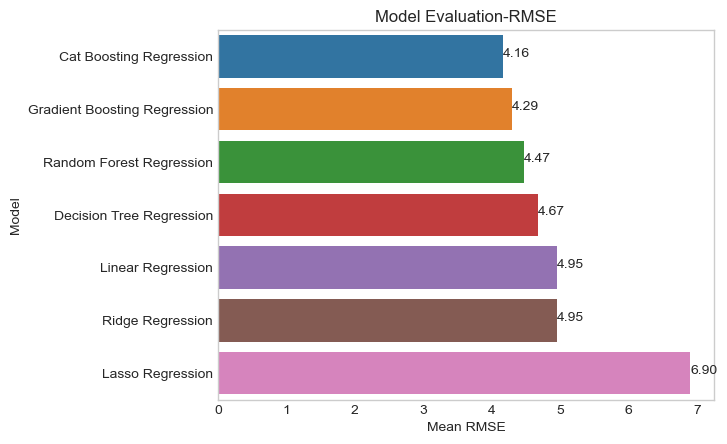

In [138]:
ax=sns.barplot(y="Model",x="RMSE_mean",
               data=Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="RMSE_mean"))
for j,v in enumerate(Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="RMSE_mean")['RMSE_mean'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Mean RMSE")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-RMSE")
plt.show()

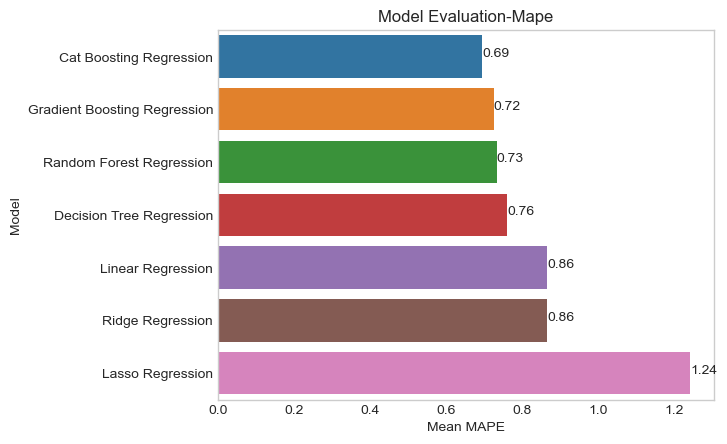

In [139]:
ax=sns.barplot(y="Model",x="MAPE_mean",
               data=Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="MAPE_mean"))
for j,v in enumerate(Evaluation_df2.groupby('Model').aggregate(np.mean).reset_index().sort_values(by="MAPE_mean")['MAPE_mean'].values):
        ax.text(v,j,f"{v:.2f}")
ax.set_xlabel("Mean MAPE")
ax.set_ylabel("Model")
ax.grid(False)
plt.title("Model Evaluation-Mape")
plt.show()

In [140]:
Evaluation_df2

Model n_splits   MSE_mean  RMSE_mean  \
0        Cat Boosting Regression       20  17.304757   4.152196   
1        Cat Boosting Regression       15  17.352668   4.160588   
2        Cat Boosting Regression       10  17.364493   4.163180   
3        Cat Boosting Regression        5  17.443296   4.174277   
4   Gradient Boosting Regression       20  18.382715   4.280695   
5   Gradient Boosting Regression       15  18.413347   4.286274   
6   Gradient Boosting Regression       10  18.457843   4.293153   
7   Gradient Boosting Regression        5  18.498096   4.299650   
8       Random Forest Regression       20  19.777239   4.437130   
9       Random Forest Regression       15  19.971437   4.462758   
10      Random Forest Regression       10  20.093584   4.477508   
11      Random Forest Regression        5  20.280325   4.500950   
12      Decision Tree Regression       20  21.518977   4.629105   
13      Decision Tree Regression       15  21.675602   4.649269   
14      Decision Tree Regression       10  21.913810   4.675983   
15      Decision Tree Regression        5  22.327188   4.722955   
16             Linear Regression       20  24.567331   4.952122   
17              Ridge Regression       20  24.569193   4.952314   
18             Linear Regression       15  24.571788   4.954031   
19              Ridge Regression       15  24.573740   4.954246   
20             Linear Regression       10  24.566049   4.954639   
21              Ridge Regression       10  24.568074   4.954848   
22             Linear Regression        5  24.565213   4.955753   
23              Ridge Regression        5  24.567942   4.956031   
24              Lasso Regression       20  47.683551   6.903089   
25              Lasso Regression       10  47.679878   6.903845   
26              Lasso Regression       15  47.693829   6.903854   
27              Lasso Regression        5  47.679222   6.904839   

    R-squared(R2)_mean  Adjusted R-squared (R2)_mean  MAPE_mean    MSE_sd  \
0             0.940189                      0.939936   0.692220  2.109172   
1             0.939977                      0.939787   0.693213  1.716543   
2             0.940080                      0.939954   0.693722  1.515885   
3             0.939859                      0.939796   0.696083  1.130072   
4             0.936469                      0.936201   0.723433  2.076789   
5             0.936311                      0.936110   0.724227  1.739141   
6             0.936323                      0.936189   0.724964  1.418078   
7             0.936232                      0.936165   0.726715  0.897683   
8             0.931586                      0.931297   0.728238  2.607351   
9             0.930920                      0.930702   0.731254  2.066494   
10            0.930634                      0.930488   0.733740  1.940902   
11            0.930075                      0.930001   0.737741  1.331404   
12            0.925577                      0.925262   0.753803  2.718177   
13            0.925036                      0.924799   0.755684  2.220144   
14            0.924357                      0.924198   0.760382  2.100799   
15            0.923023                      0.922942   0.767727  1.361217   
16            0.915161                      0.914802   0.864504  2.141219   
17            0.915156                      0.914797   0.864803  2.140418   
18            0.915072                      0.914804   0.864573  1.716613   
19            0.915067                      0.914799   0.864880  1.712035   
20            0.915286                      0.915107   0.864485  1.329231   
21            0.915279                      0.915101   0.864797  1.327458   
22            0.915331                      0.915242   0.864526  0.745105   
23            0.915322                      0.915232   0.864888  0.743380   
24            0.835563                      0.834869   1.241667  2.418865   
25            0.835677                      0.835331   1.241637  1.794623   
26  

In [141]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  1. Linear Regression

In [142]:
#Model 1: Linear Regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_preds = linear_model.predict(X_test)

In [143]:
from sklearn.metrics import r2_score

In [144]:
#Evaluating the models
def evaluate_model(model_name, y_true, y_pred,p):
    model_metrics={}
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    Adj_r2 = 1-(1-r2)*(y_true.shape[0]-1)/(y_true.shape[0]-p-1)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Adjusted R-squared (R2): {Adj_r2:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")
    model_metrics={"Model": model_name,
                   "Mean Squared Error (MSE)": np.round(mse,2),
                   "Root Mean Squared Error (RMSE)": np.round(rmse,2),
                  "R-squared (R2)": np.round(r2,2),
                   "Adjusted R-squared (R2)": np.round(Adj_r2,2),
                   "Mean Absolute Percentage Error (MAPE)": np.round(mape,2),
                  }
    style.use('seaborn-whitegrid')
    plt.figure(figsize = (20,10))
    sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
    sns.distplot(y_true, hist = False, color = 'b', label = 'Actual Values')
    plt.title('Actual vs Predicted Values', fontsize = 16)
    plt.xlabel('Values', fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    plt.legend(loc = 'upper left', fontsize = 13)
    plt.show()
    return model_metrics

## Creating a DataFrame named Evaluation_DF to store the test result of each model

In [145]:
Evaluation_df=pd.DataFrame(columns=['Model', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)', 'Adjusted R-squared (R2)', 'Mean Absolute Percentage Error (MAPE)'])

Model: Linear Regression
Mean Squared Error (MSE): 24.48
Root Mean Squared Error (RMSE): 4.95
R-squared (R2): 0.92
Adjusted R-squared (R2): 0.92
Mean Absolute Percentage Error (MAPE): 0.86%



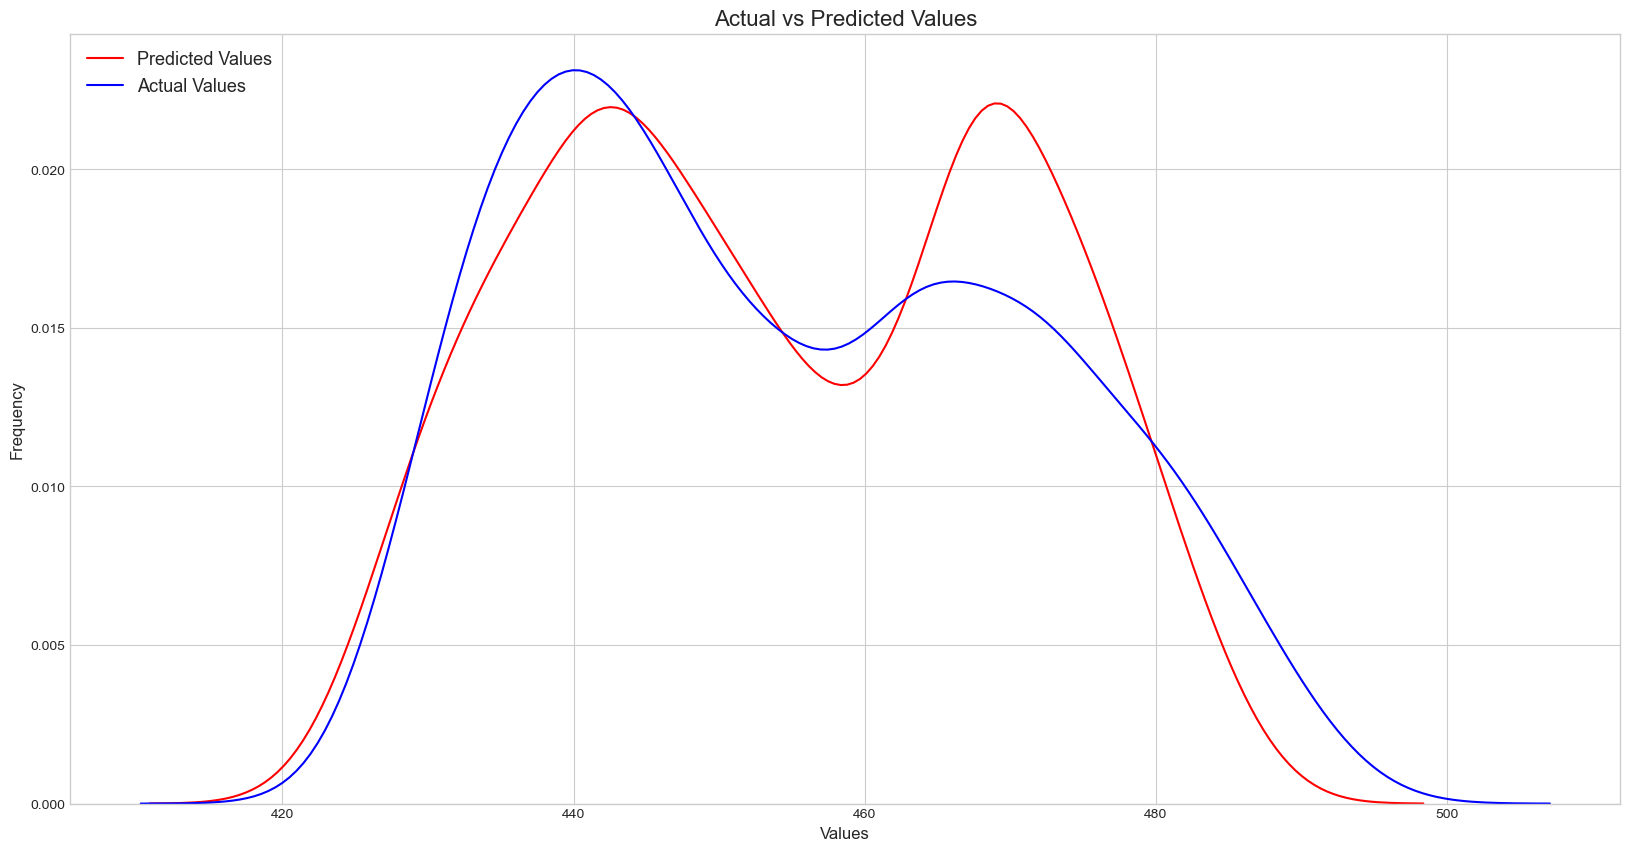

In [146]:
#Evaluating the model
results=evaluate_model("Linear Regression", Y_test, linear_preds,X_test.shape[1])

In [147]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df

Model  Mean Squared Error (MSE)  \
0  Linear Regression                     24.48   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            4.95            0.92                     0.92   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.86

In [148]:
X_test.shape[1]

2

# 2. Random Forest with Hyperparameter Tuning using Random Search

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
# Defining hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

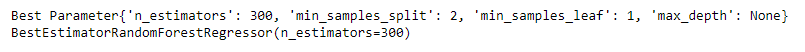

In [151]:
#Model 2: Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_split=2,min_samples_leaf=1,max_depth=None)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

Model: Random Forest Regressor
Mean Squared Error (MSE): 20.91
Root Mean Squared Error (RMSE): 4.57
R-squared (R2): 0.93
Adjusted R-squared (R2): 0.93
Mean Absolute Percentage Error (MAPE): 0.74%



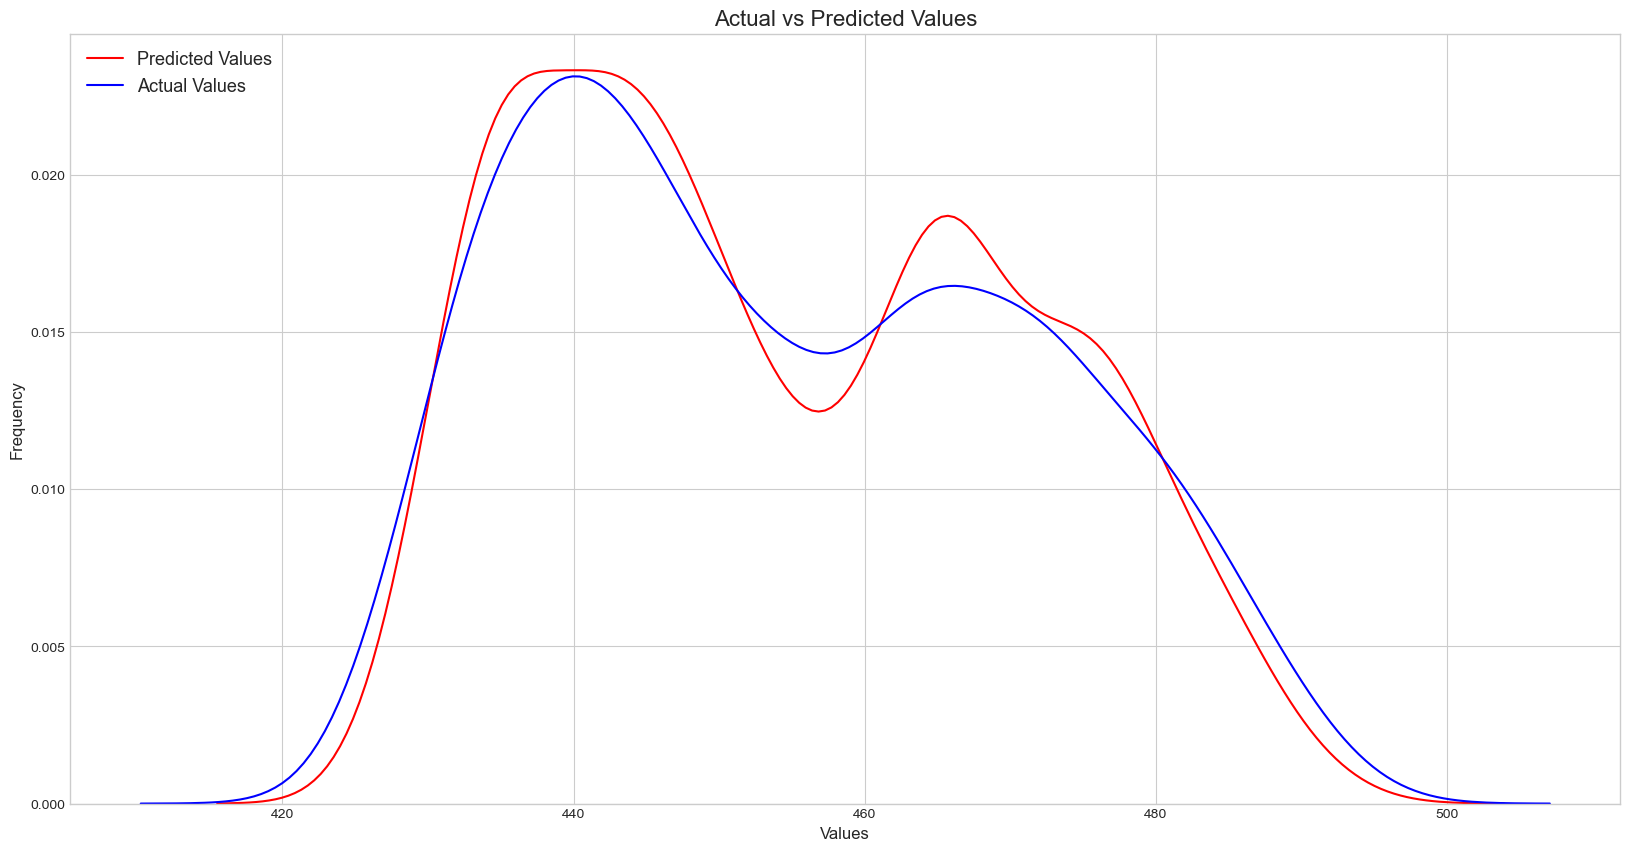

In [152]:
#Evaluating the model
results=evaluate_model("Random Forest Regressor", Y_test, rf_preds,X_test.shape[1])

In [153]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df

Model  Mean Squared Error (MSE)  \
0        Linear Regression                     24.48   
1  Random Forest Regressor                     20.91   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            4.95            0.92                     0.92   
1                            4.57            0.93                     0.93   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.86  
1                                   0.74

# 3. Gradient Boosting Regressor

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_preds = gb_model.predict(X_test)

Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 18.95
Root Mean Squared Error (RMSE): 4.35
R-squared (R2): 0.93
Adjusted R-squared (R2): 0.93
Mean Absolute Percentage Error (MAPE): 0.73%



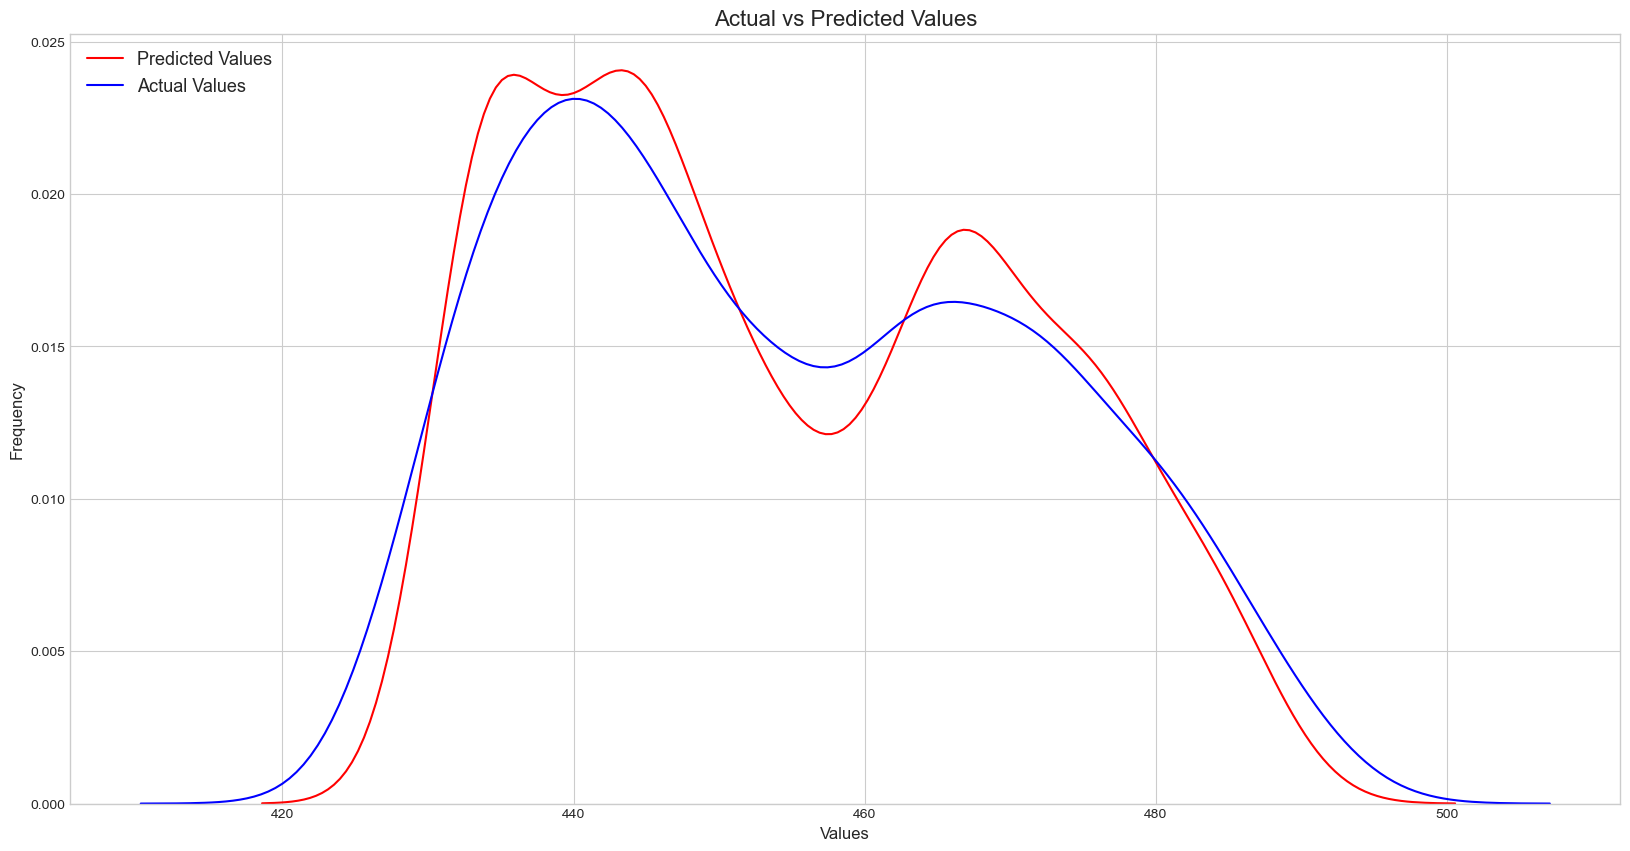

In [155]:
#Evaluating the model
results=evaluate_model("Gradient Boosting Regressor", Y_test, gb_preds,X_test.shape[1])

In [156]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df

Model  Mean Squared Error (MSE)  \
0            Linear Regression                     24.48   
1      Random Forest Regressor                     20.91   
2  Gradient Boosting Regressor                     18.95   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            4.95            0.92                     0.92   
1                            4.57            0.93                     0.93   
2                            4.35            0.93                     0.93   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.86  
1                                   0.74  
2                                   0.73

# 4. Cat Boost Regressor

In [157]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, Y_train)
cb_preds = cb_model.predict(X_test)

Model: Cat Boost Regressor
Mean Squared Error (MSE): 18.06
Root Mean Squared Error (RMSE): 4.25
R-squared (R2): 0.94
Adjusted R-squared (R2): 0.94
Mean Absolute Percentage Error (MAPE): 0.70%



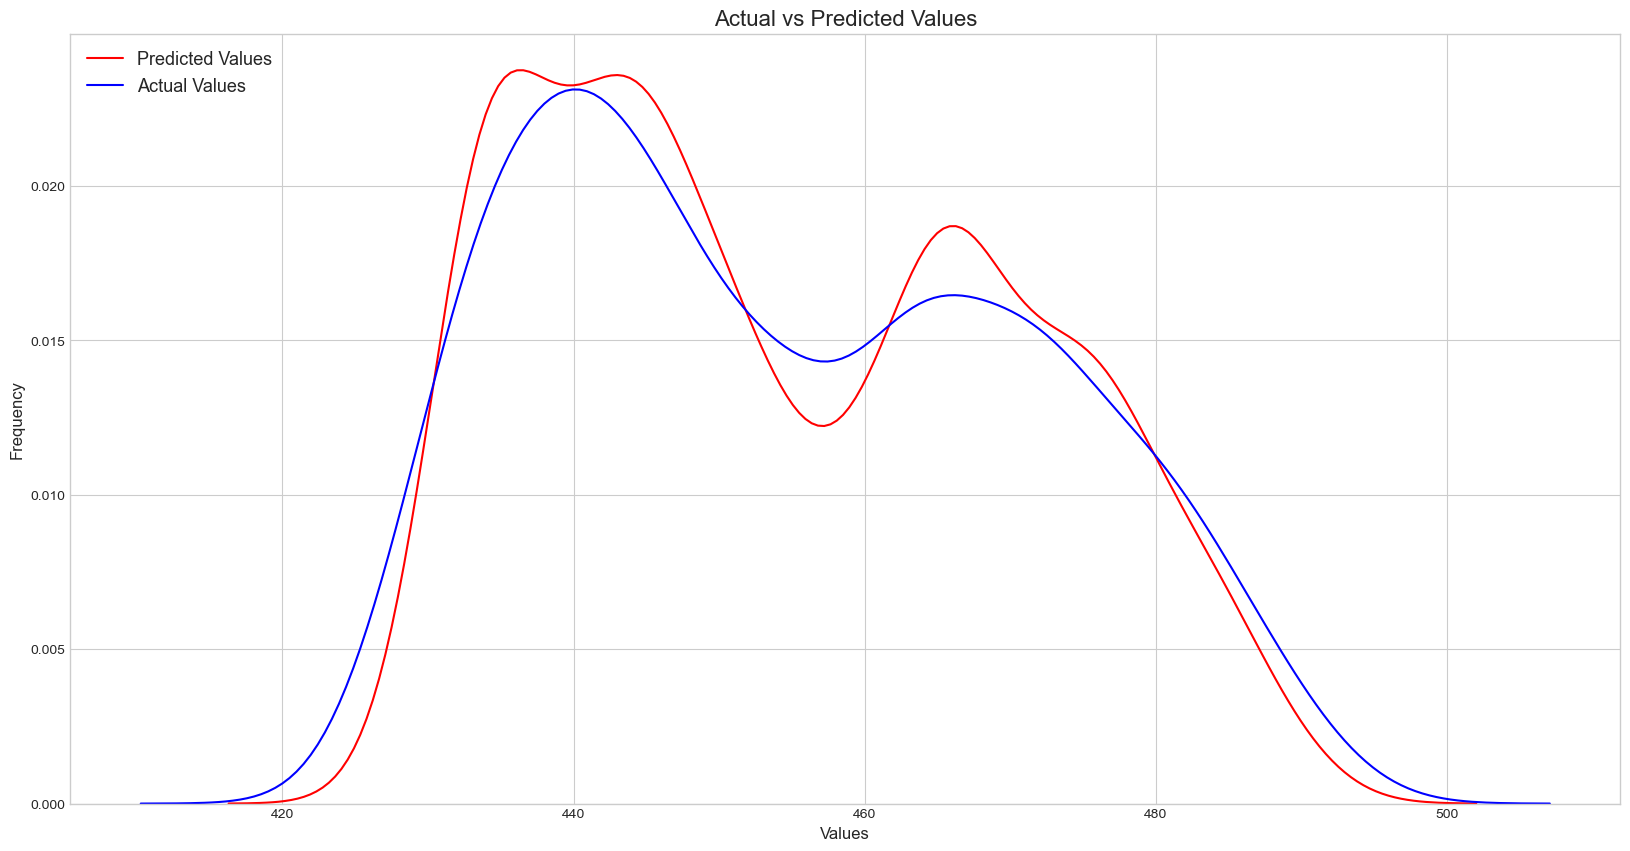

In [158]:
#Evaluating the model
results=evaluate_model("Cat Boost Regressor", Y_test, cb_preds,X_test.shape[1])

In [159]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df

Model  Mean Squared Error (MSE)  \
0            Linear Regression                     24.48   
1      Random Forest Regressor                     20.91   
2  Gradient Boosting Regressor                     18.95   
3          Cat Boost Regressor                     18.06   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            4.95            0.92                     0.92   
1                            4.57            0.93                     0.93   
2                            4.35            0.93                     0.93   
3                            4.25            0.94                     0.94   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.86  
1                                   0.74  
2                                   0.73  
3                                   0.70

## Neural Networks (using TensorFlow)

In [160]:
import tensorflow as tf

In [161]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_test.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [162]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [163]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
477/477 [==============================] - 1s 747us/step - loss: 204649.8750
Epoch 2/100
477/477 [==============================] - 0s 735us/step - loss: 192036.3438
Epoch 3/100
477/477 [==============================] - 0s 760us/step - loss: 169684.0469
Epoch 4/100
477/477 [==============================] - 0s 745us/step - loss: 142213.8125
Epoch 5/100
477/477 [==============================] - 0s 786us/step - loss: 113119.3828
Epoch 6/100
477/477 [==============================] - 0s 755us/step - loss: 85267.1562
Epoch 7/100
477/477 [==============================] - 0s 772us/step - loss: 60836.3008
Epoch 8/100
477/477 [==============================] - 0s 753us/step - loss: 41280.4844
Epoch 9/100
477/477 [==============================] - 0s 753us/step - loss: 27194.3965
Epoch 10/100
477/477 [==============================] - 0s 755us/step - loss: 18333.7148
Epoch 11/100
477/477 [==============================] - 0s 758us/step - loss: 13642.1641
Epoch 12/100
477/477 [===

477/477 [==============================] - 0s 784us/step - loss: 24.7473
Epoch 97/100
477/477 [==============================] - 0s 722us/step - loss: 24.7373
Epoch 98/100
477/477 [==============================] - 0s 716us/step - loss: 24.7253
Epoch 99/100
477/477 [==============================] - 0s 721us/step - loss: 24.7349
Epoch 100/100
477/477 [==============================] - 0s 725us/step - loss: 24.7401


In [164]:
nn_preds = model.predict(X_test)

60/60 [==============================] - 0s 678us/step


In [165]:
nn_preds[:,0]

array([436.81952, 448.04956, 453.34695, ..., 480.38013, 440.62222,
       448.0603 ], dtype=float32)

Model: Neural Networks
Mean Squared Error (MSE): 24.48
Root Mean Squared Error (RMSE): 4.95
R-squared (R2): 0.92
Adjusted R-squared (R2): 0.92
Mean Absolute Percentage Error (MAPE): 0.86%



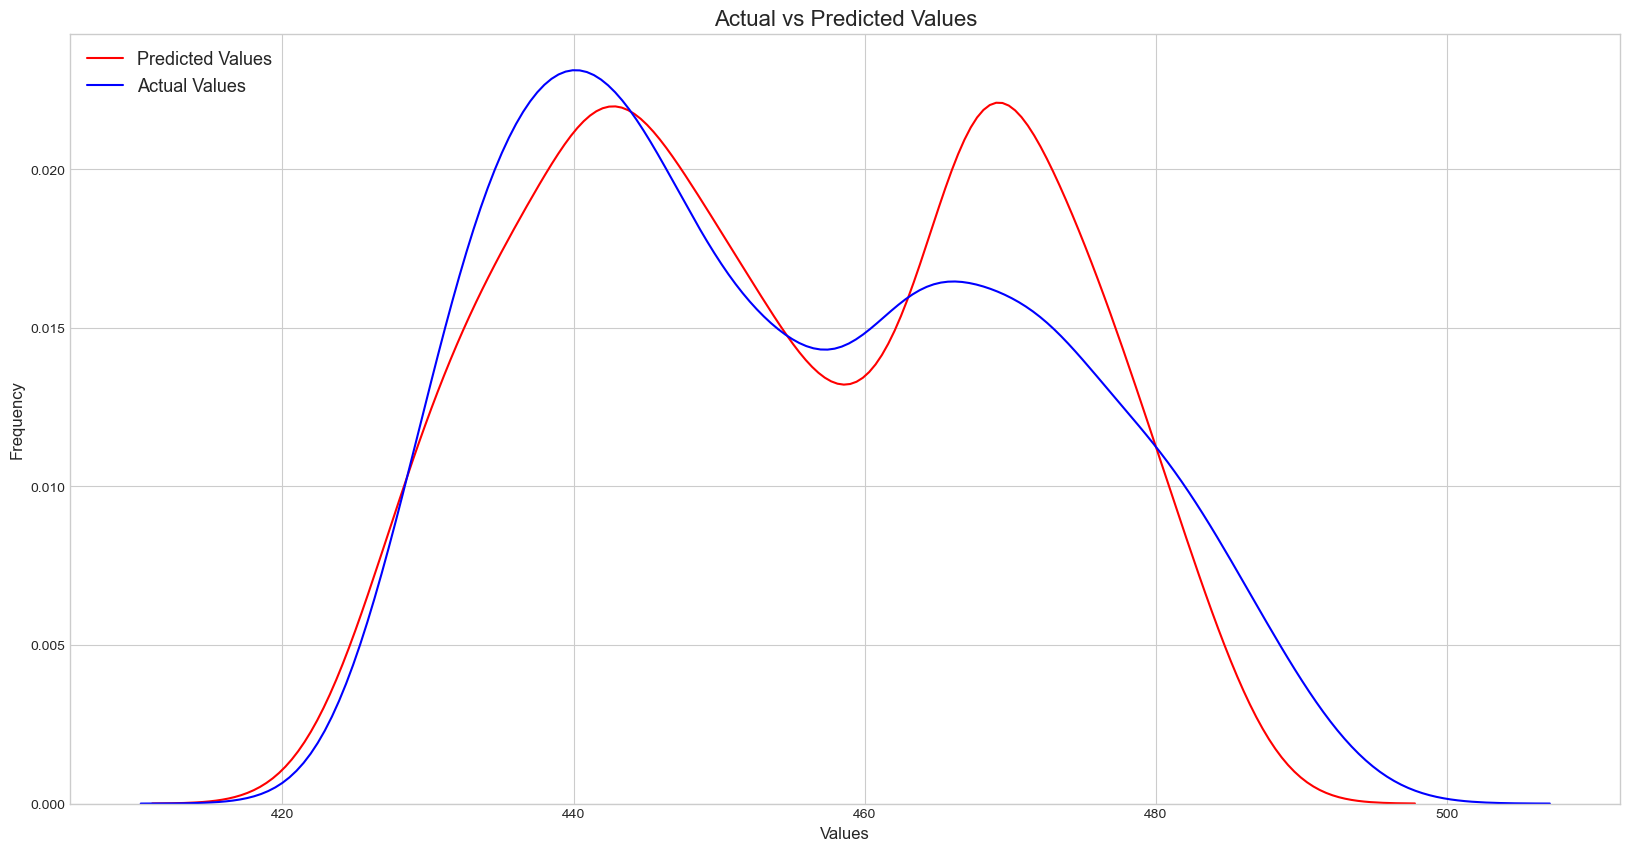

In [166]:
#Evaluating the model
results=evaluate_model("Neural Networks", Y_test, nn_preds[:,0],X_test.shape[1])

In [167]:
Evaluation_df=Evaluation_df.append(results,ignore_index=True)
Evaluation_df

Model  Mean Squared Error (MSE)  \
0            Linear Regression                     24.48   
1      Random Forest Regressor                     20.91   
2  Gradient Boosting Regressor                     18.95   
3          Cat Boost Regressor                     18.06   
4              Neural Networks                     24.48   

   Root Mean Squared Error (RMSE)  R-squared (R2)  Adjusted R-squared (R2)  \
0                            4.95            0.92                     0.92   
1                            4.57            0.93                     0.93   
2                            4.35            0.93                     0.93   
3                            4.25            0.94                     0.94   
4                            4.95            0.92                     0.92   

   Mean Absolute Percentage Error (MAPE)  
0                                   0.86  
1                                   0.74  
2                                   0.73  
3                                   0.70  
4                                   0.86

Model: rf_preds
Mean Squared Error (MSE): 11.92
Root Mean Squared Error (RMSE): 3.45
R-squared (R2): 0.96
Adjusted R-squared (R2): 0.96
Mean Absolute Percentage Error (MAPE): 0.53%



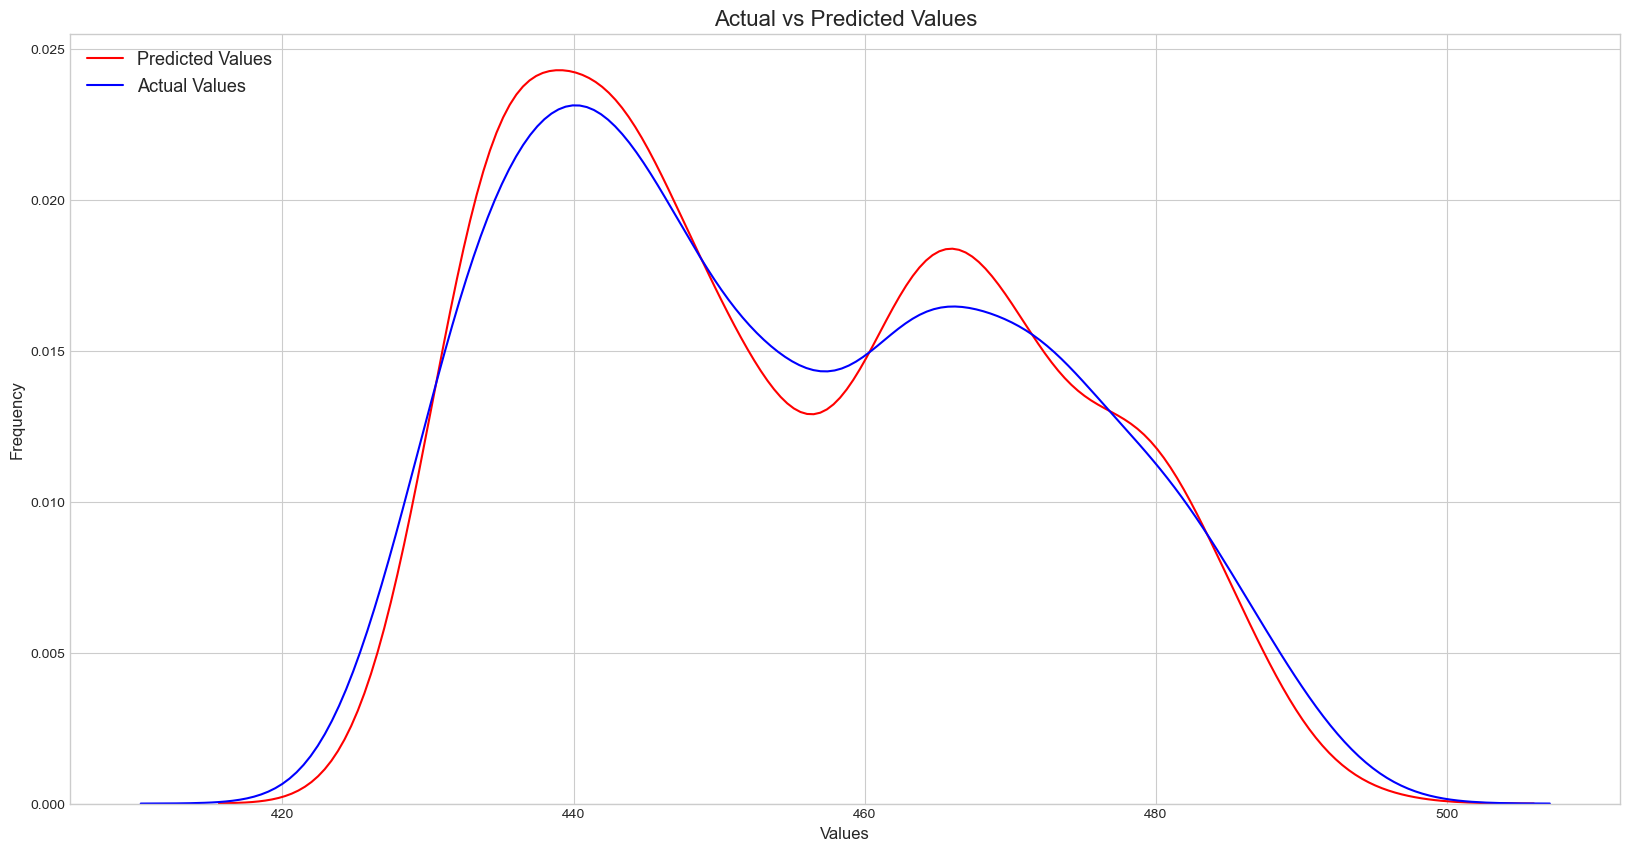

In [168]:
from sklearn.ensemble import RandomForestRegressor
Norm_data=df1.copy()
X=Norm_data.copy()
X=X.drop('energy_production',axis=1)
normalised_values = normalizer.fit_transform(X)
normalised_values = np.round(normalised_values,2)

normalised_values
X=pd.DataFrame(normalised_values, columns=X.columns)
Norm_data1=X.copy()
Norm_data1['energy_production']=Norm_data['energy_production']
Norm_data1

# Split the data into features (X) and target variable (Y)
X = Norm_data1.drop('energy_production', axis=1)
Y = Norm_data1['energy_production']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_split=2,min_samples_leaf=1,max_depth=None)
rf_model.fit(X_train, Y_train)
rf_preds = rf_model.predict(X_test)

results=evaluate_model("rf_preds", Y_test,rf_preds,X_test.shape[1])

import pickle
# Save model using pickle
with open("final_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)